# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통해 가설을 검정해 봅시다.

# 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 설정

In [8]:
import os
if os.name == "posix" :
    plt.rc("font", family="AppleGothic")

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc("axes", unicode_minus = False)

In [5]:
# 레티나 설정을 통해 글씨를 보다 선명하게 만듦
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [15]:
df = pd.read_csv('data/NHIS_OPEN_GJ_2017.CSV', encoding='cp949')
df.shape

(1000000, 34)

## 데이터 미리보기

In [21]:
# sample, head, tail로 데이터 미리보기
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
830683  2017   830684     2           12    28      160.0        45.0  67.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
830683    0.9    0.9  ...  113.0   1.0   1.0          1      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
830683      NaN           NaN  0.0  20181126  

[1 rows x 34 columns]

In [17]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   
1  2017        2     2            8    41      150.0        45.0  73.4    1.2   
2  2017        3     1            8    45      175.0        75.0  94.0    1.0   
3  2017        4     2           12    11      155.0        55.0  67.5    0.9   
4  2017        5     1            8    41      175.0        75.0  93.0    1.5   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN      NaN   
1    1.0  ...   10.0   1.0   0.0          1      NaN    NaN      NaN   
2    0.8  ...  136.0   1.0   0.0          1      NaN    NaN      NaN   
3    1.0  ...   30.0   1.0   1.0          0      NaN    NaN      NaN   
4    1.5  ...   68.0   3.0   0.0          0      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  1.0  20181126  
2           NaN  0.0  20181126  
3           NaN  NaN  20181126  
4           NaN  NaN  20181126  

[5 rows x 34 columns]

# 기본정보 보기

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [26]:
# 컬럼만 따로 출력하기
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [27]:
# 데이터의 형식만 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 결측치 보기

In [30]:
# isnull 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어줌.
# TRUE == 1
df.isnull()

기준년도  가입자일련번호   성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg 단위)  \
0       False    False  False        False  False      False       False   
1       False    False  False        False  False      False       False   
2       False    False  False        False  False      False       False   
3       False    False  False        False  False      False       False   
4       False    False  False        False  False      False       False   
...       ...      ...    ...          ...    ...        ...         ...   
999995  False    False  False        False  False      False       False   
999996  False    False  False        False  False      False       False   
999997  False    False  False        False  False      False       False   
999998  False    False  False        False  False      False       False   
999999  False    False  False        False  False      False       False   

         허리둘레  시력(좌)  시력(우)  ...  감마지티피   흡연상태   음주여부  구강검진 수검여부  치아우식증유무  \
0       False  False  False  ...  False  False  False      False     True   
1       False  False  False  ...  False  False  False      False     True   
2       False  False  False  ...  False  False  False      False     True   
3       False  False  False  ...  False  False  False      False     True   
4       False  False  False  ...  False  False  False      False     True   
...       ...    ...    ...  ...    ...    ...    ...        ...      ...   
999995  False  False  False  ...  False  False  False      False     True   
999996  False  False  False  ...  False  False  False      False     True   
999997  False  False  False  ...  False  False  False      False     True   
999998  False  False  False  ...  False  False  False      False     True   
999999  False  False  False  ...  False  False  False      False     True   

        결손치유무  치아마모증유무  제3대구치(사랑니)이상     치석  데이터공개일자  
0        True     True          True  False    False  
1        True     True          True  False    False  
2        True     True          True  False    False  
3        True     True          True   True    False  
4        True     True          True   True    False  
...       ...      ...           ...    ...      ...  
999995   True     True          True   True    False  
999996   True     True          True  False    False  
999997   True     True          True  False    False  
999998   True     True          True   True    False  
999999   True     True          True   True    False  

[1000000 rows x 34 columns]

In [33]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [35]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<AxesSubplot:>

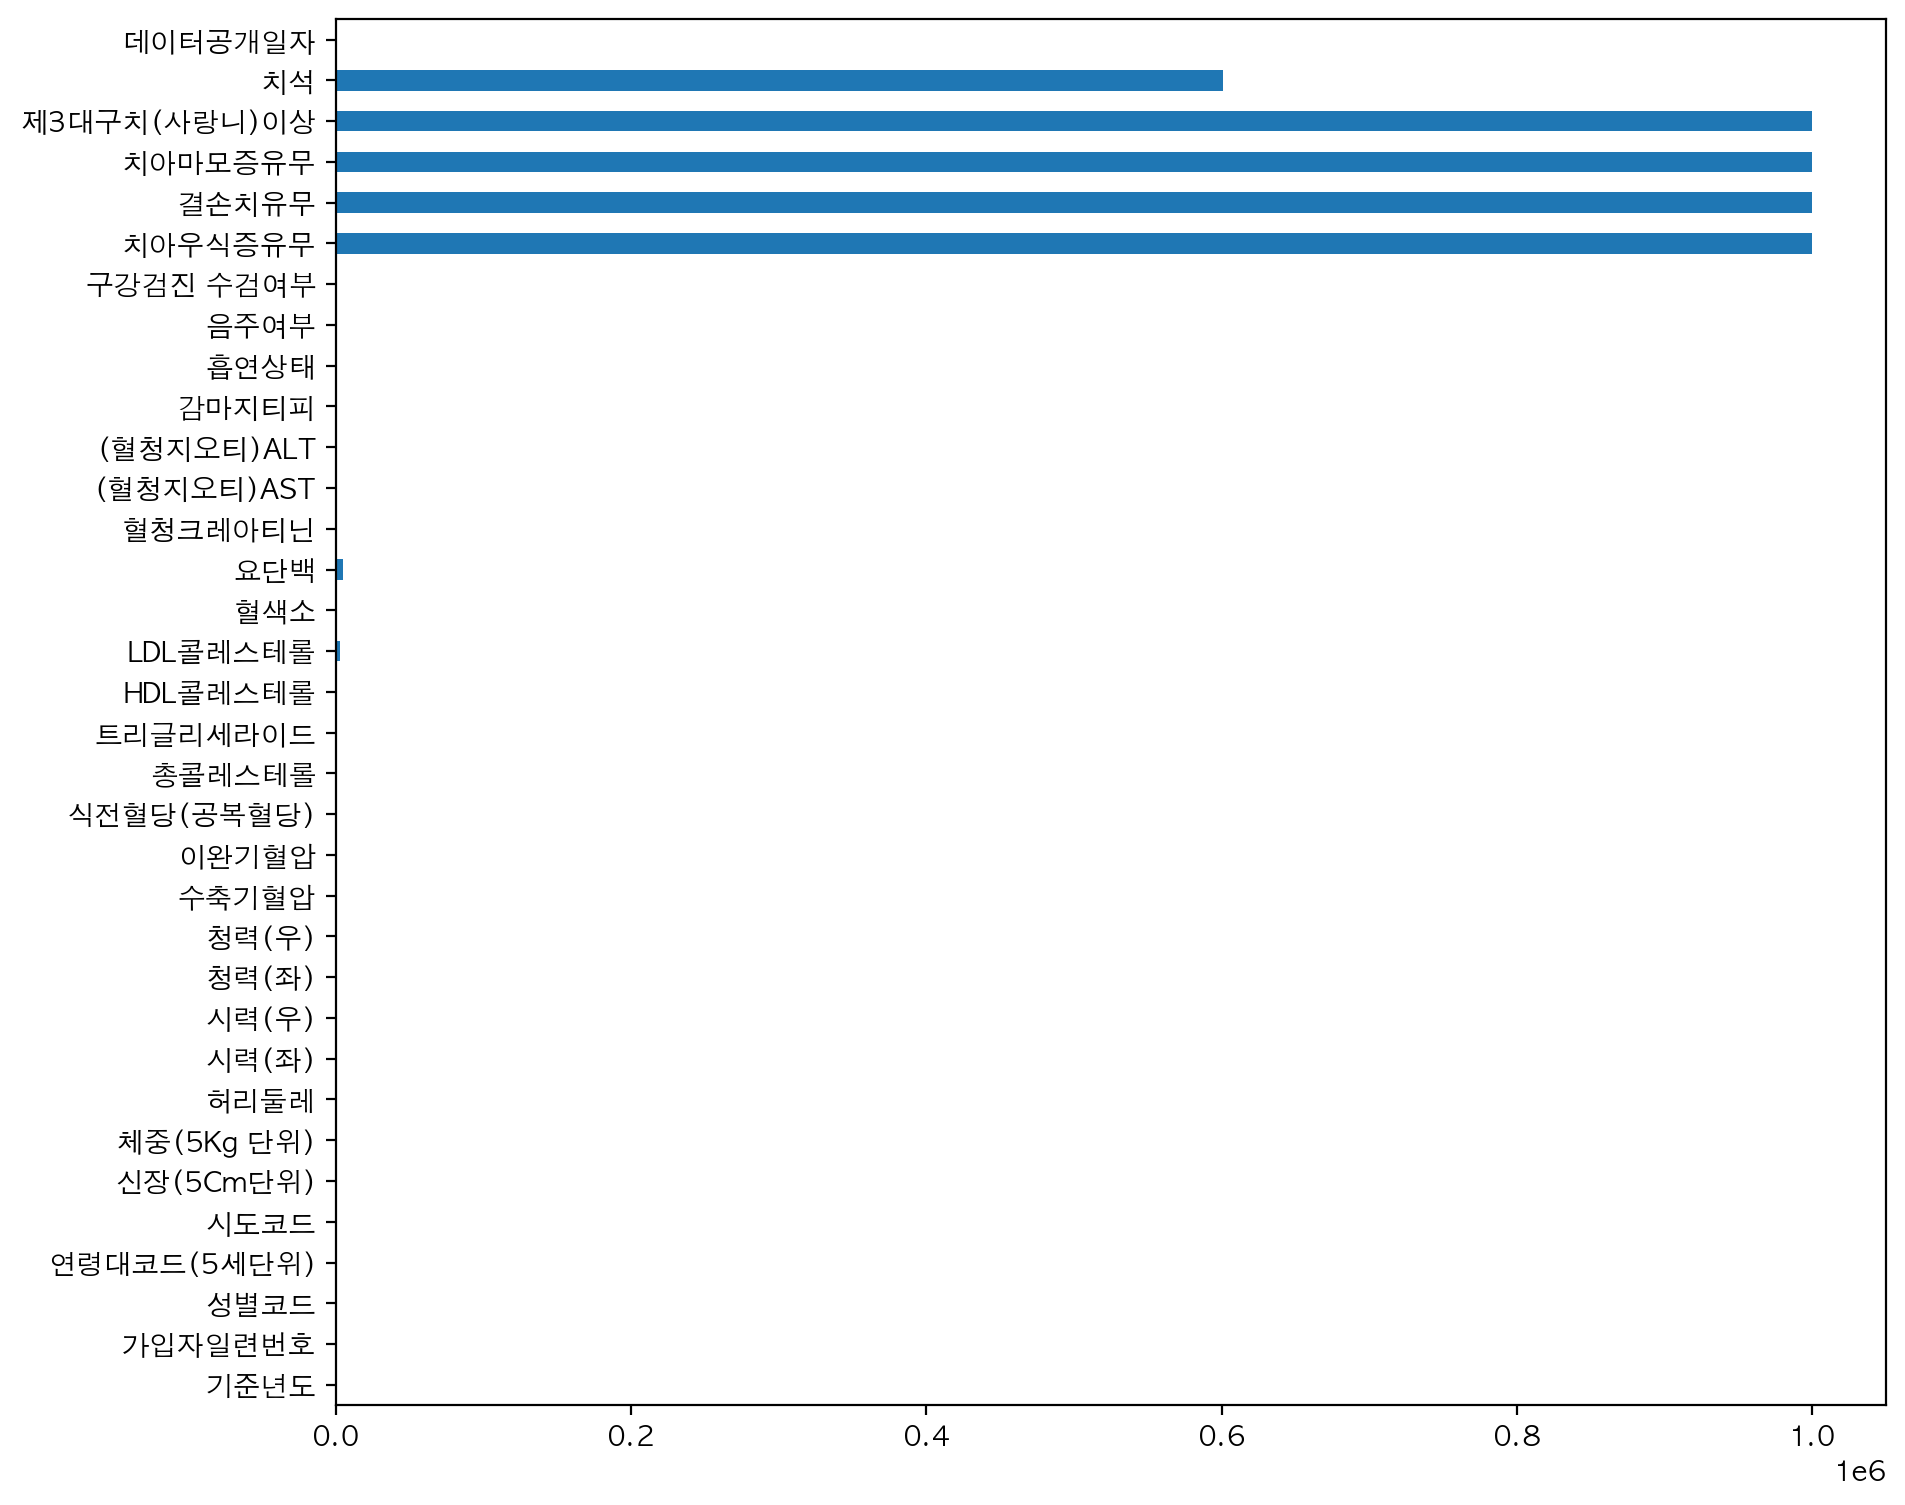

In [38]:
# plot 통한 시각화
df.isnull().sum().plot.barh(figsize=(10,9))

# 일부 데이터 요약하기

In [43]:
#pandas에서 두 개 이상의 데이터를 불러올 때는 리스트 형태로 구성해줘야 함.
a = df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()
a

(혈청지오티)ALT  (혈청지오티)AST
0        41.0        19.0
1        13.0        16.0
2        62.0        45.0
3        24.0        21.0
4        62.0        37.0

In [45]:
a.describe()

(혈청지오티)ALT  (혈청지오티)AST
count    5.000000    5.000000
mean    40.400000   27.600000
std     22.097511   12.680694
min     13.000000   16.000000
25%     24.000000   19.000000
50%     41.000000   21.000000
75%     62.000000   37.000000
max     62.000000   45.000000

# value_counts로 값 집계하기

In [46]:
df["성별코드"].value_counts()

1    531172
2    468828
Name: 성별코드, dtype: int64

In [47]:
df["흡연상태"].value_counts()

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

# groupby와 pivot_table 사용하기

## groupby

In [51]:
# groupby 통해 데이터 그룹화

df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [54]:
# 성별코드와 음주여부로 그룹화하고 개수 세기
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [56]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [57]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [61]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(
    ["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

In [66]:
# 음주여부에 따른 그룹화된 수를 피벗테이블루 구함.
df.pivot_table(index="음주여부", values = "가입자일련번호", aggfunc="count")

가입자일련번호
음주여부         
0.0    502729
1.0    496746

In [67]:
df.pivot_table(index="성별코드", values = "가입자일련번호", aggfunc="count")

가입자일련번호
성별코드         
1      531172
2      468828

In [73]:
# aggfunc에 여러 값을 한번에 지정할 수도 있음.
pd.pivot_table(df, index = "음주여부", values = "감마지티피", aggfunc = ["mean","median"])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.858541   19.0
1.0   47.745678   30.0

In [76]:
# 성별코드, 음주여부에 따른 감마지티피 값을 요약함.
pd.pivot_table(df, index = ["성별코드", "음주여부"], values = "감마지티피", aggfunc = ["describe"])

describe                                                        
               25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                                 
1    0.0      18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0      24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0      13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0      13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

# 전체 데이터 시각화 하기

## 히스토그램

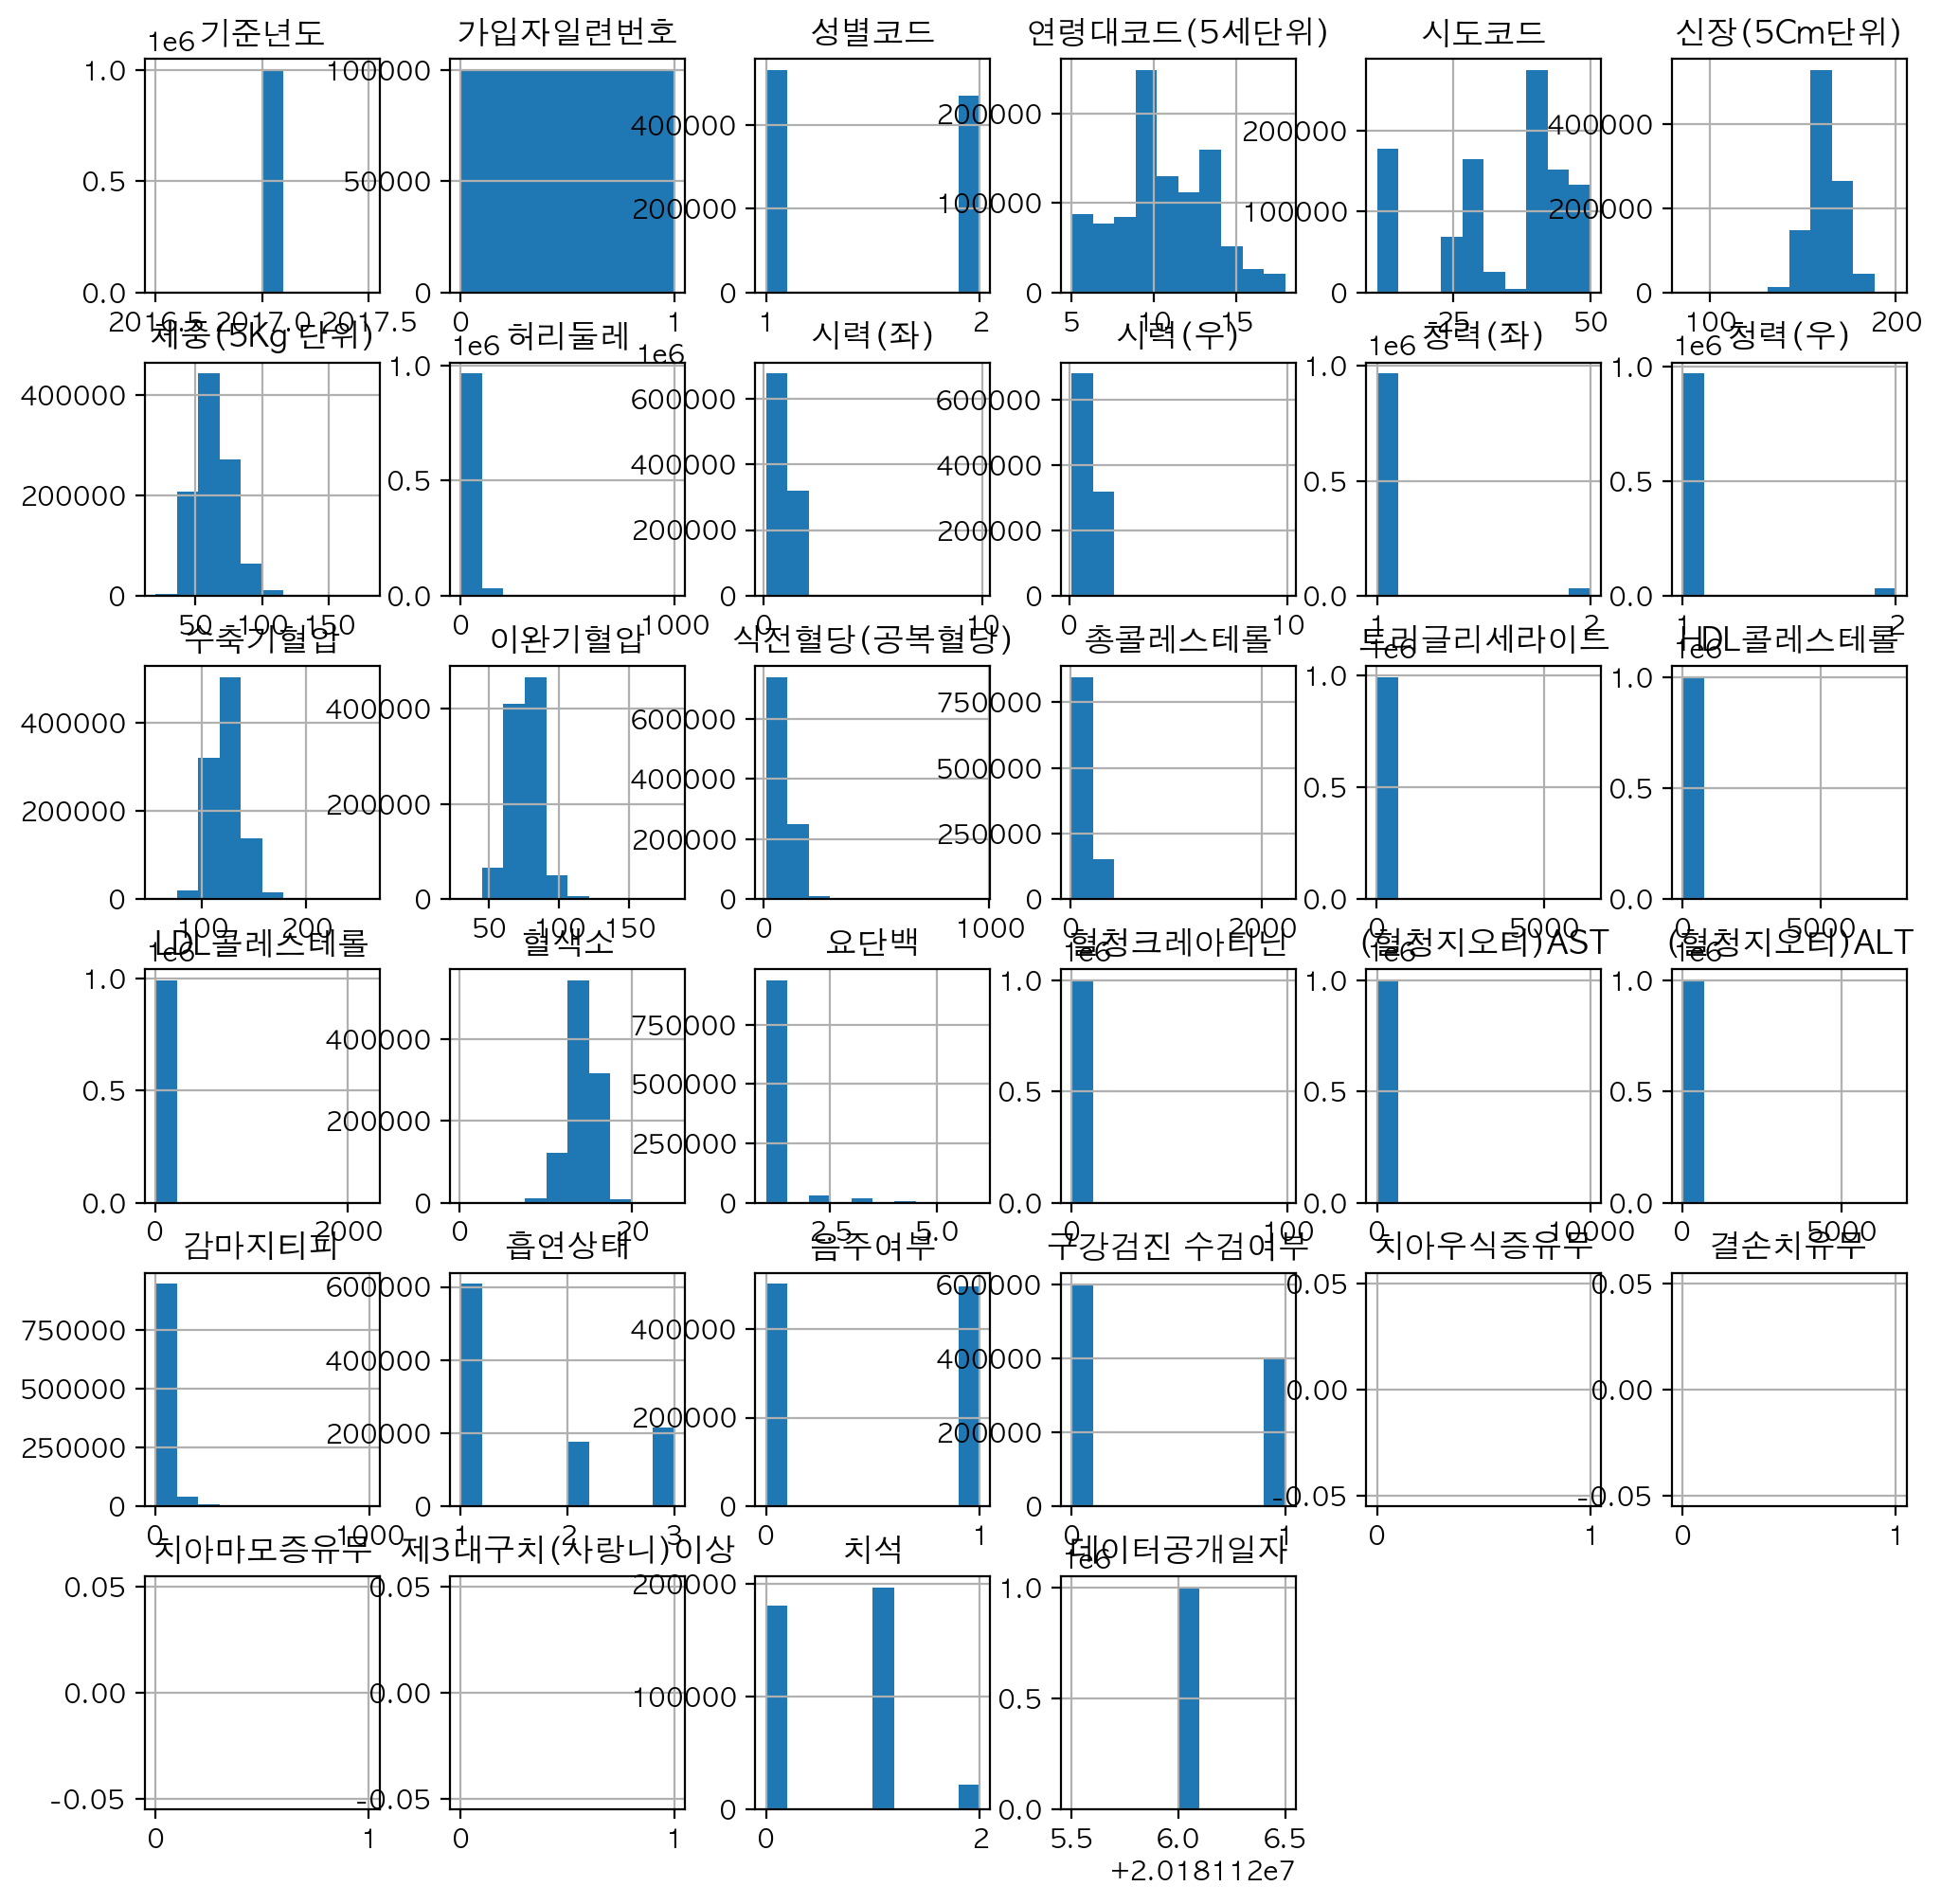

In [82]:
# 히스토그램 함수는 hist(), 출력값 없애고 싶으면 변수에 담을 것.
h = df.hist(figsize = (12,12))

## 슬라이싱 사용해 히스토그램 그리기

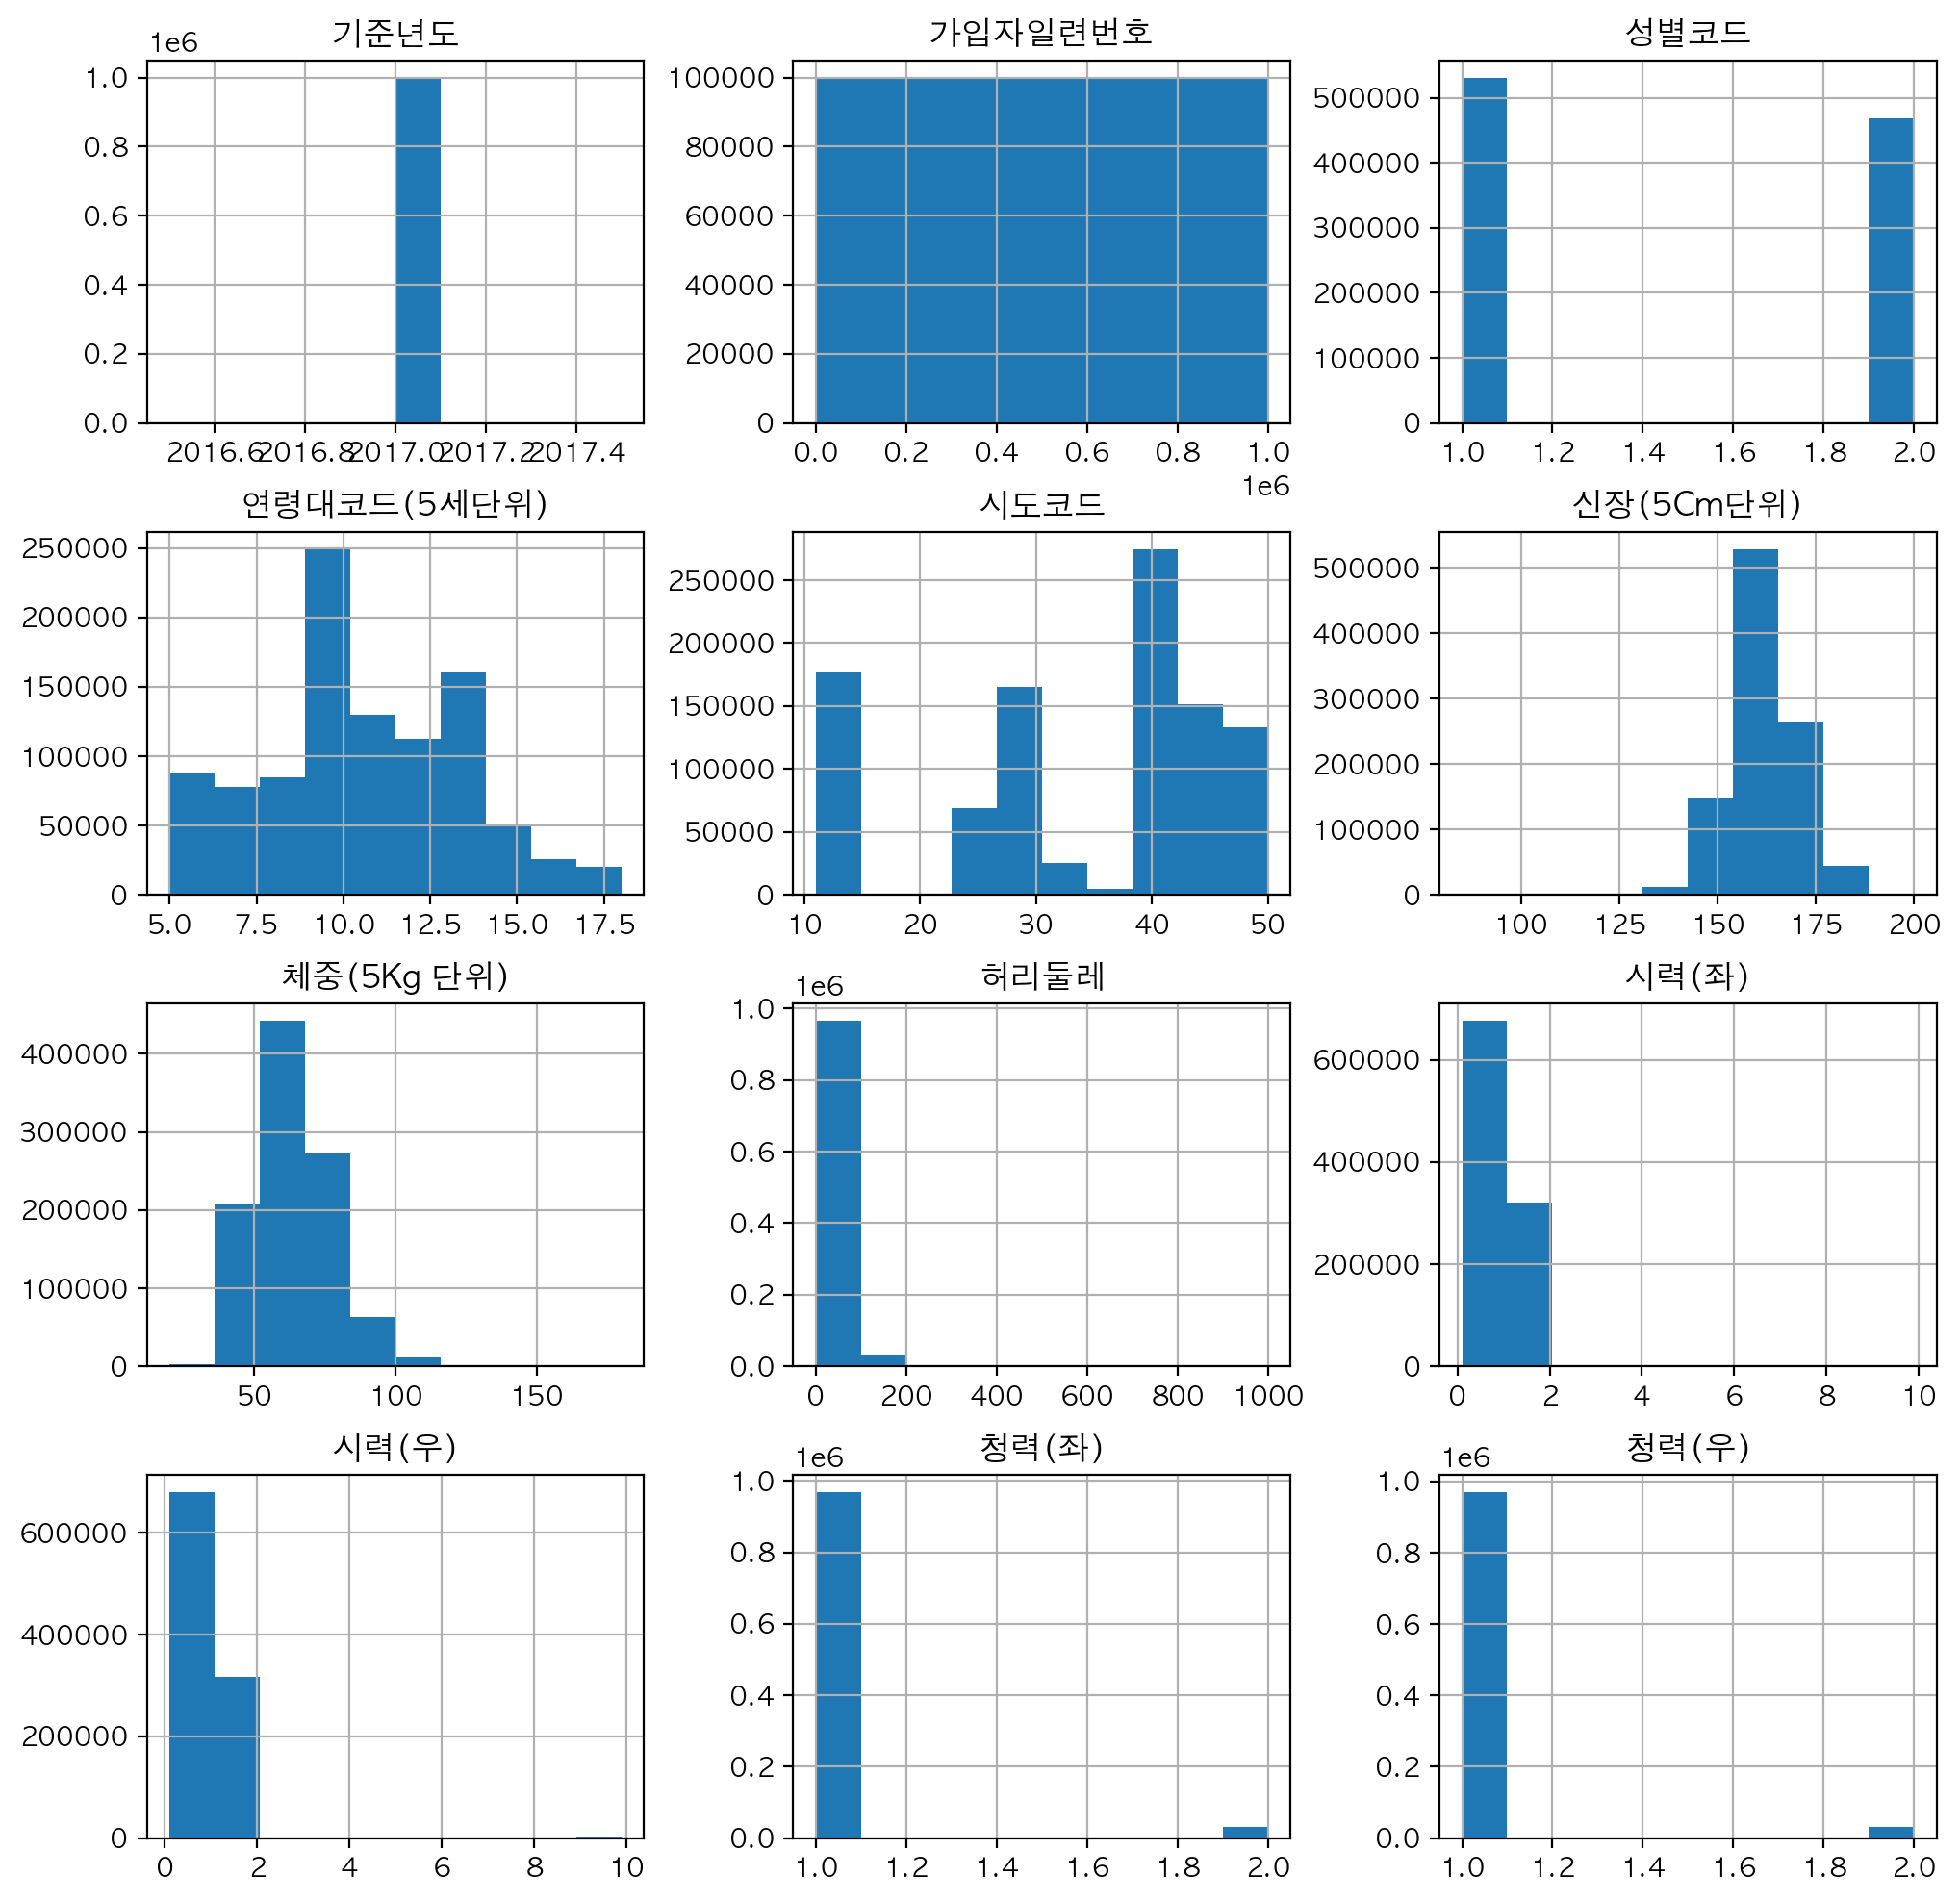

In [88]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그림
# [행, 열]
h = df.iloc[:, :12].hist(figsize = (12,12))

In [91]:
df.iloc[:, 12:24].head()

수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  LDL콜레스테롤   혈색소  요단백  \
0  158.0   88.0        95.0   178.0     161.0      43.0     102.0  15.9  1.0   
1  110.0   79.0        98.0   255.0      82.0      62.0     176.0  10.7  1.0   
2  130.0   89.0        88.0   211.0     271.0      64.0      92.0  16.1  1.0   
3  138.0   90.0        76.0   160.0      97.0      52.0      88.0  13.4  1.0   
4  128.0   80.0        97.0   253.0     182.0      47.0     169.0  16.1  1.0   

   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  
0      1.0        19.0        41.0  
1      0.9        16.0        13.0  
2      1.1        45.0        62.0  
3      0.6        21.0        24.0  
4      1.1        37.0        62.0

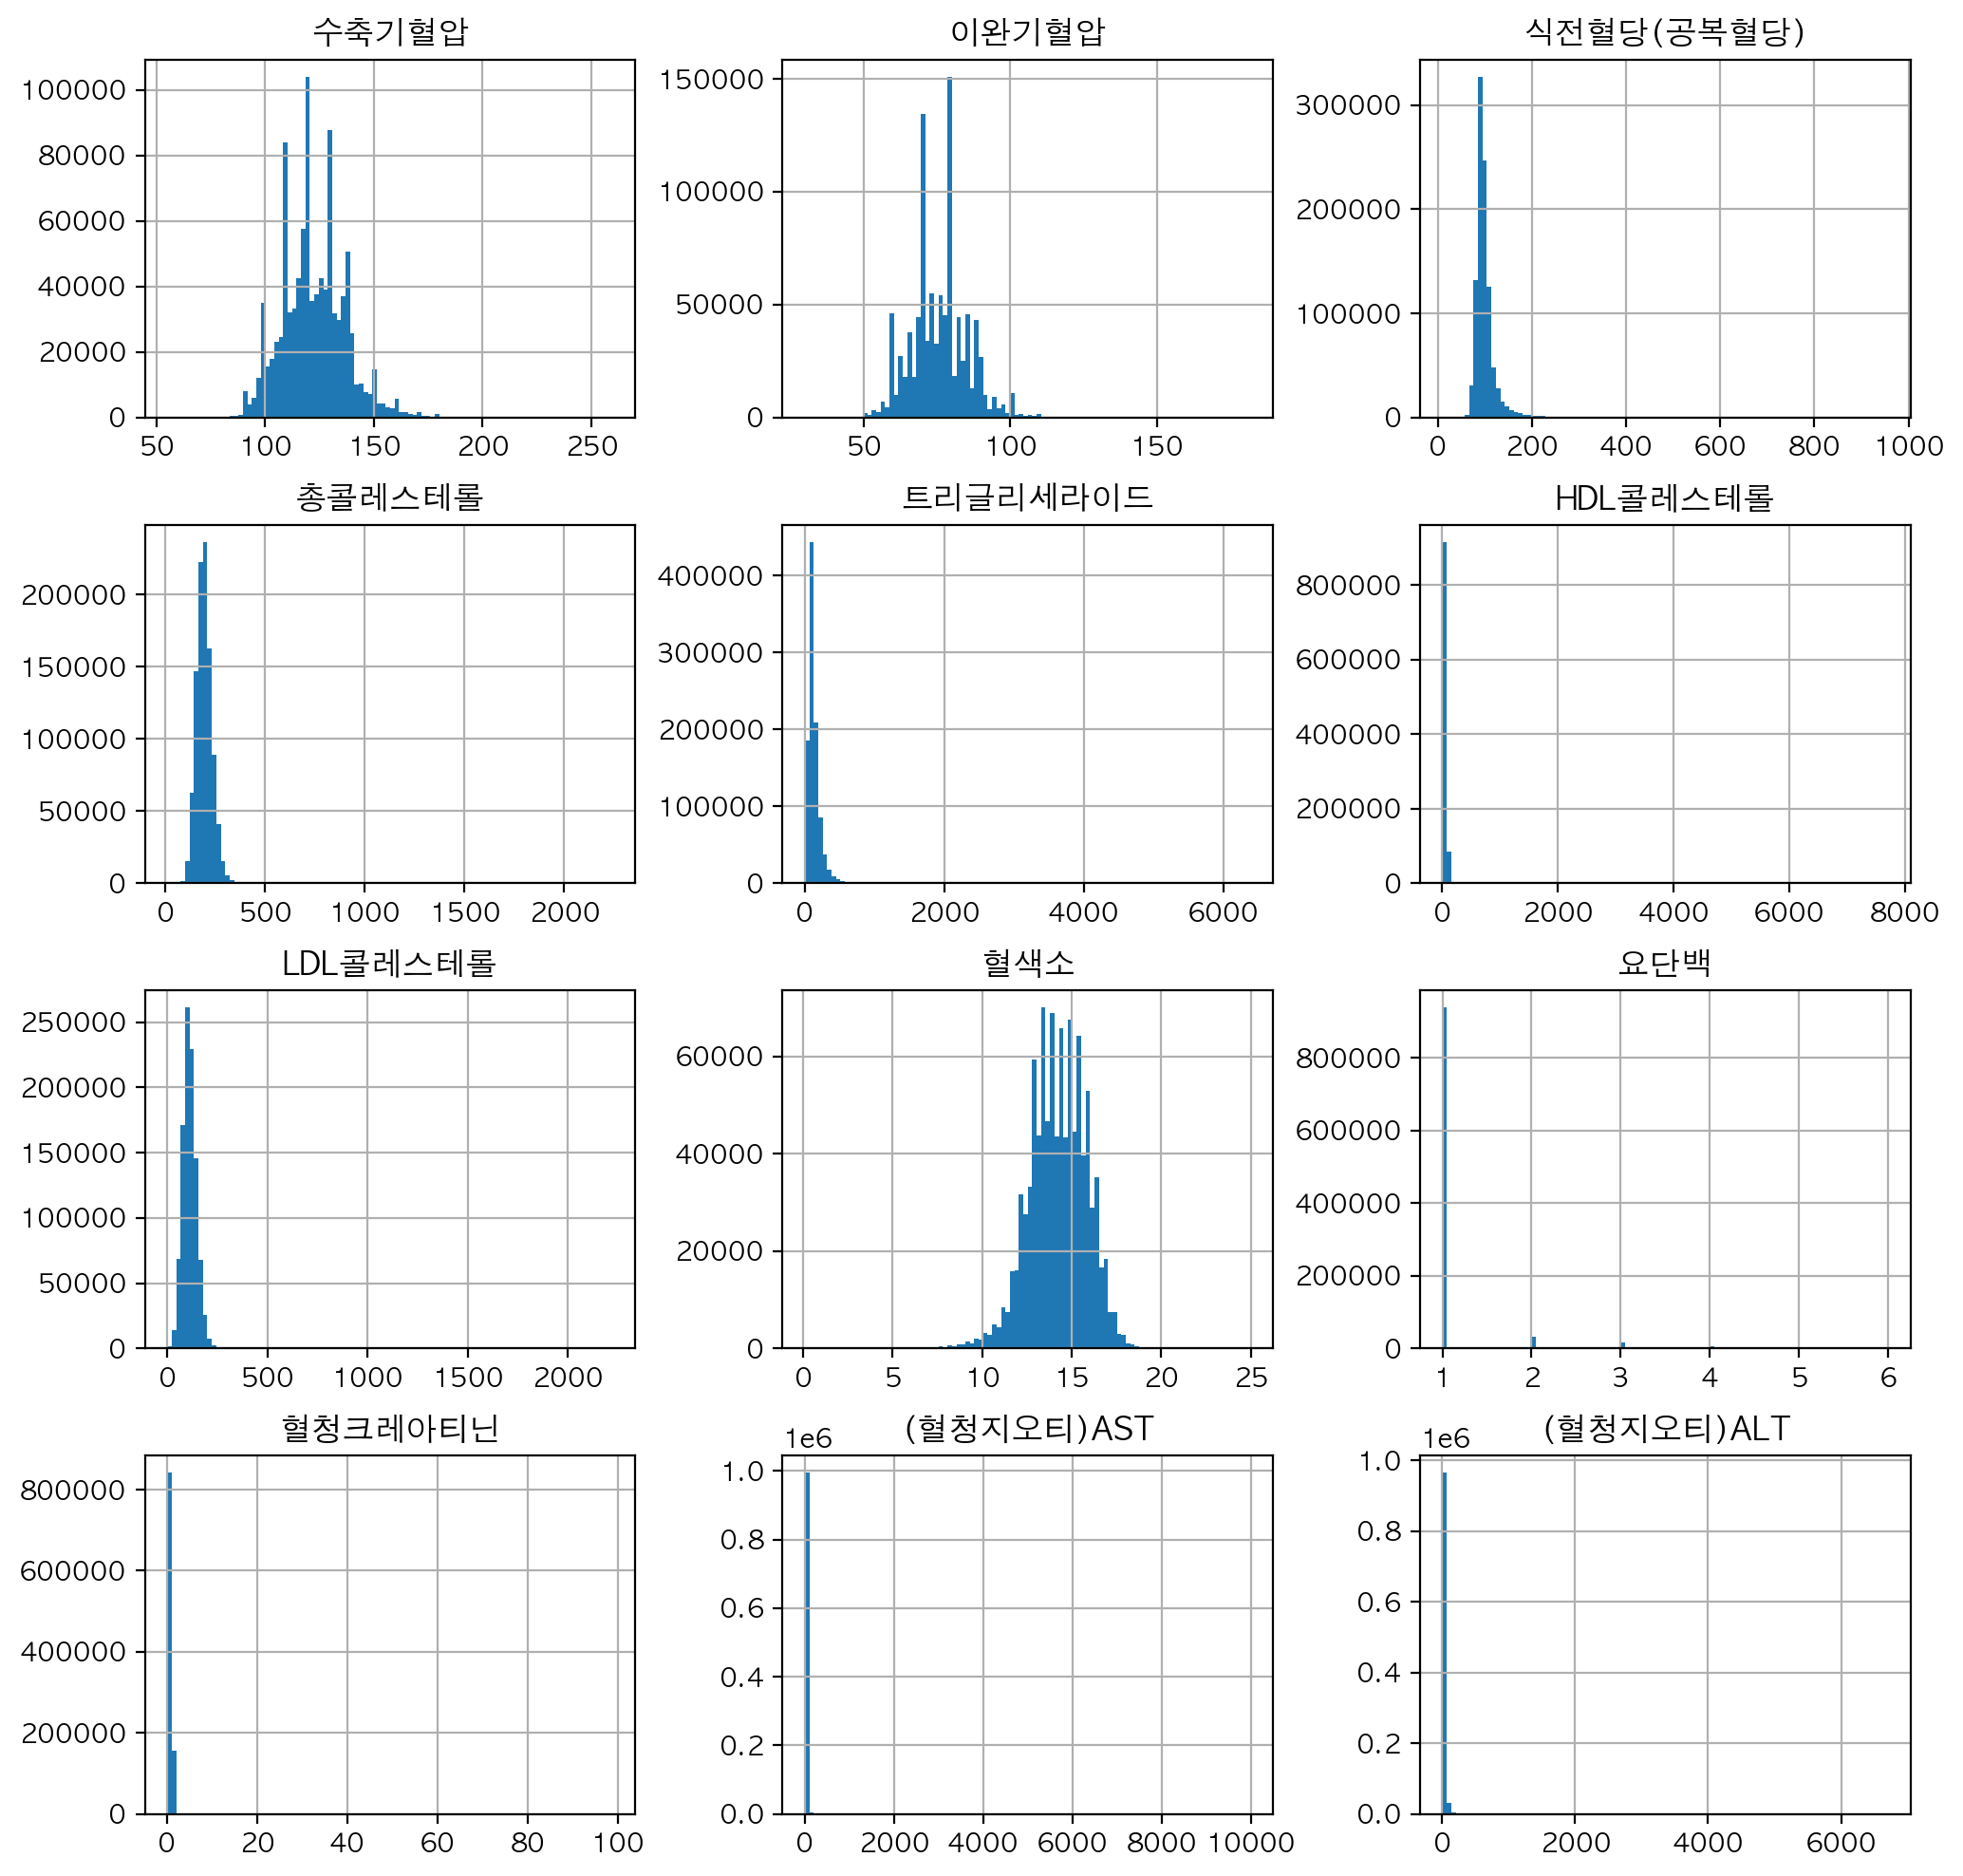

In [92]:
# 12번째 컬럼부터 23번째 컬럼에 대한 히스토그램 그리기
h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100)

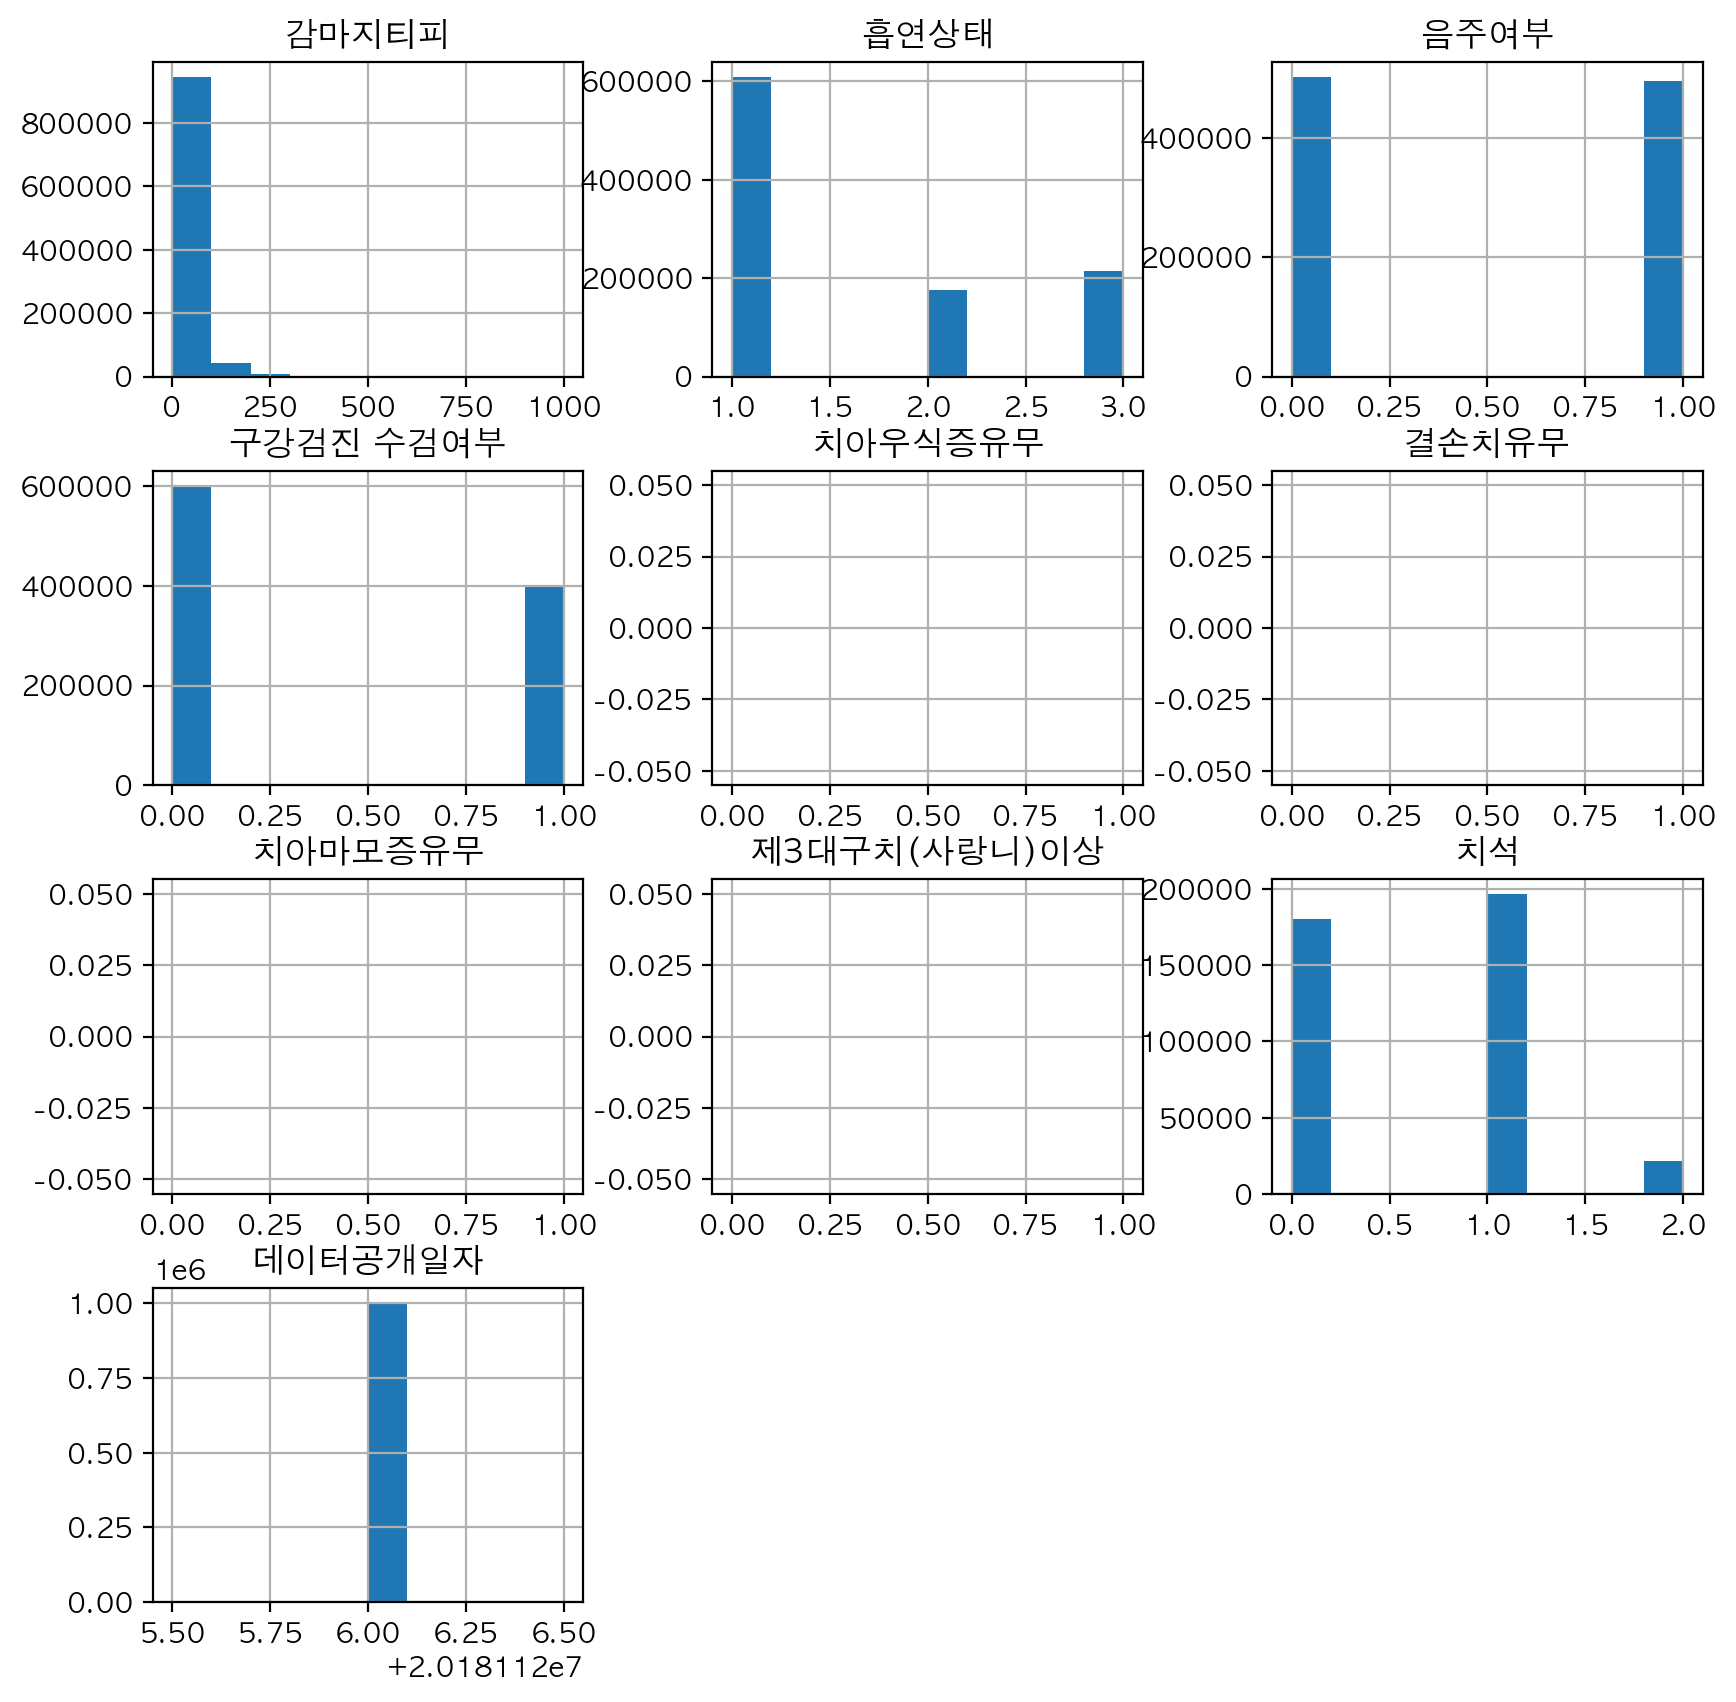

In [104]:
h = df.iloc[:, 24:].hist(figsize = (10,10), bins=10)

# 샘플데이터 추출하기
- seaborn의 그래프는 내부에서 수학적 연산이 되기 떄문에 데이터가 많으면 속도가 오래 걸림.
- 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링 해서 사용

In [108]:
# random_state를 사용해 샘플링되는 값을 고정함
# 실험 통제를 위해 random_state를 고정하기도 함
# random_state 값은 높든 낮든 상관 없이 값을 고정시킴

df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

# 데이터 시각화 도구 Seaborn 사용하기
- https://seaborn.pydata.org/
- seaborn은 https://matplotlib.org/ 을 사용하기 쉽게 만들어졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.

# 범주형(카테고리) 데이터 시각화
- countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현함
- value_counts로 구한 값을 시각화함

## counplot - 키와 몸무게

<AxesSubplot:>

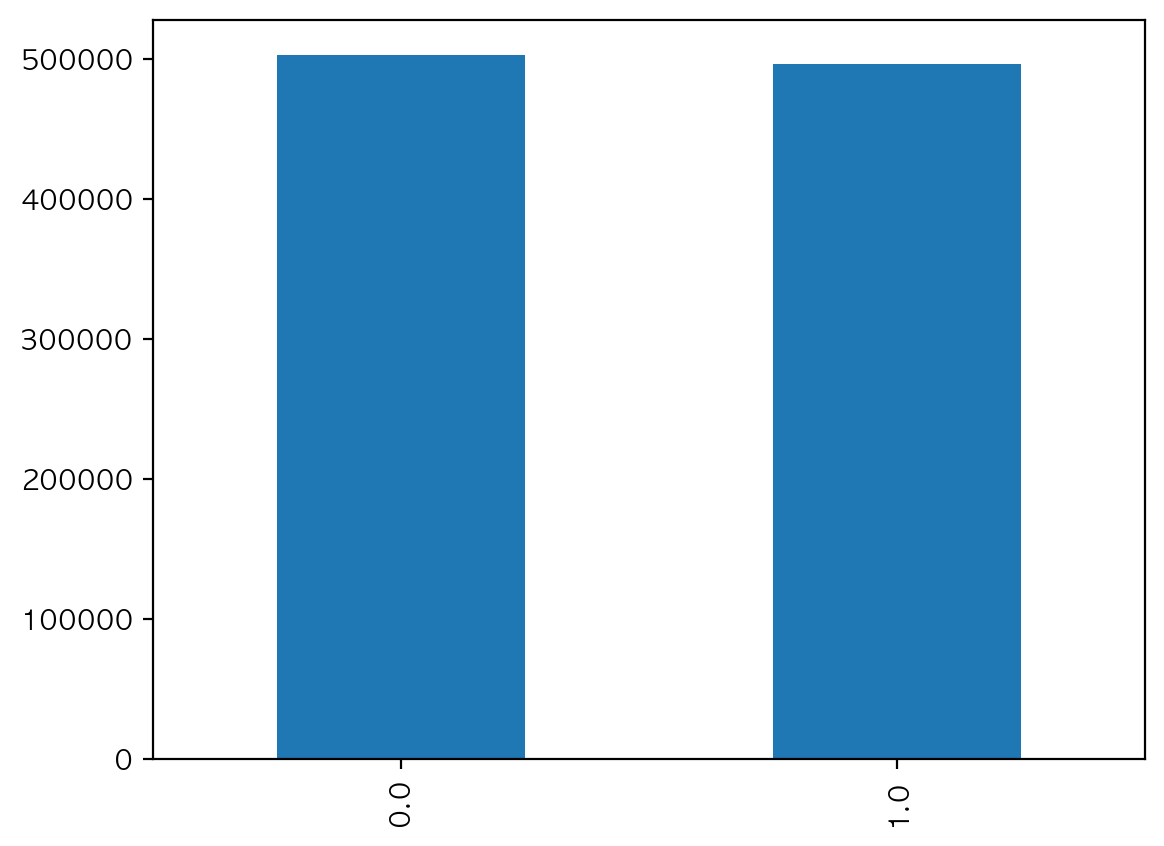

In [111]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

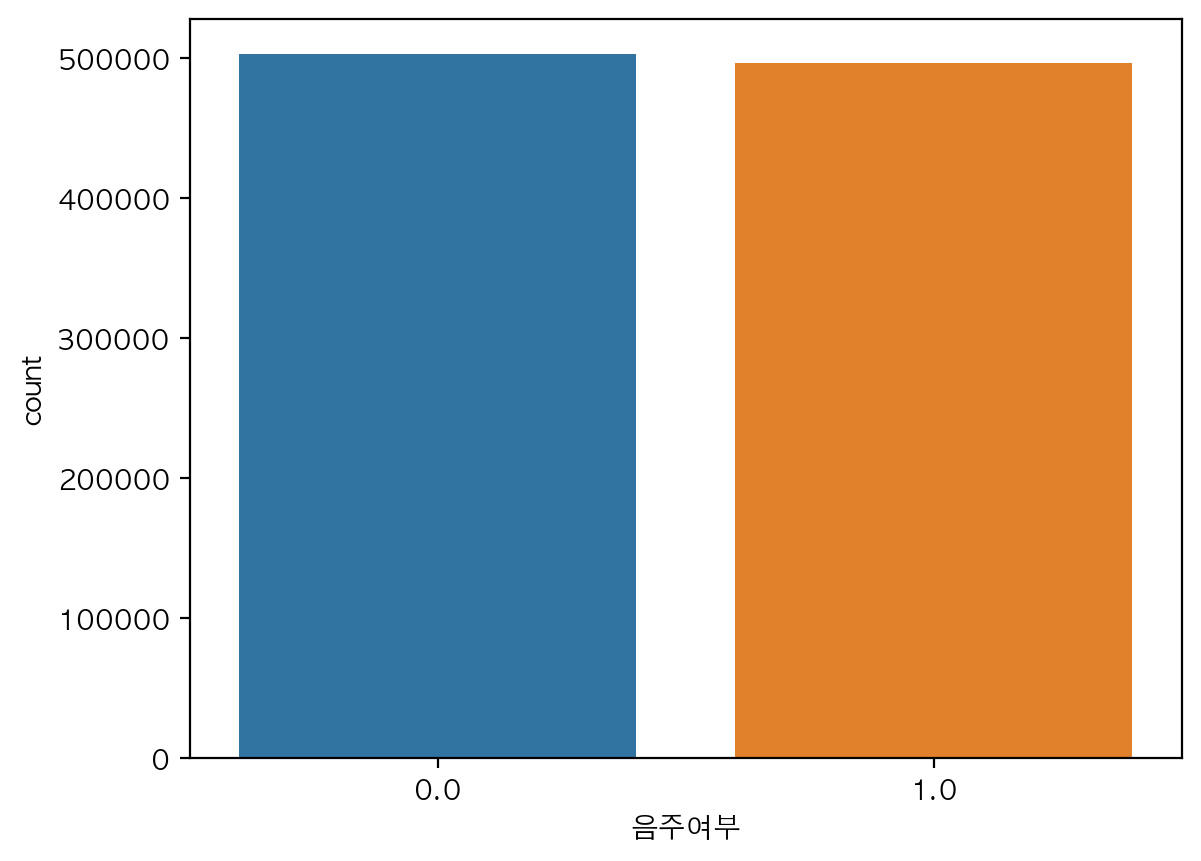

In [113]:
sns.countplot(x="음주여부", data=df)

In [121]:
sns.set(font_scale=1.2, font="AppleGothic")

## hue 옵션 사용하기

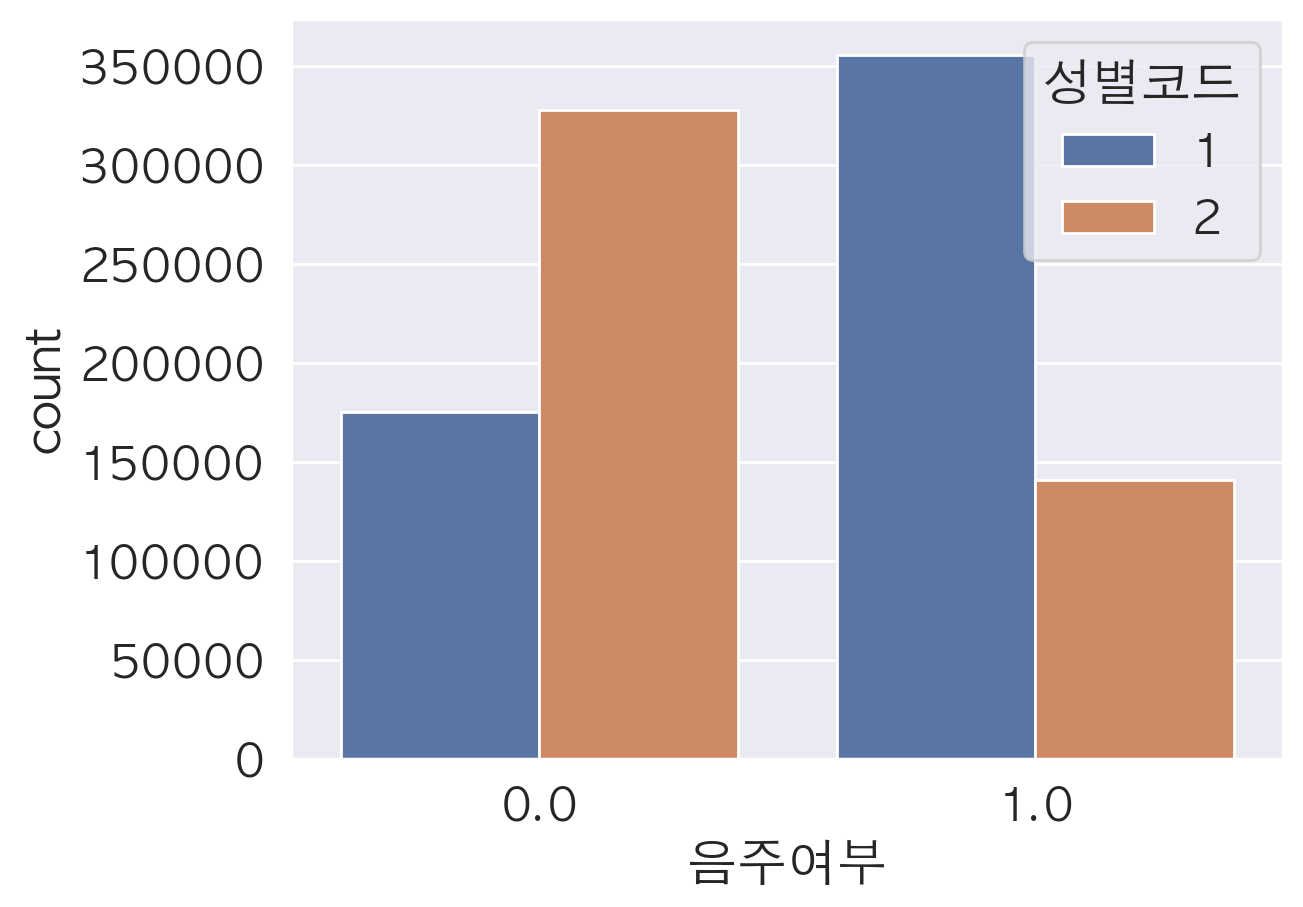

In [118]:
a = sns.countplot(x="음주여부", data=df, hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

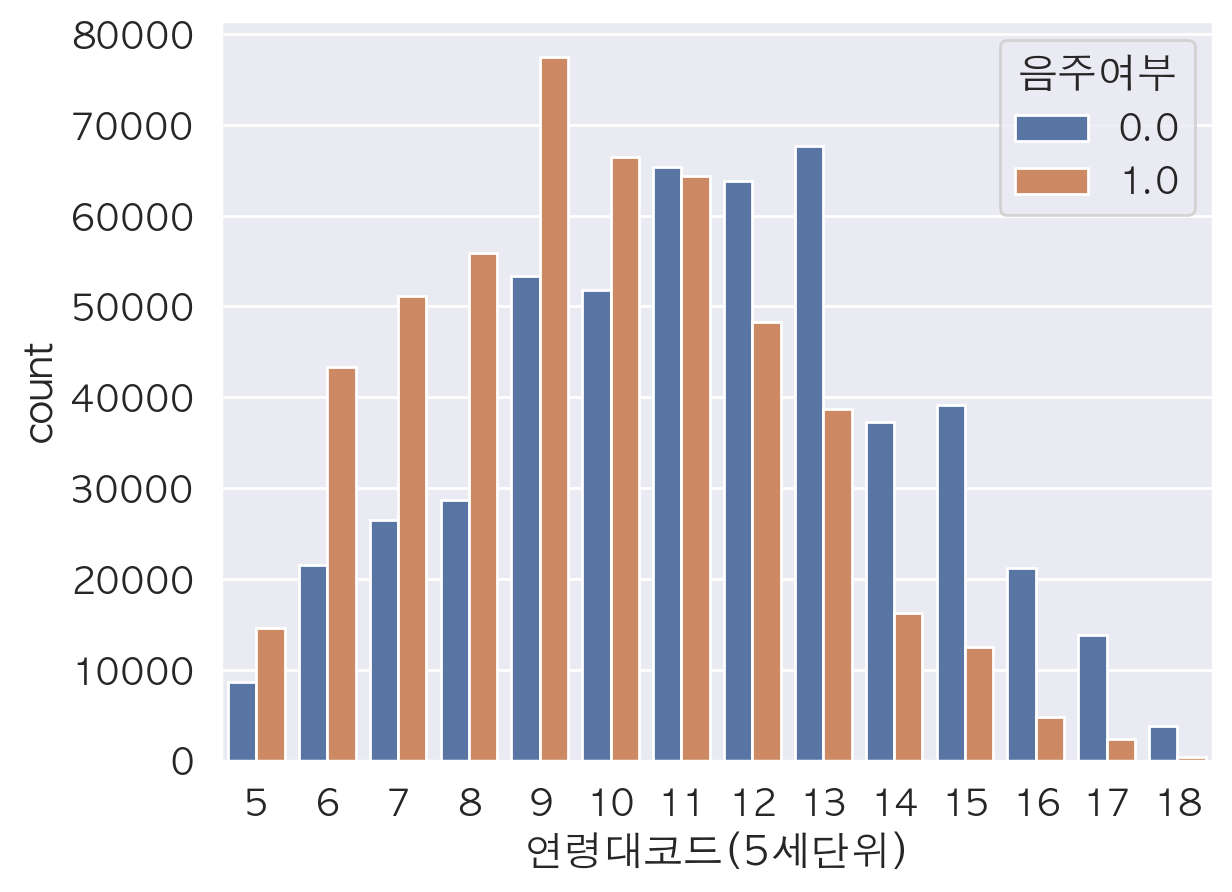

In [122]:
# hue를 사용해 다른 색상으로 표현함.
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

## countplot - 키와 몸무게
- 키와 몸무게는 연속형 데이터
- 그러나 이 데이터는 키는 5cm, 체중은 5kg 단위
- 특정 범위로 묶게 되면 연속형 X, 범주형 O

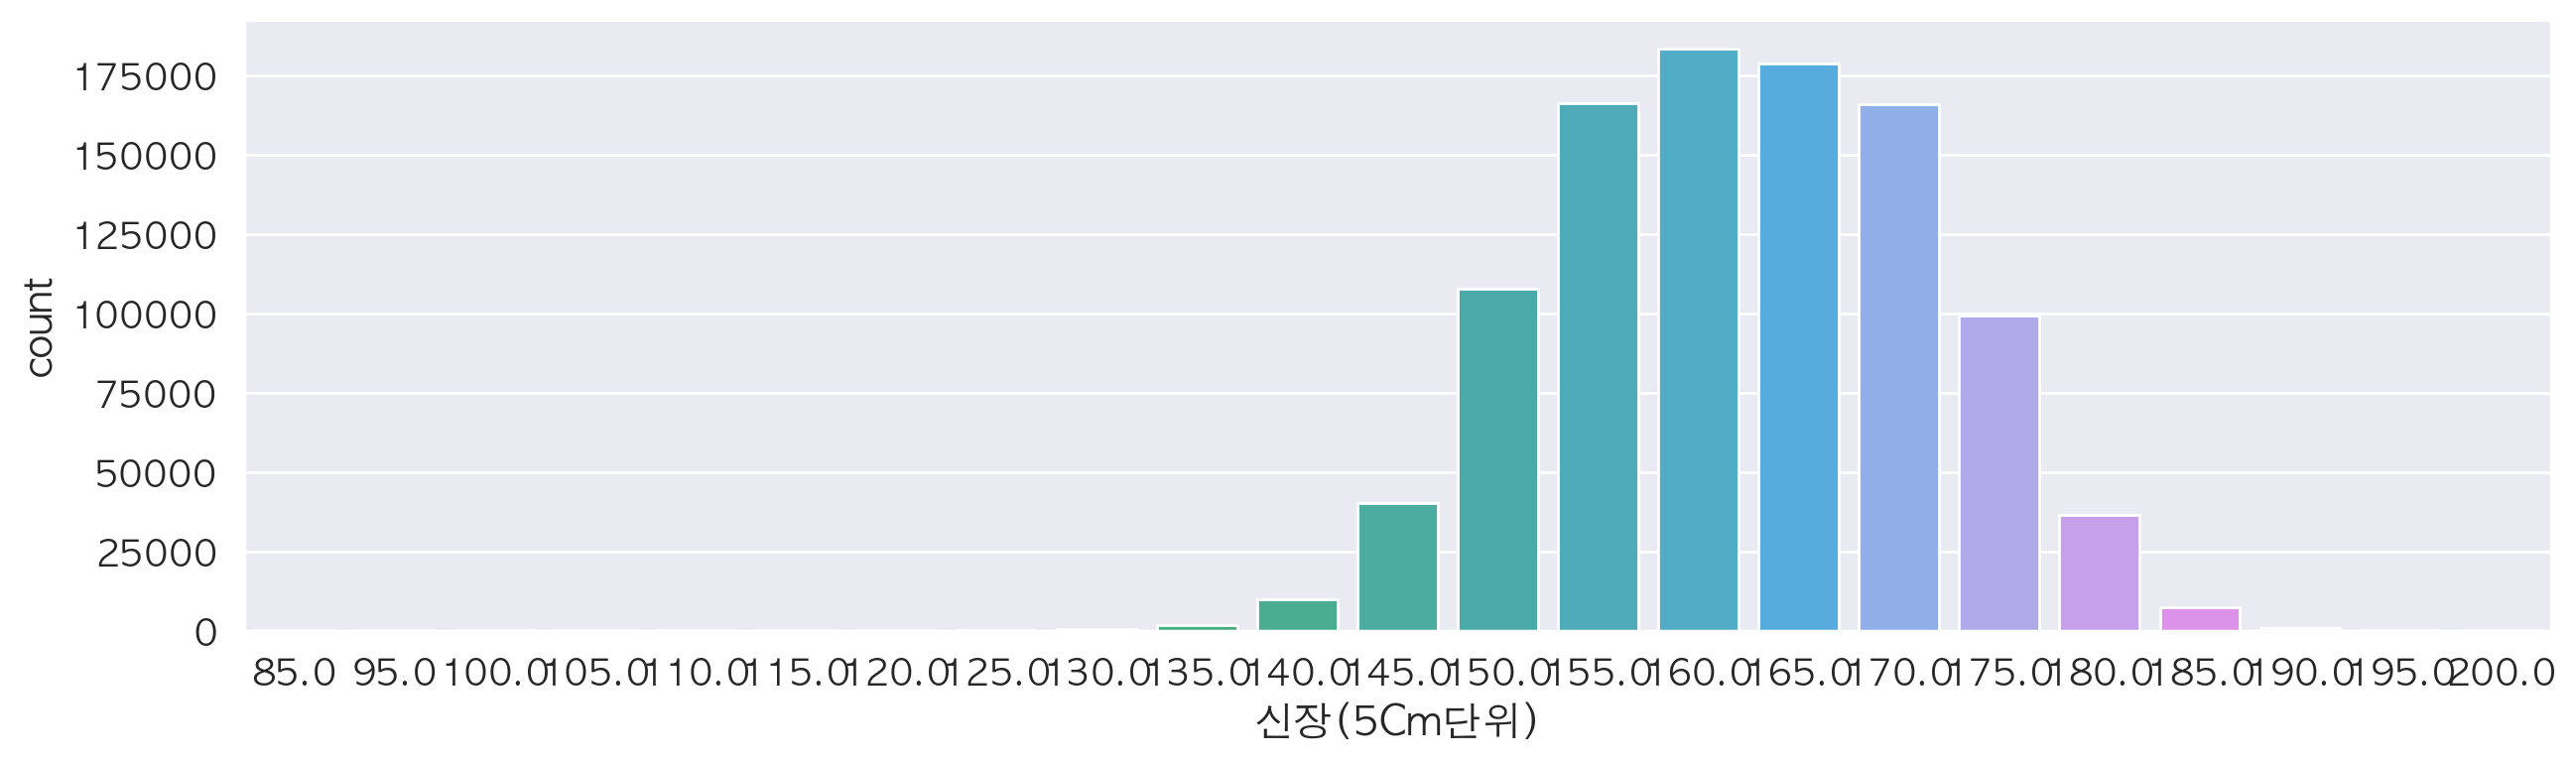

In [130]:
# countplot으로 신장 확인
plt.figure(figsize=(15,4))
b = sns.countplot(data=df, x="신장(5Cm단위)")

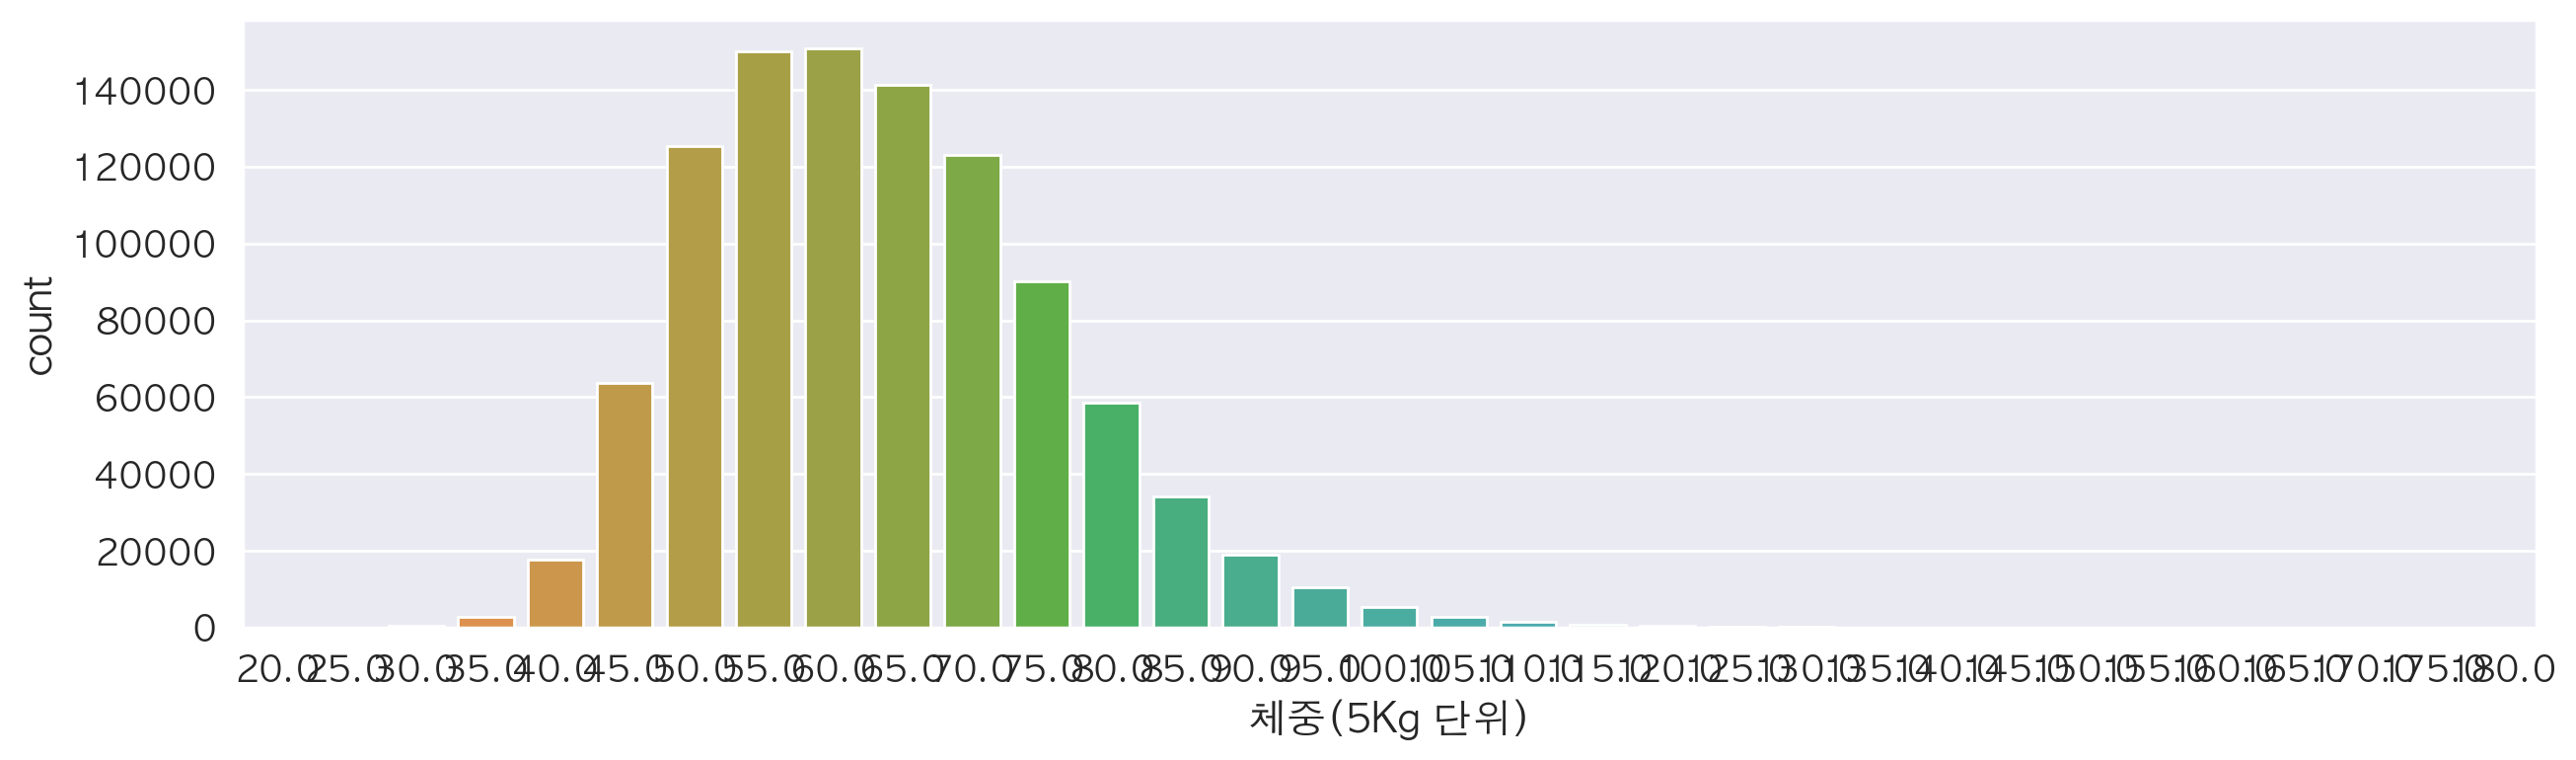

In [136]:
# countplot으로 체중 확인
plt.figure(figsize = (15,4))
c = sns.countplot(data=df, x="체중(5Kg 단위)")

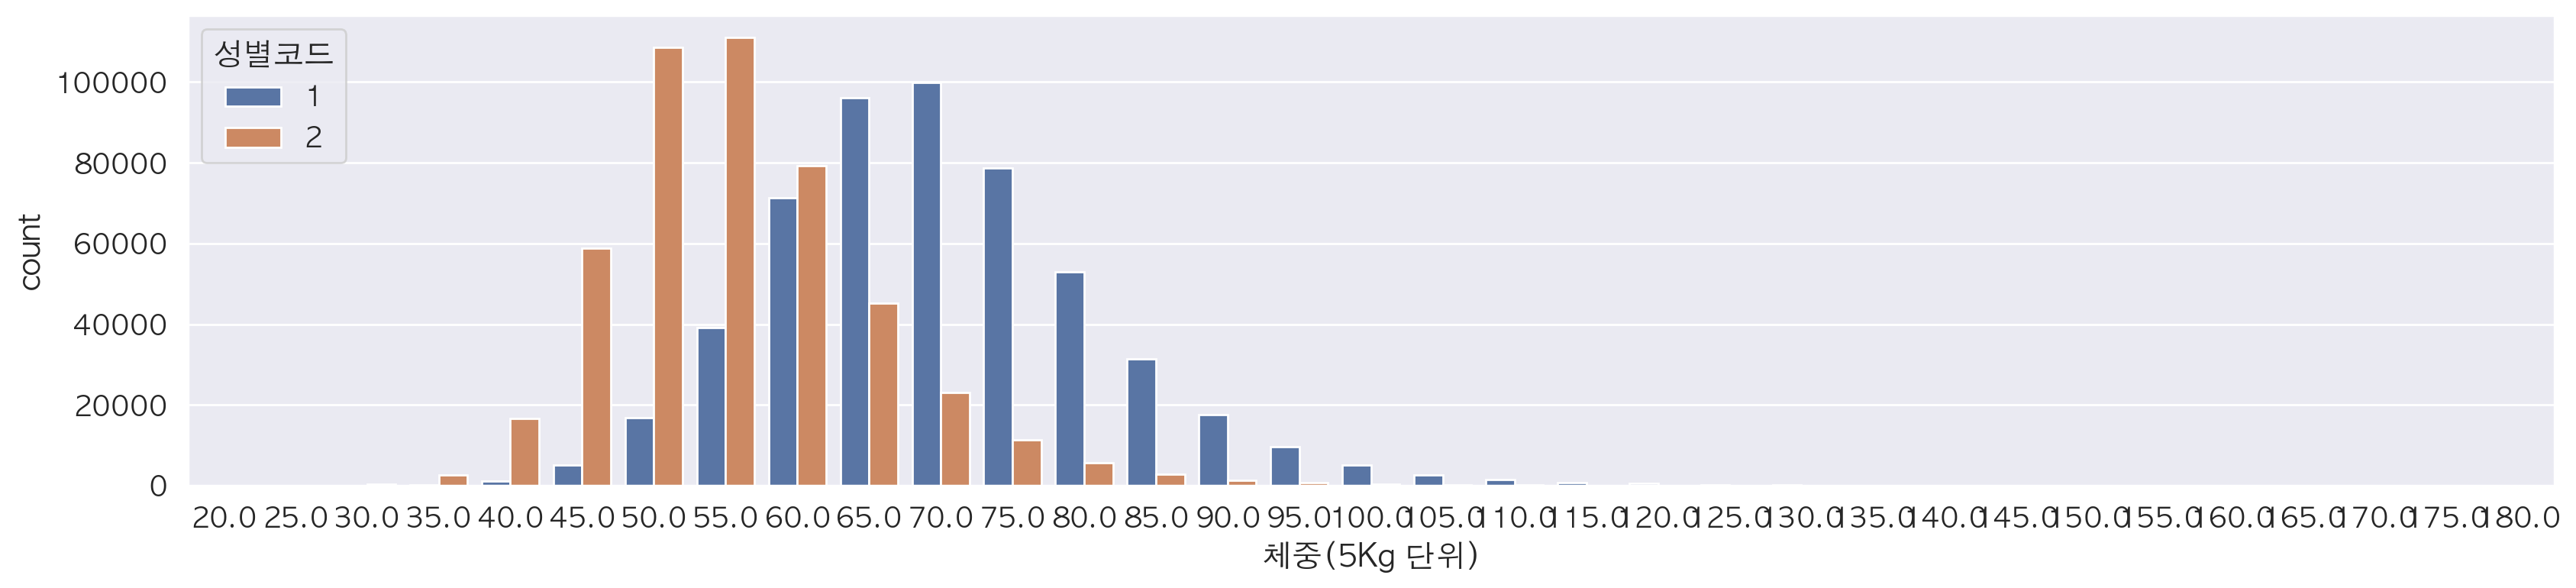

In [138]:
# countplot으로 체중 확인(hue="성별코드")
plt.figure(figsize = (20,4))
c = sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

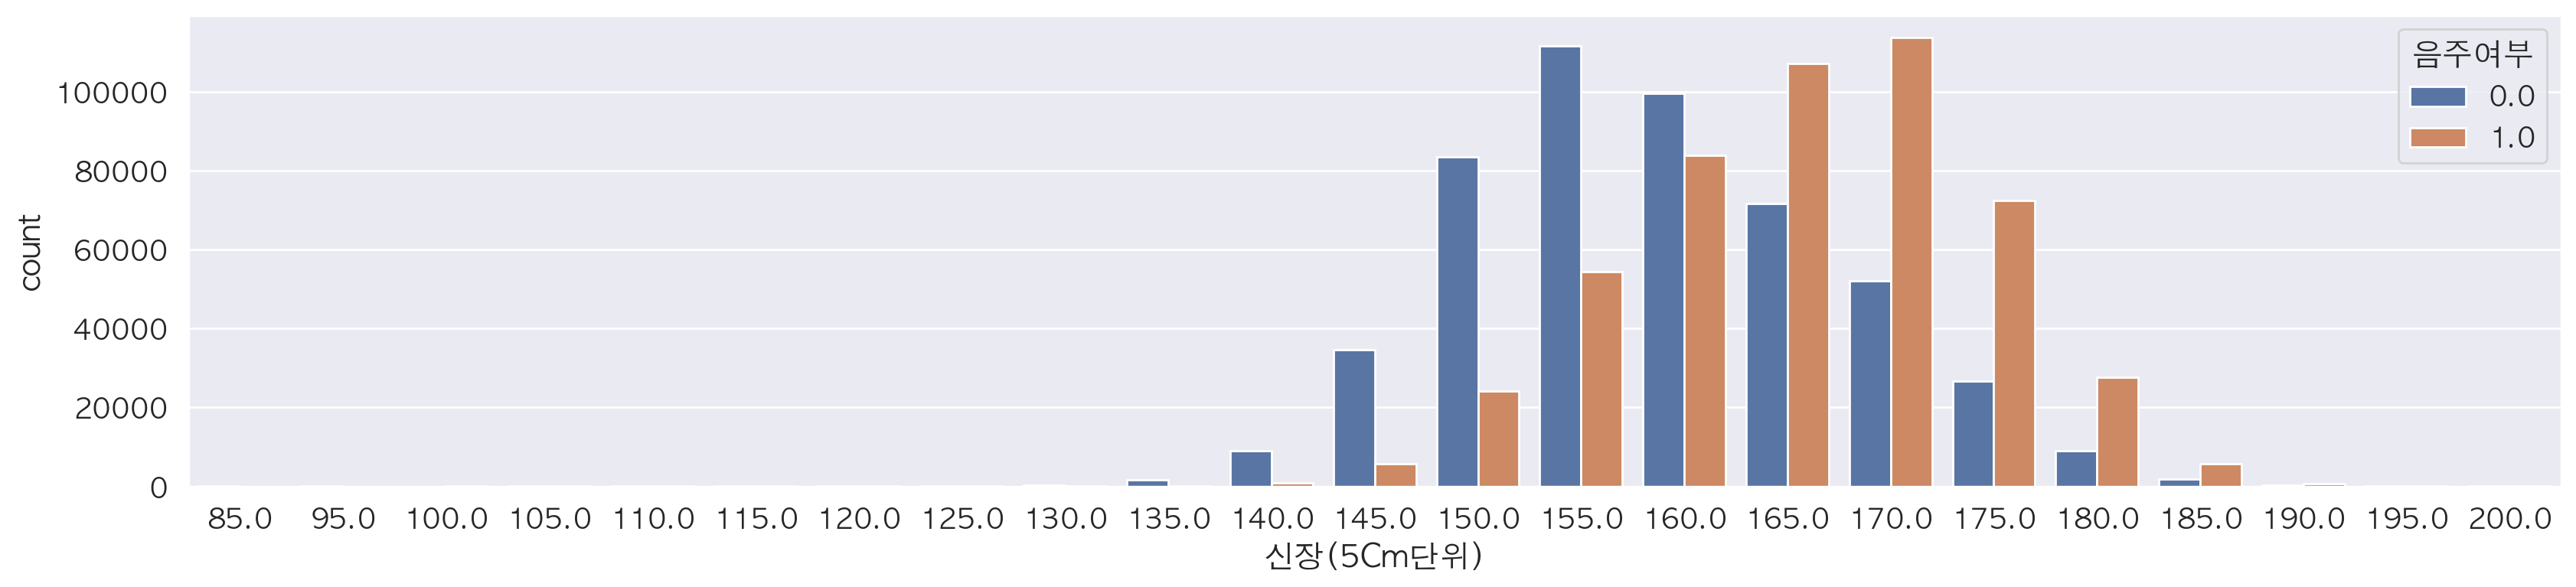

In [141]:
# countplot으로 신장 확인(hue="성별코드")
plt.figure(figsize=(20,4))
c = sns.countplot(data=df, x="신장(5Cm단위)", hue="음주여부")

## barplot - 수치형 vs 범주형 데이터

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

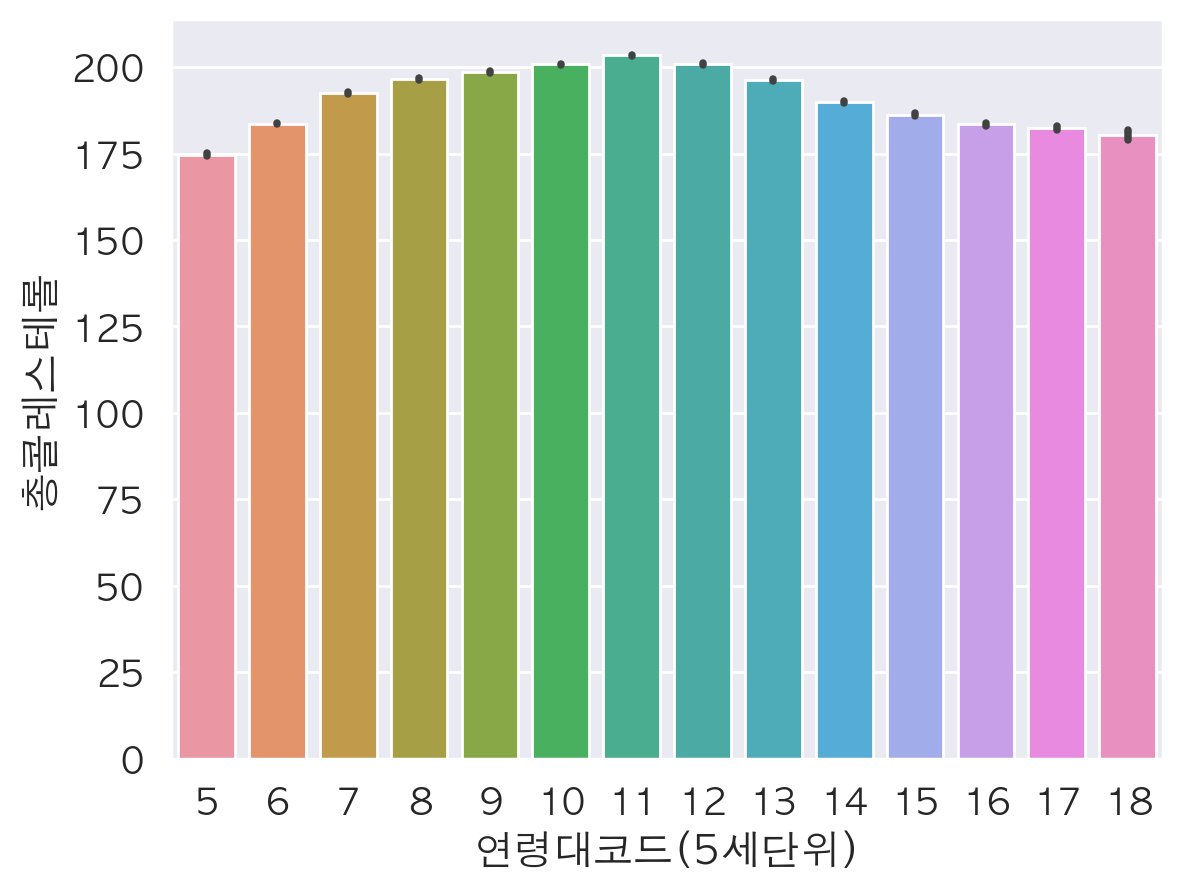

In [143]:
sns.barplot(data = df, x="연령대코드(5세단위)", y = "총콜레스테롤")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

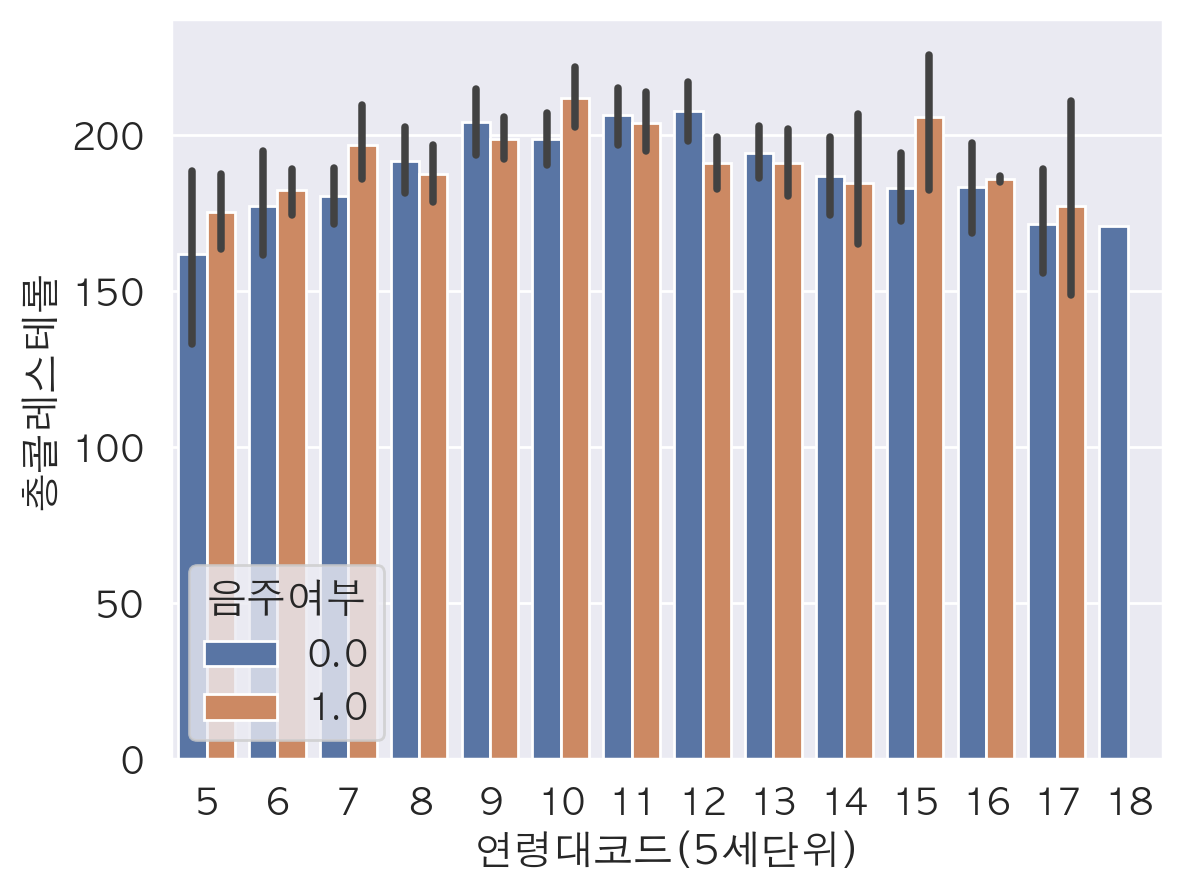

In [145]:
sns.barplot(data = df_sample, x="연령대코드(5세단위)", y = "총콜레스테롤", hue = "음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

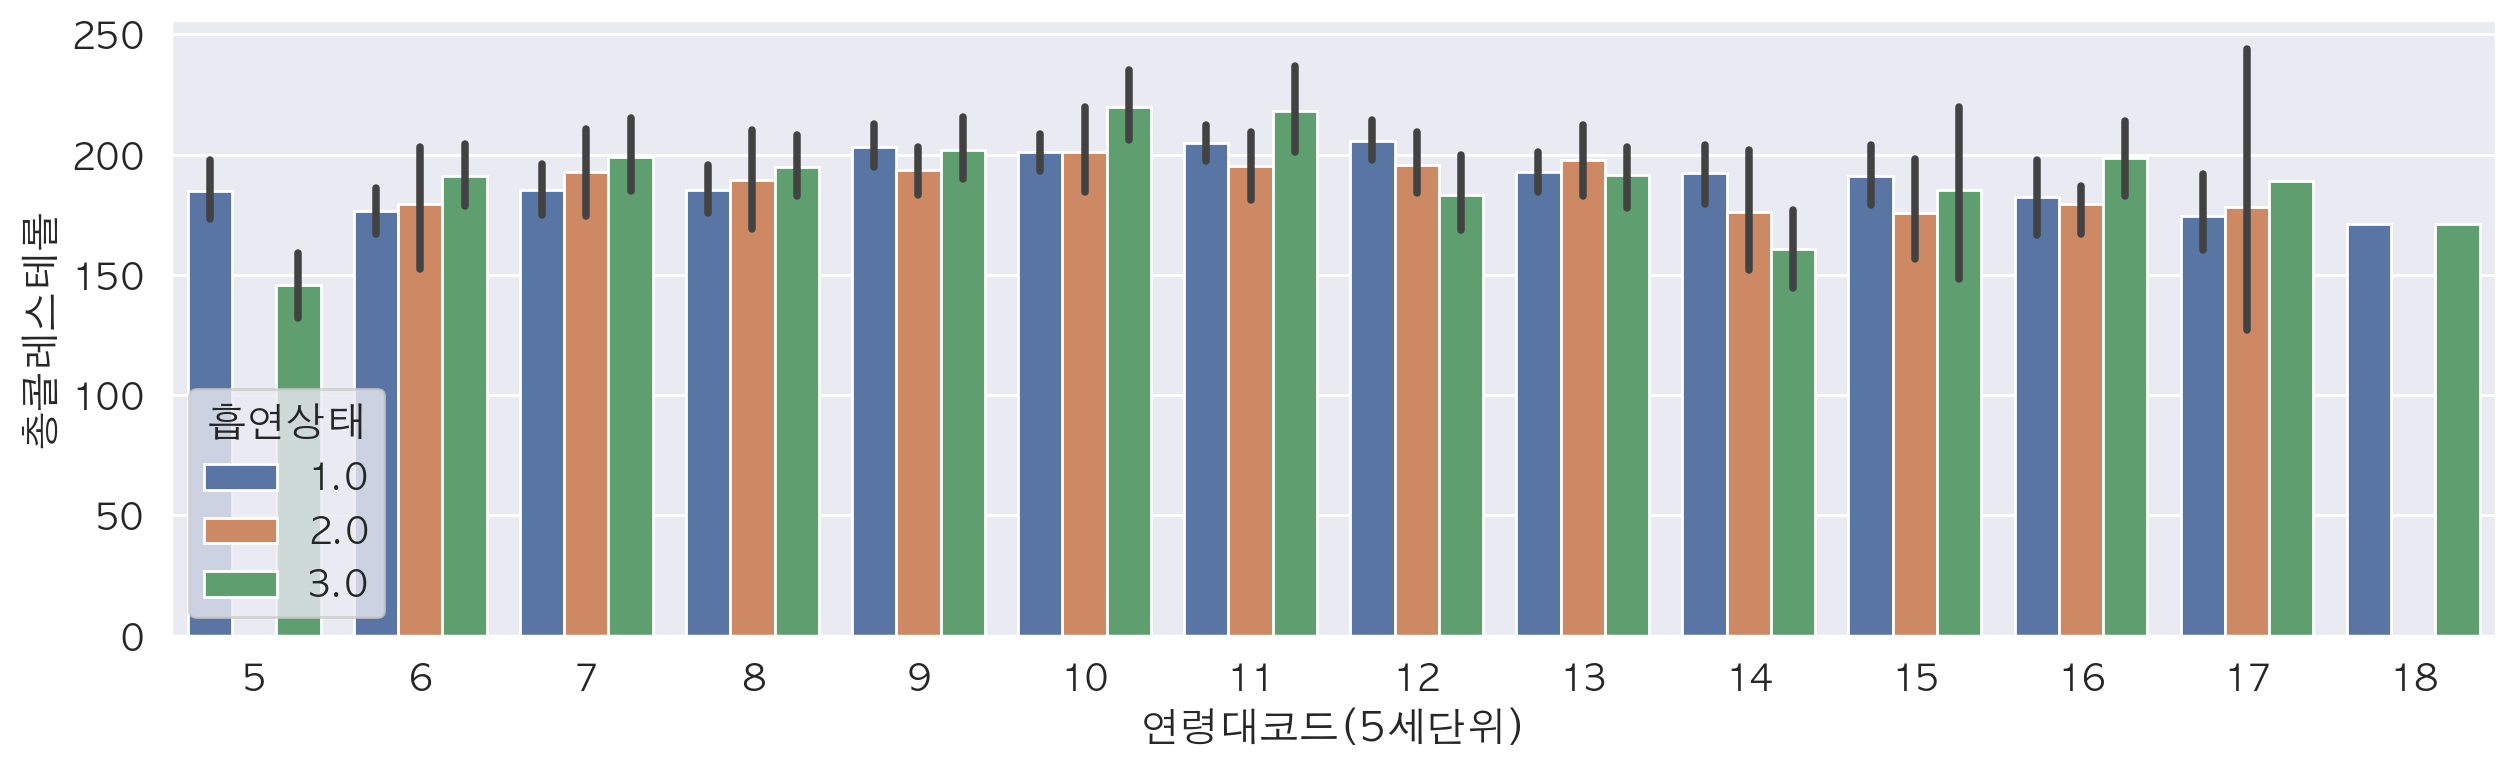

In [149]:
plt.figure(figsize=(15,4))
sns.barplot(data = df_sample, x="연령대코드(5세단위)", y = "총콜레스테롤", hue = "흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

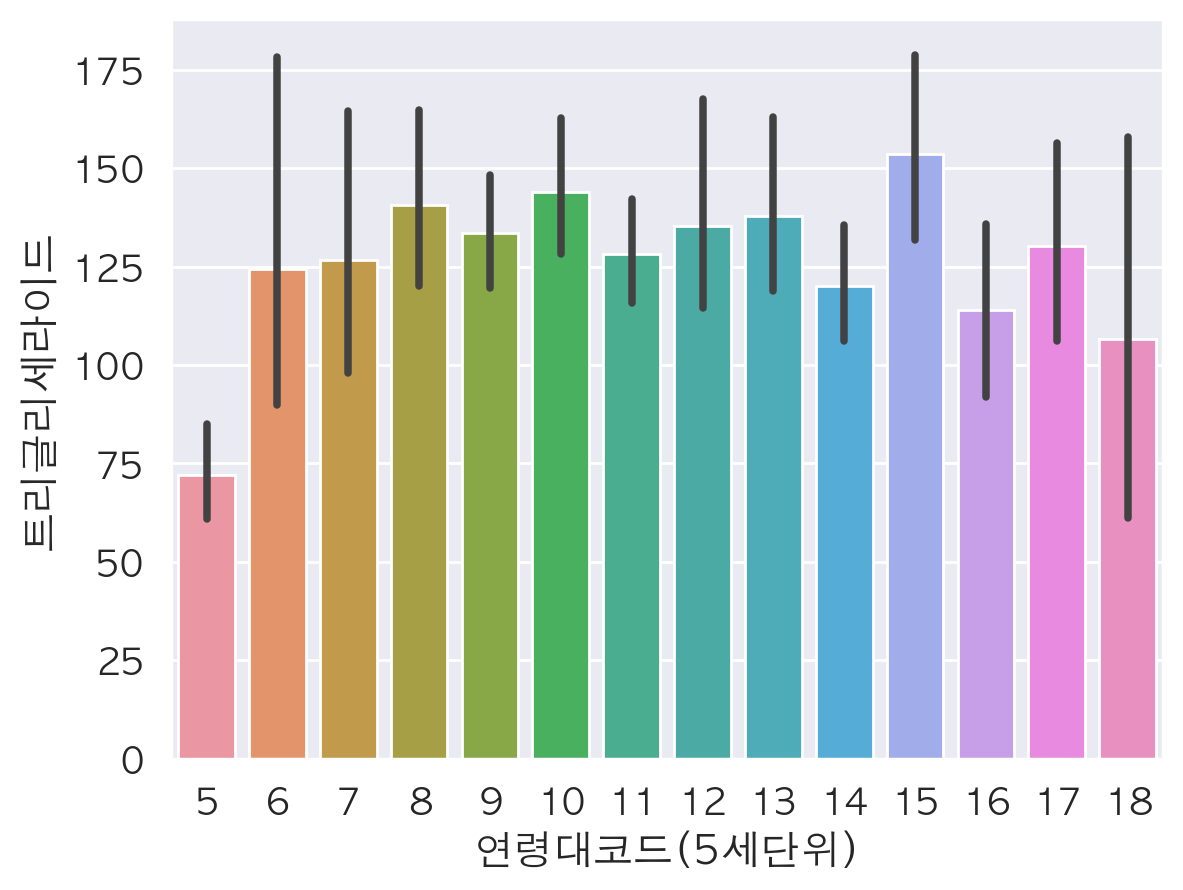

In [154]:
# 트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "트리글리세라이드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

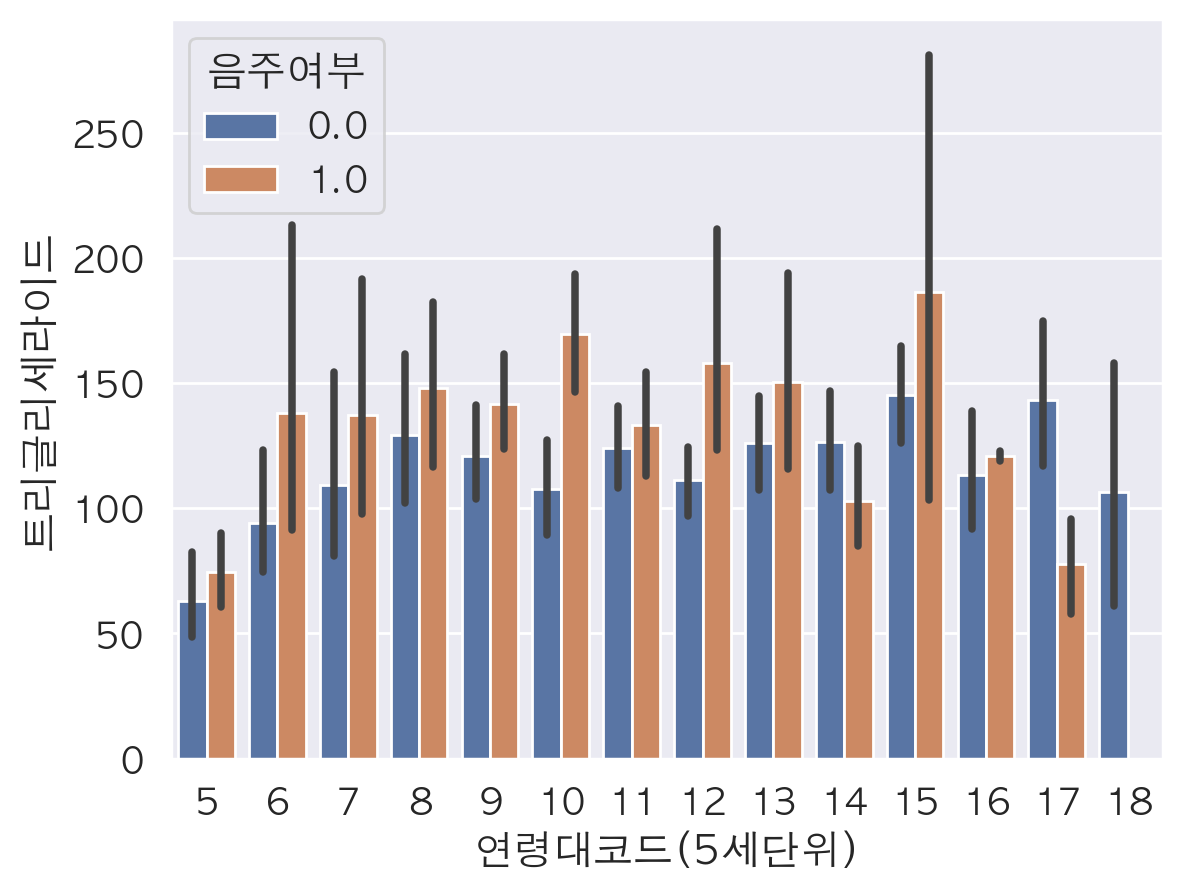

In [157]:
# 검은색 막대는 신뢰구간(ci)을 의미
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "트리글리세라이드", hue="음주여부", ci=95)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

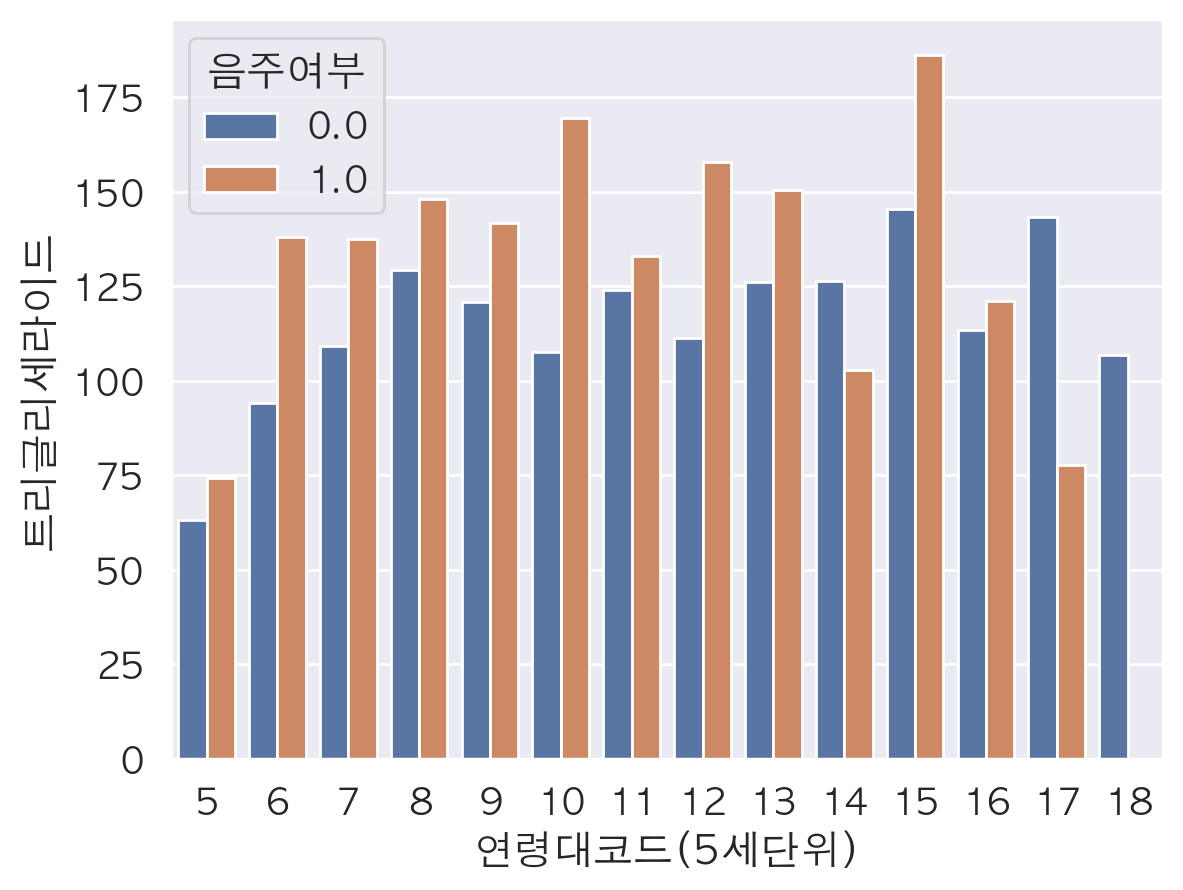

In [158]:
# 신뢰구간 없이 표현하기
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "트리글리세라이드", hue="음주여부", ci= None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

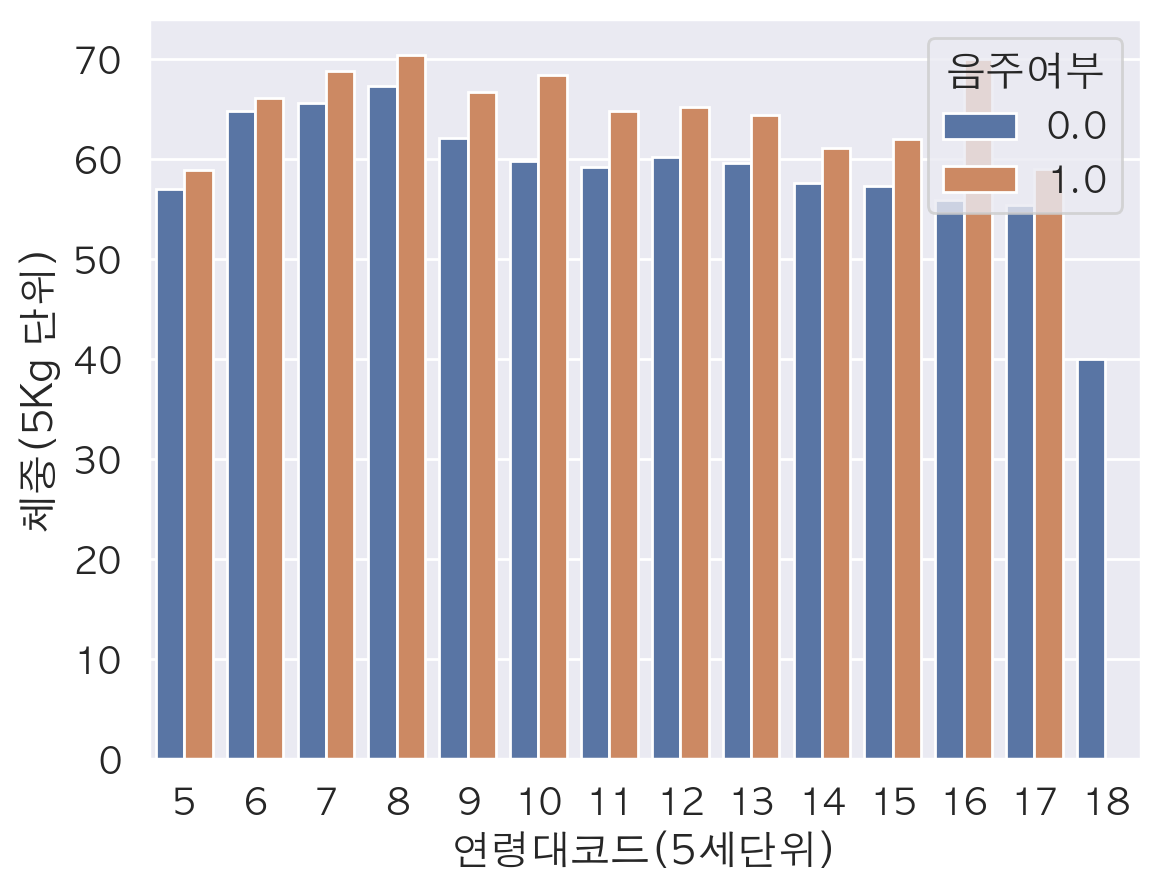

In [160]:
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "체중(5Kg 단위)", hue="음주여부", ci= None)

## Lineplot and pointplot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

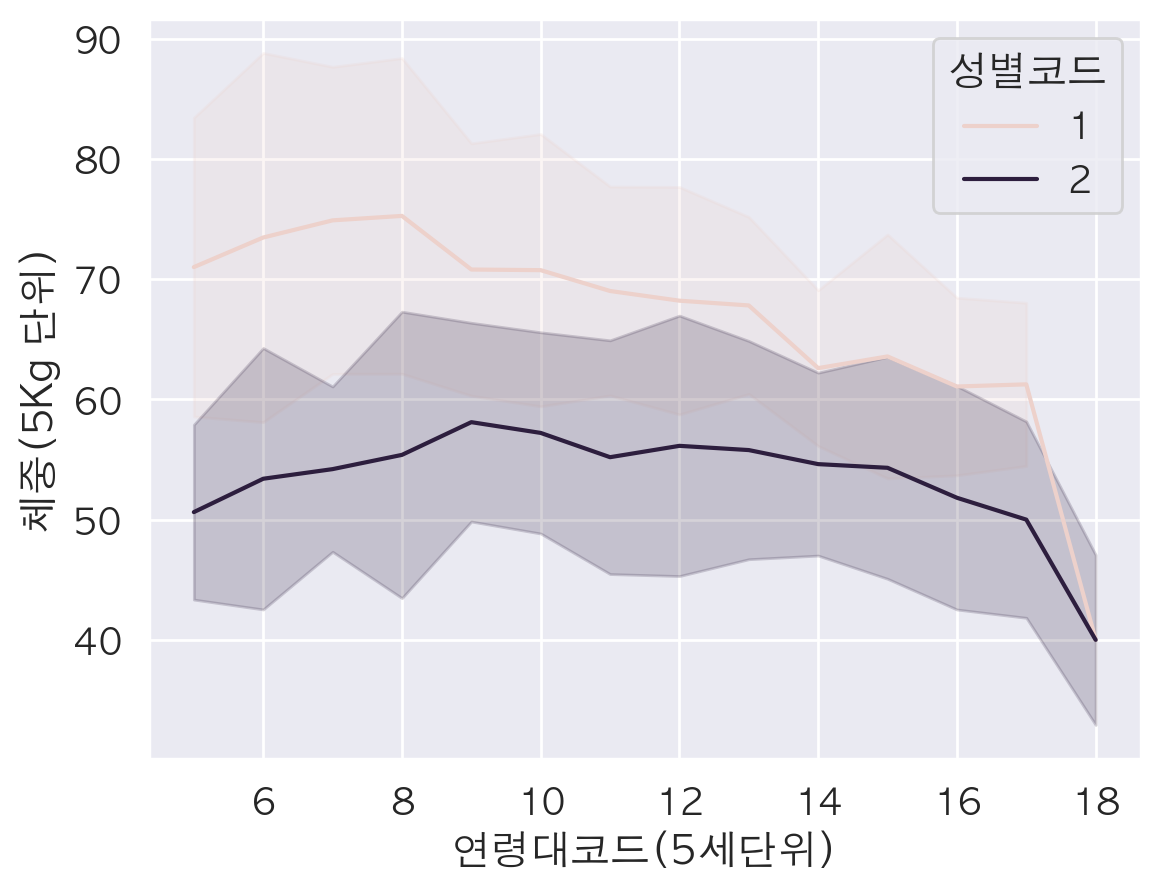

In [163]:
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)",hue="성별코드", ci = "sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

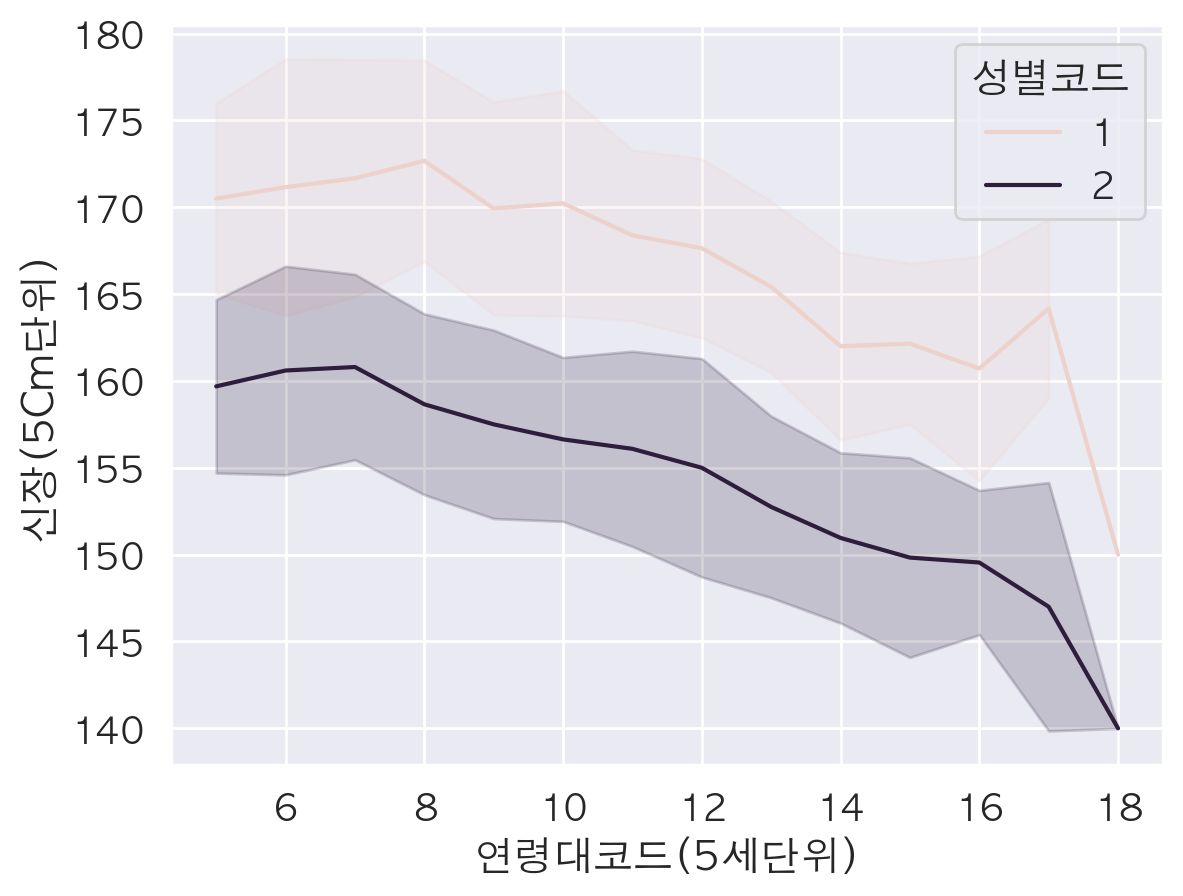

In [165]:
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="성별코드", ci = "sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

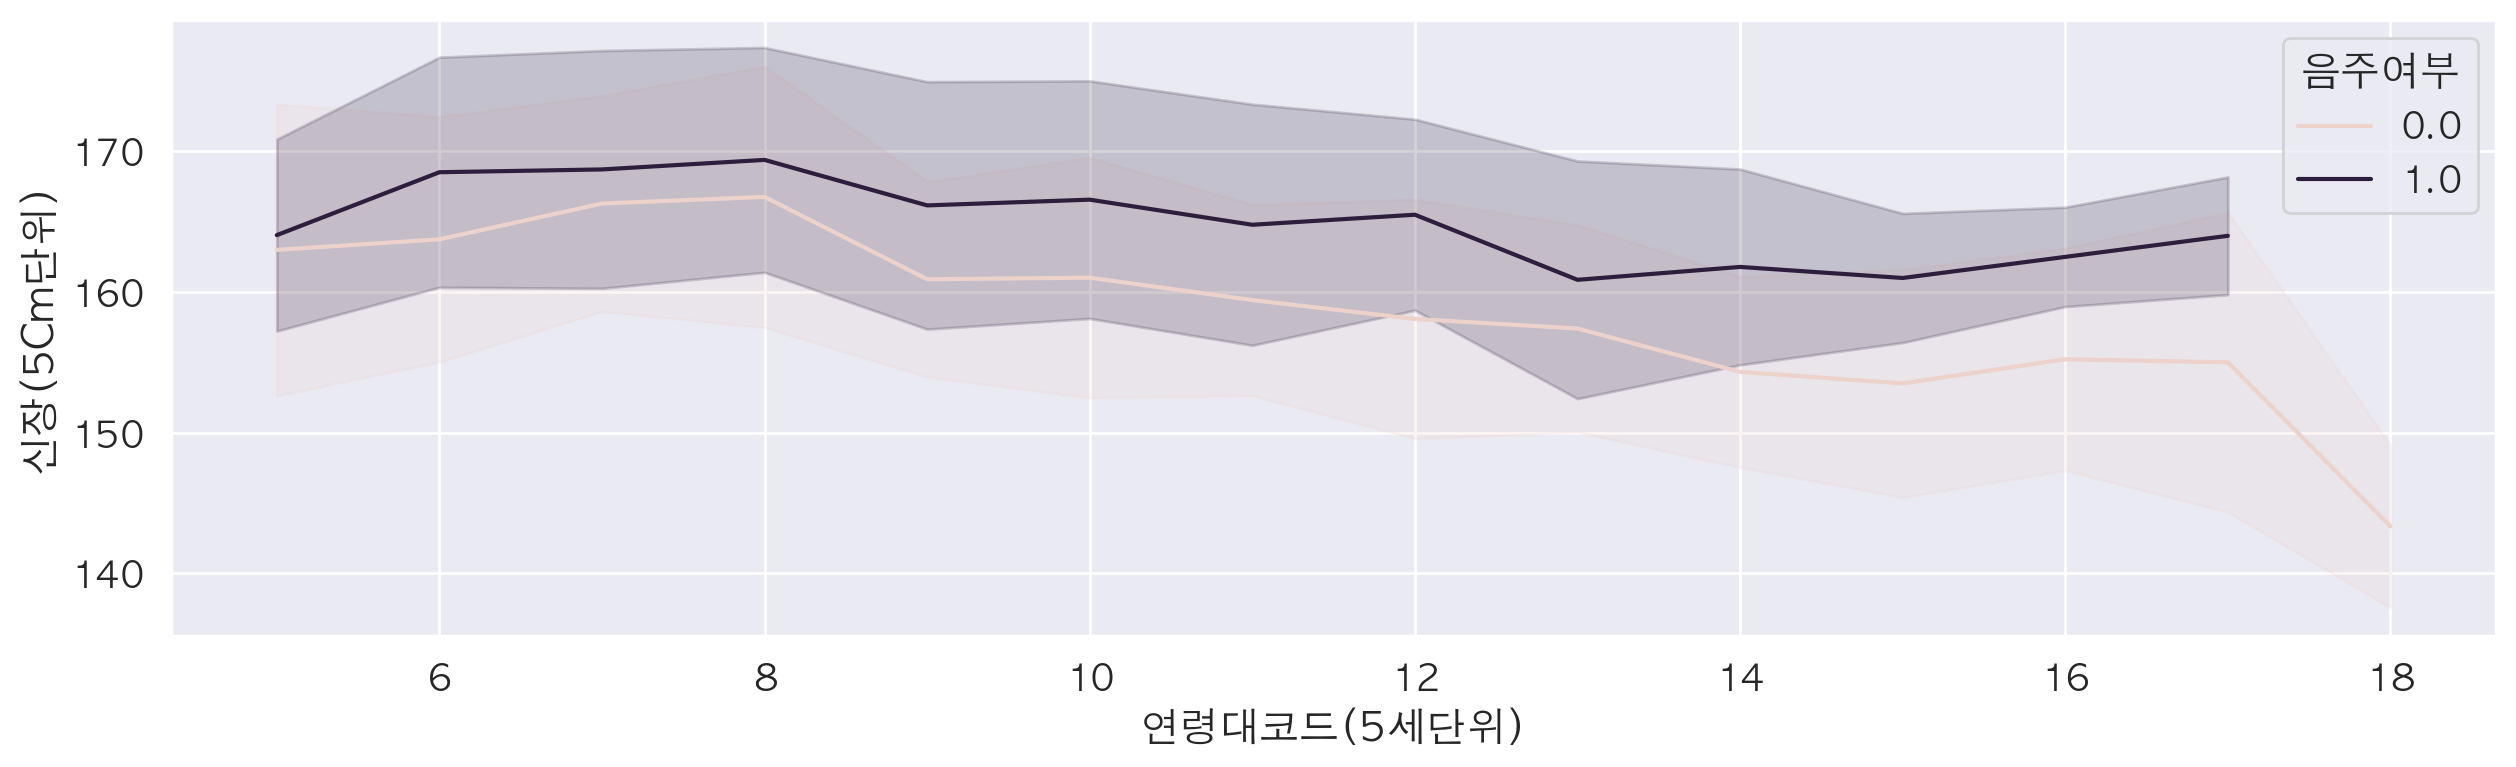

In [168]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="음주여부", ci = "sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

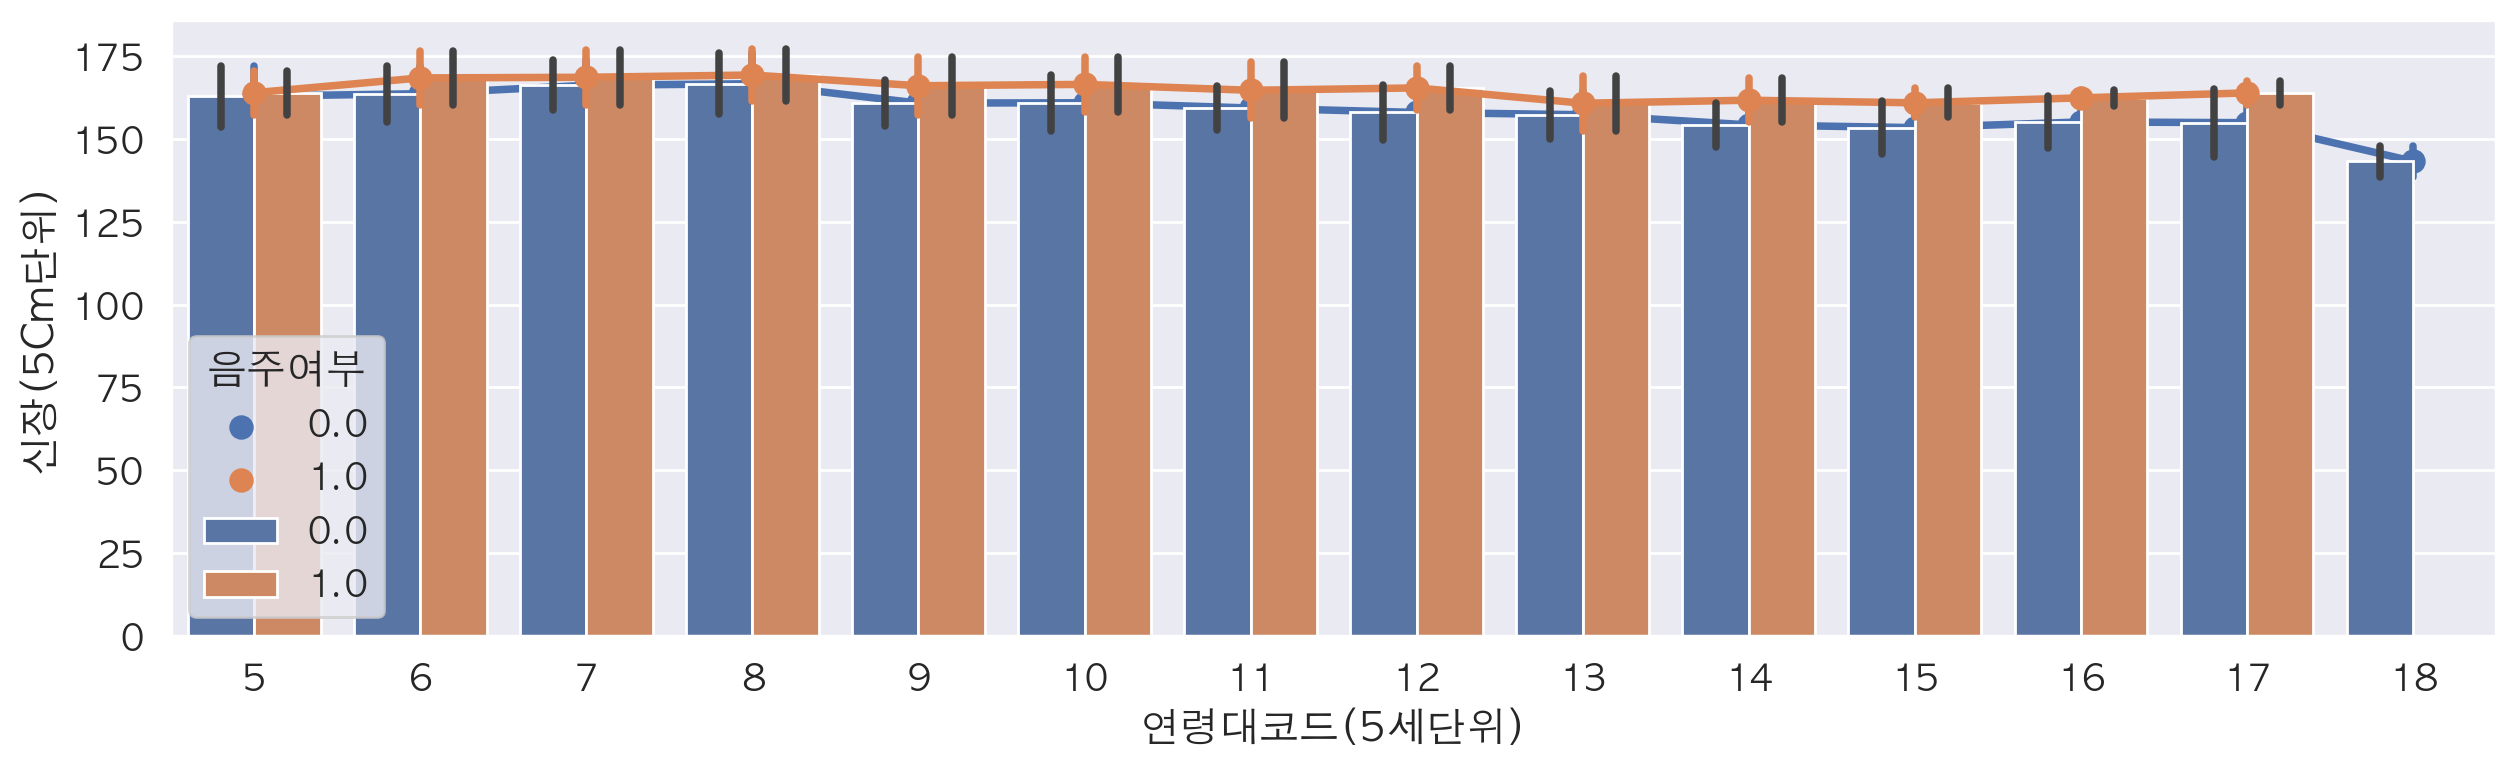

In [170]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="음주여부", ci = "sd")
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="음주여부", ci = "sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

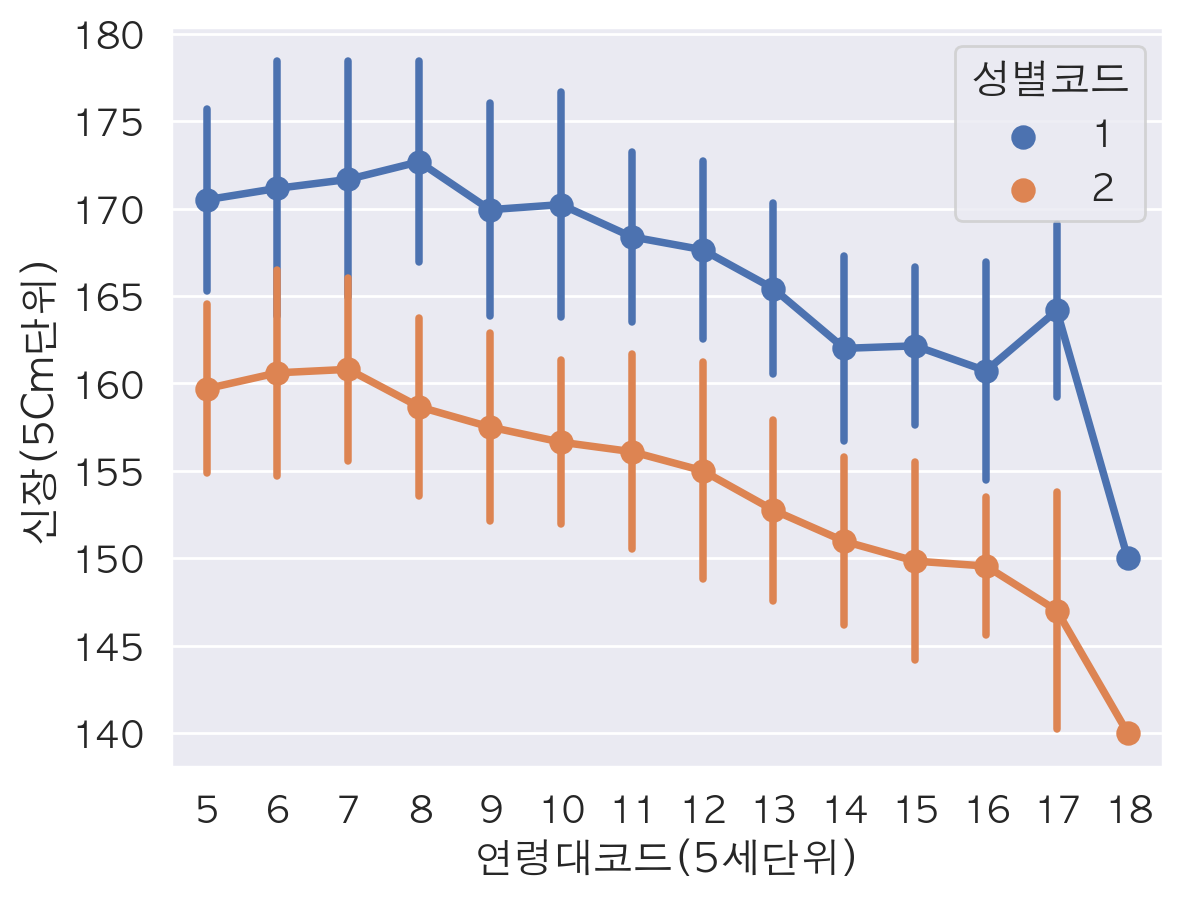

In [171]:
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",hue="성별코드", ci = "sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

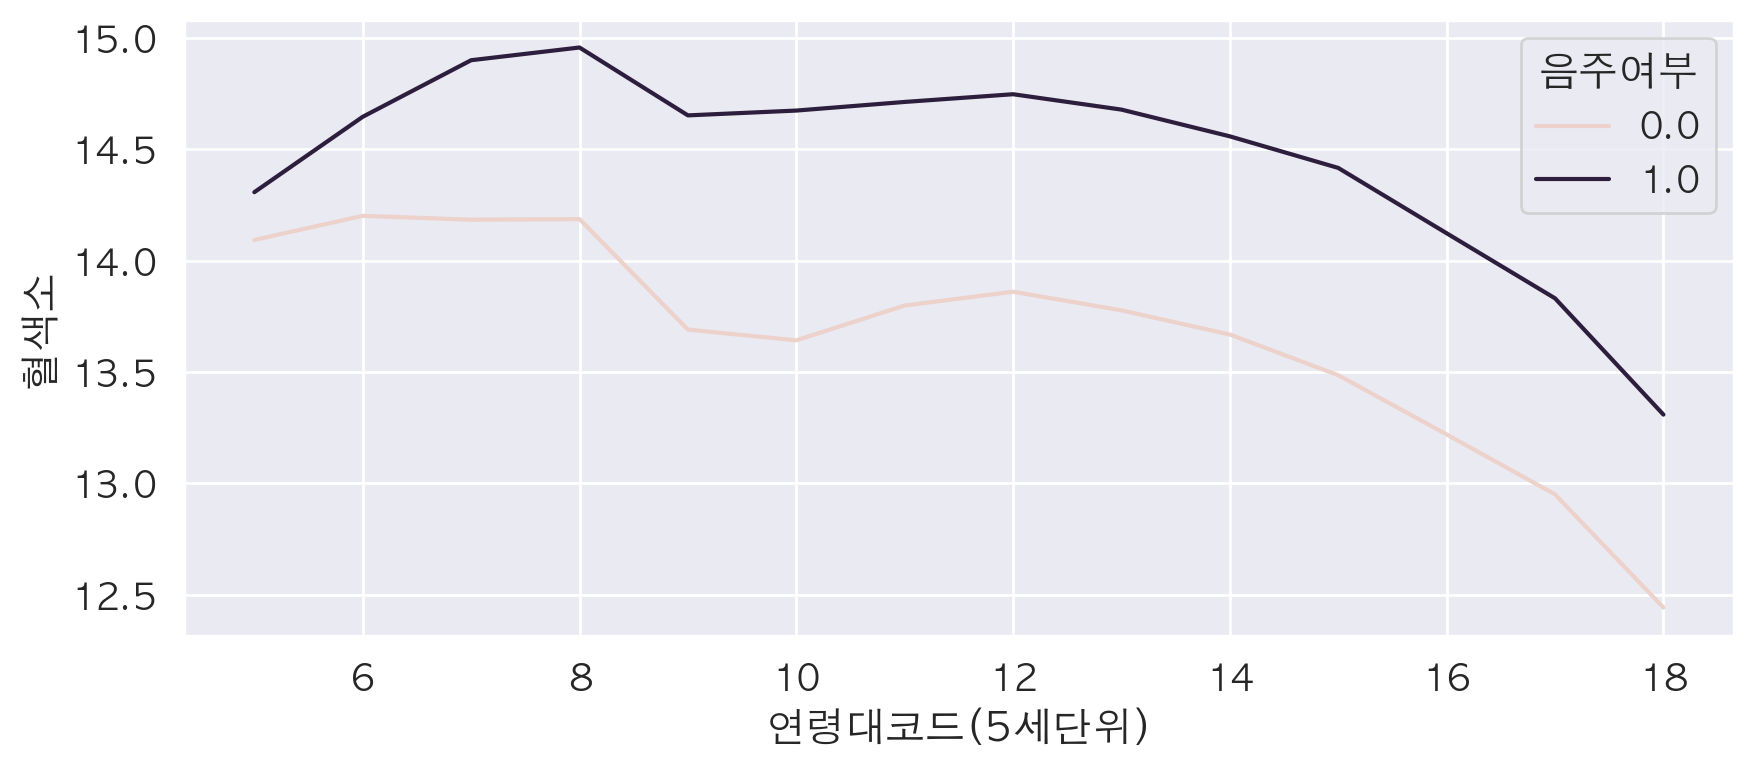

In [217]:
plt.figure(figsize=(10,4))
sns.lineplot(data = df, x = "연령대코드(5세단위)", y = "혈색소", hue="음주여부", ci = None)

## boxplot

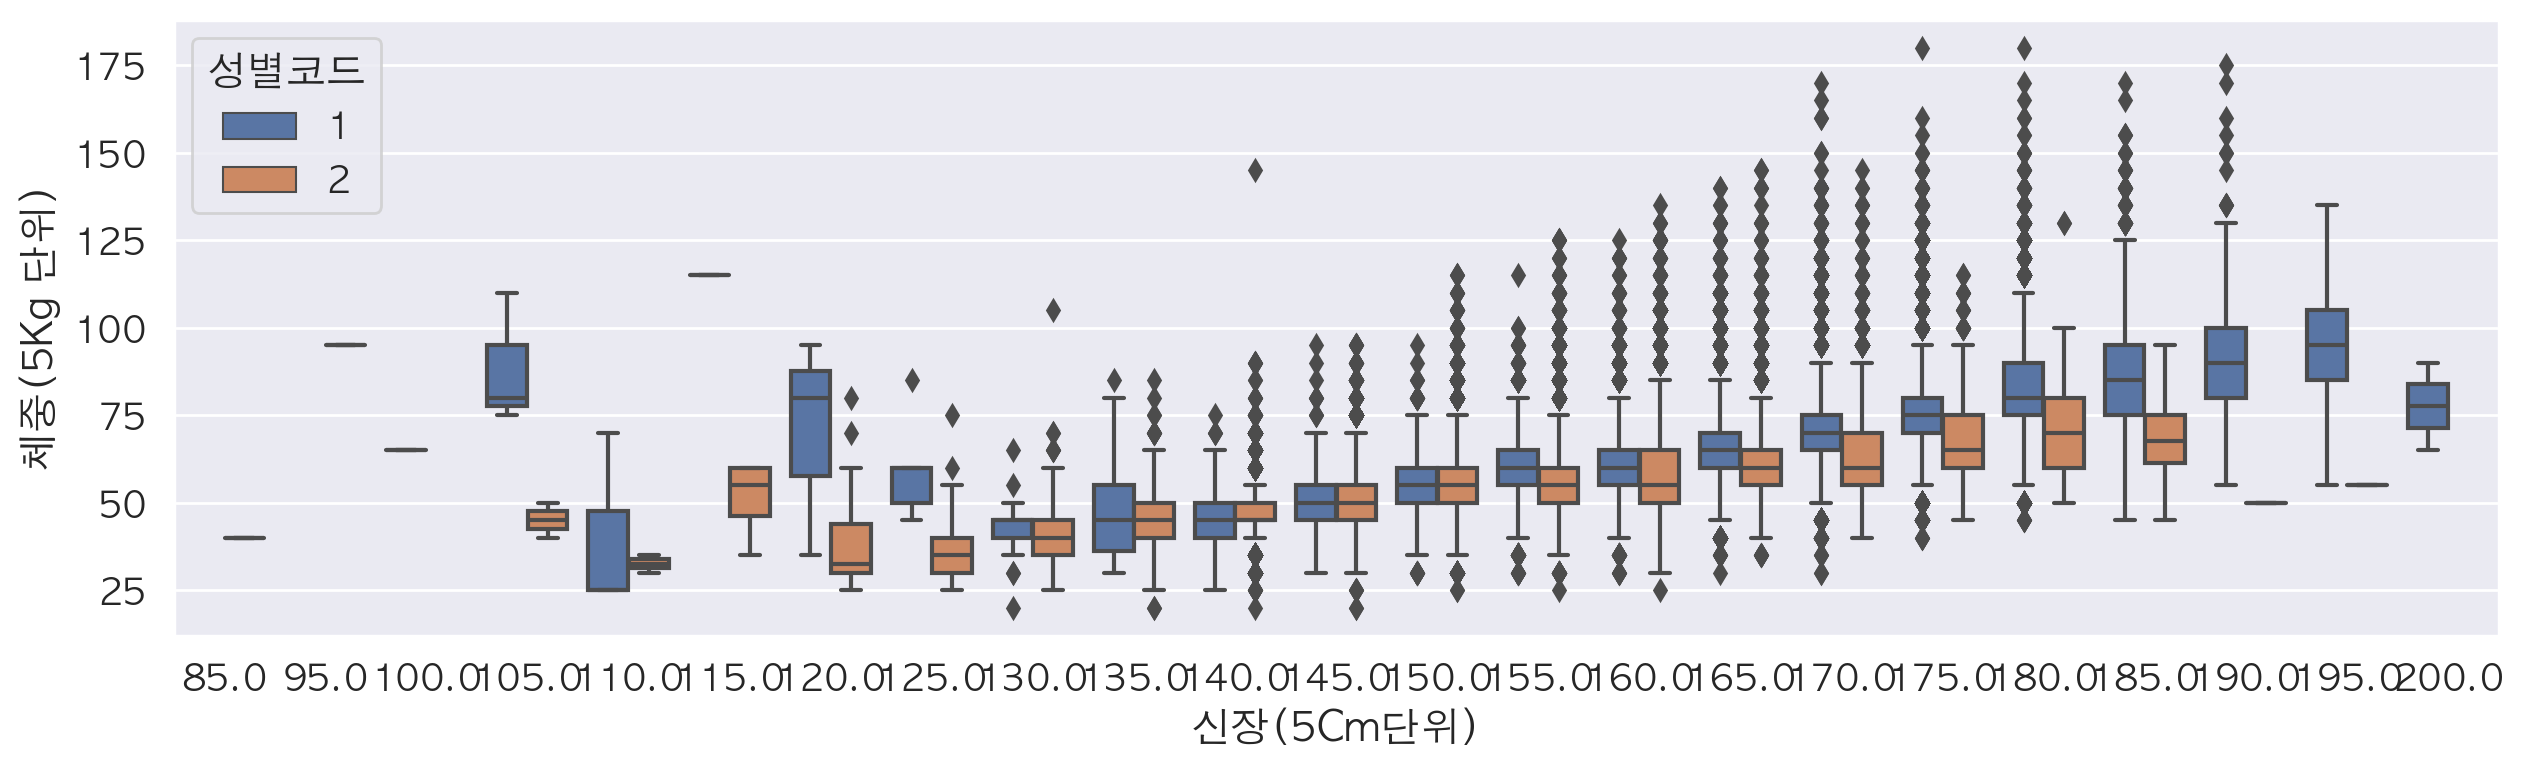

In [185]:
# boxplot으로 신장에 따른 체중을 그리며, 성별코드에 따라 다른 색상으로 표현되게 함.

plt.figure(figsize=(15,4))
a = sns.boxplot(data=df, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue="성별코드")

## violinplot

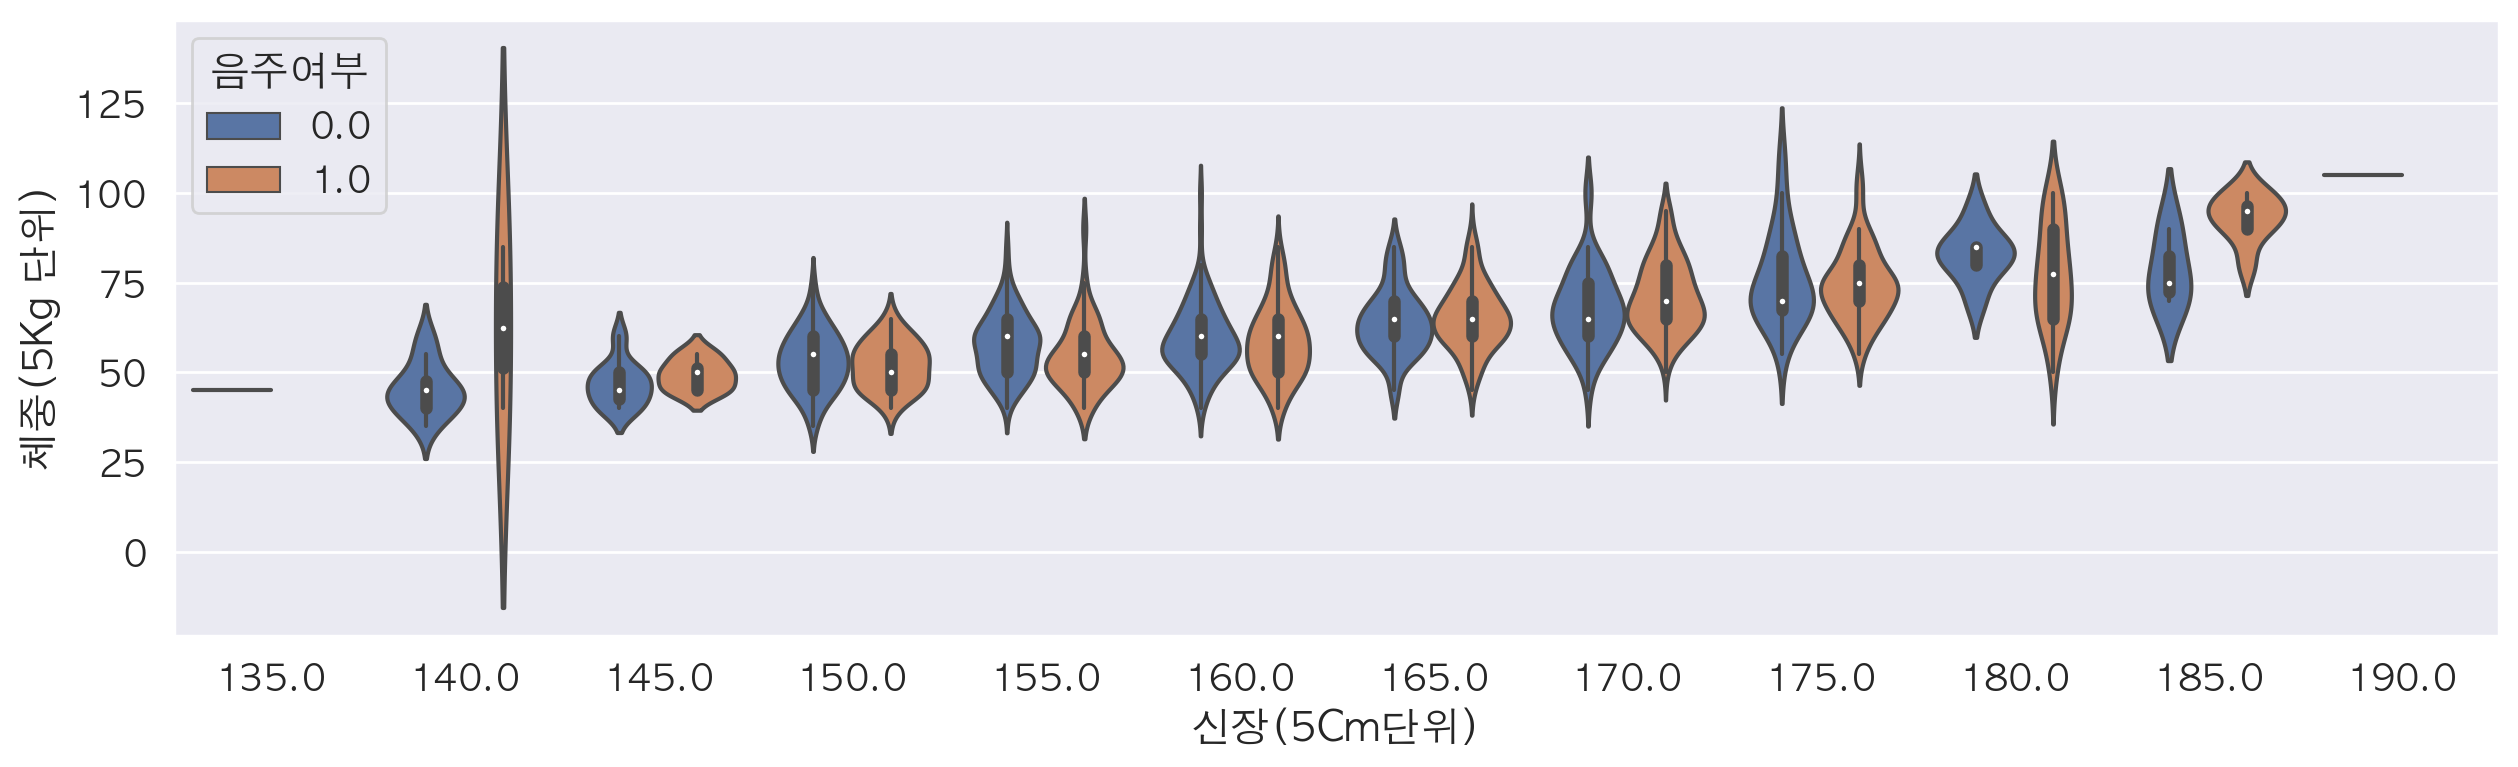

In [191]:
# violinplot 신장에 따른 체중을 그리며, 음주여부에 따라 다른 색상으로 표현되게 함.

plt.figure(figsize=(15,4))
a = sns.violinplot(data=df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue="음주여부")

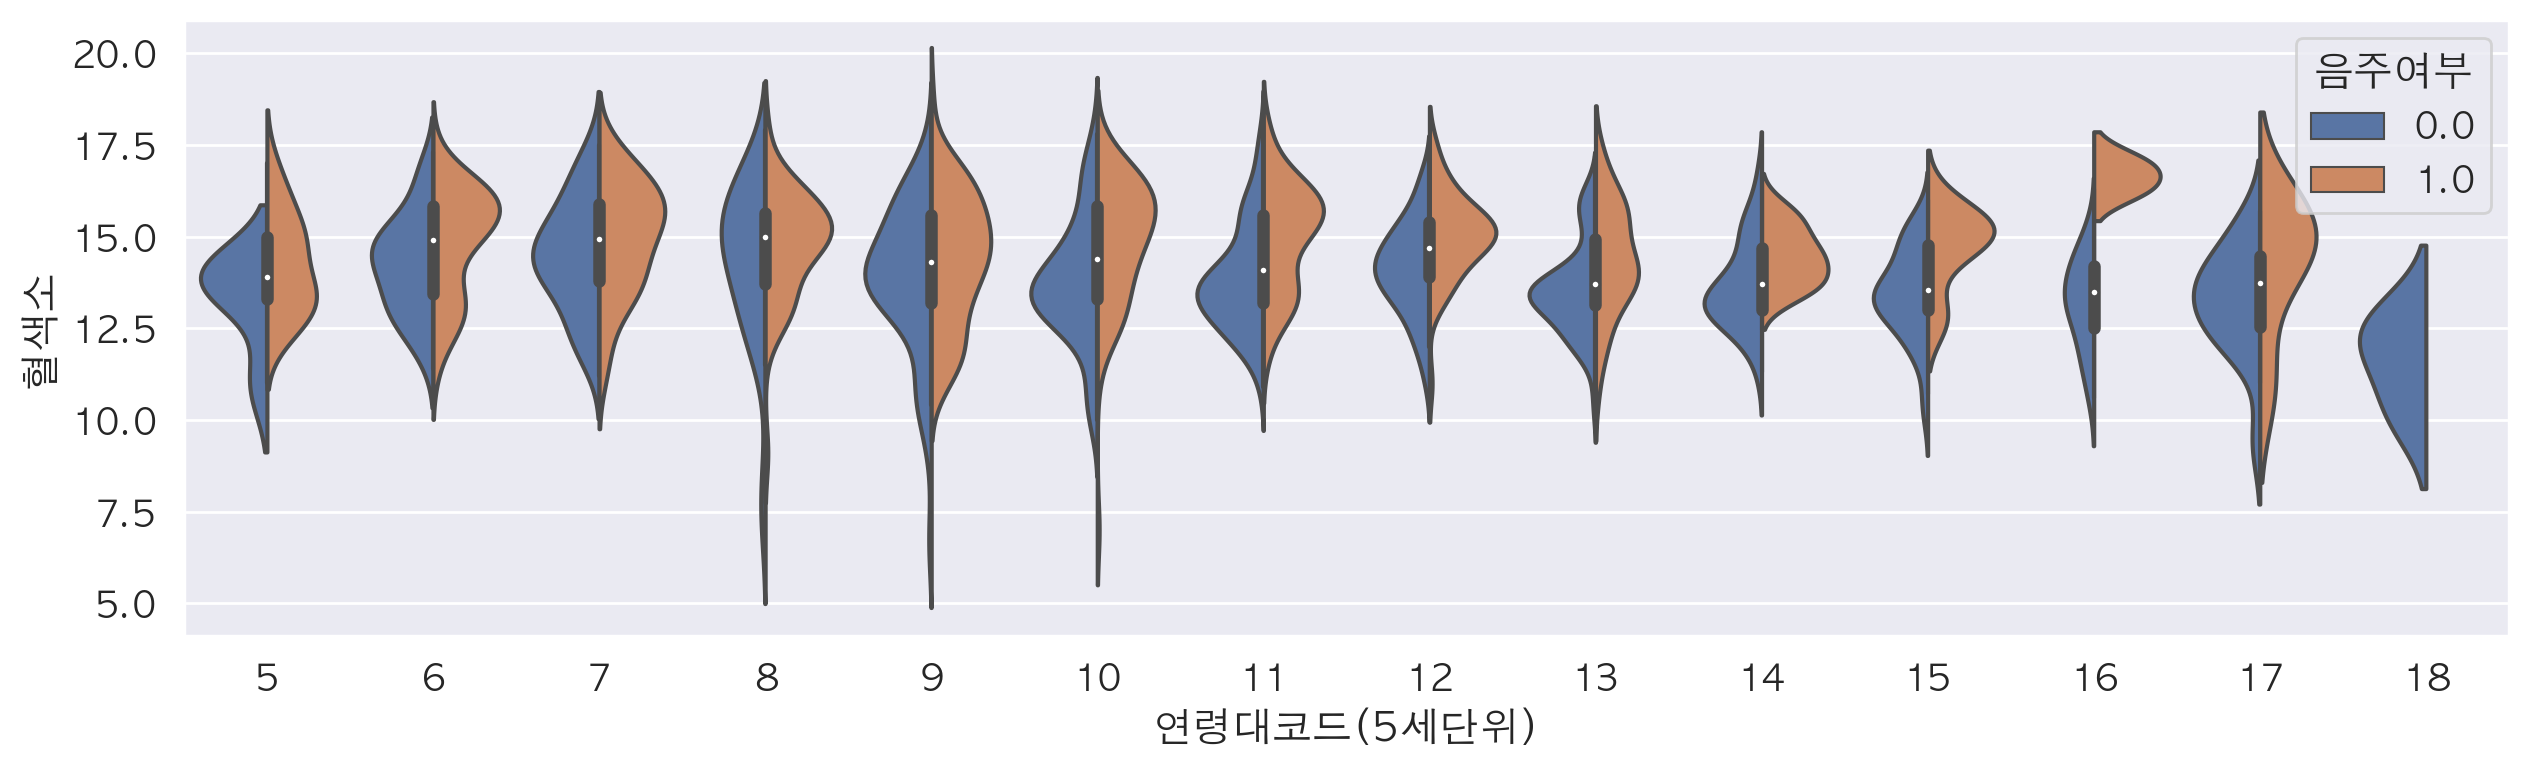

In [190]:
# violinplot에서는 split 기능 활용 가능 split=True 하면 음주여부에 따라 나뉜 두 차트가 합쳐짐

plt.figure(figsize=(15,4))
a = sns.violinplot(data=df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue="음주여부", split = True)

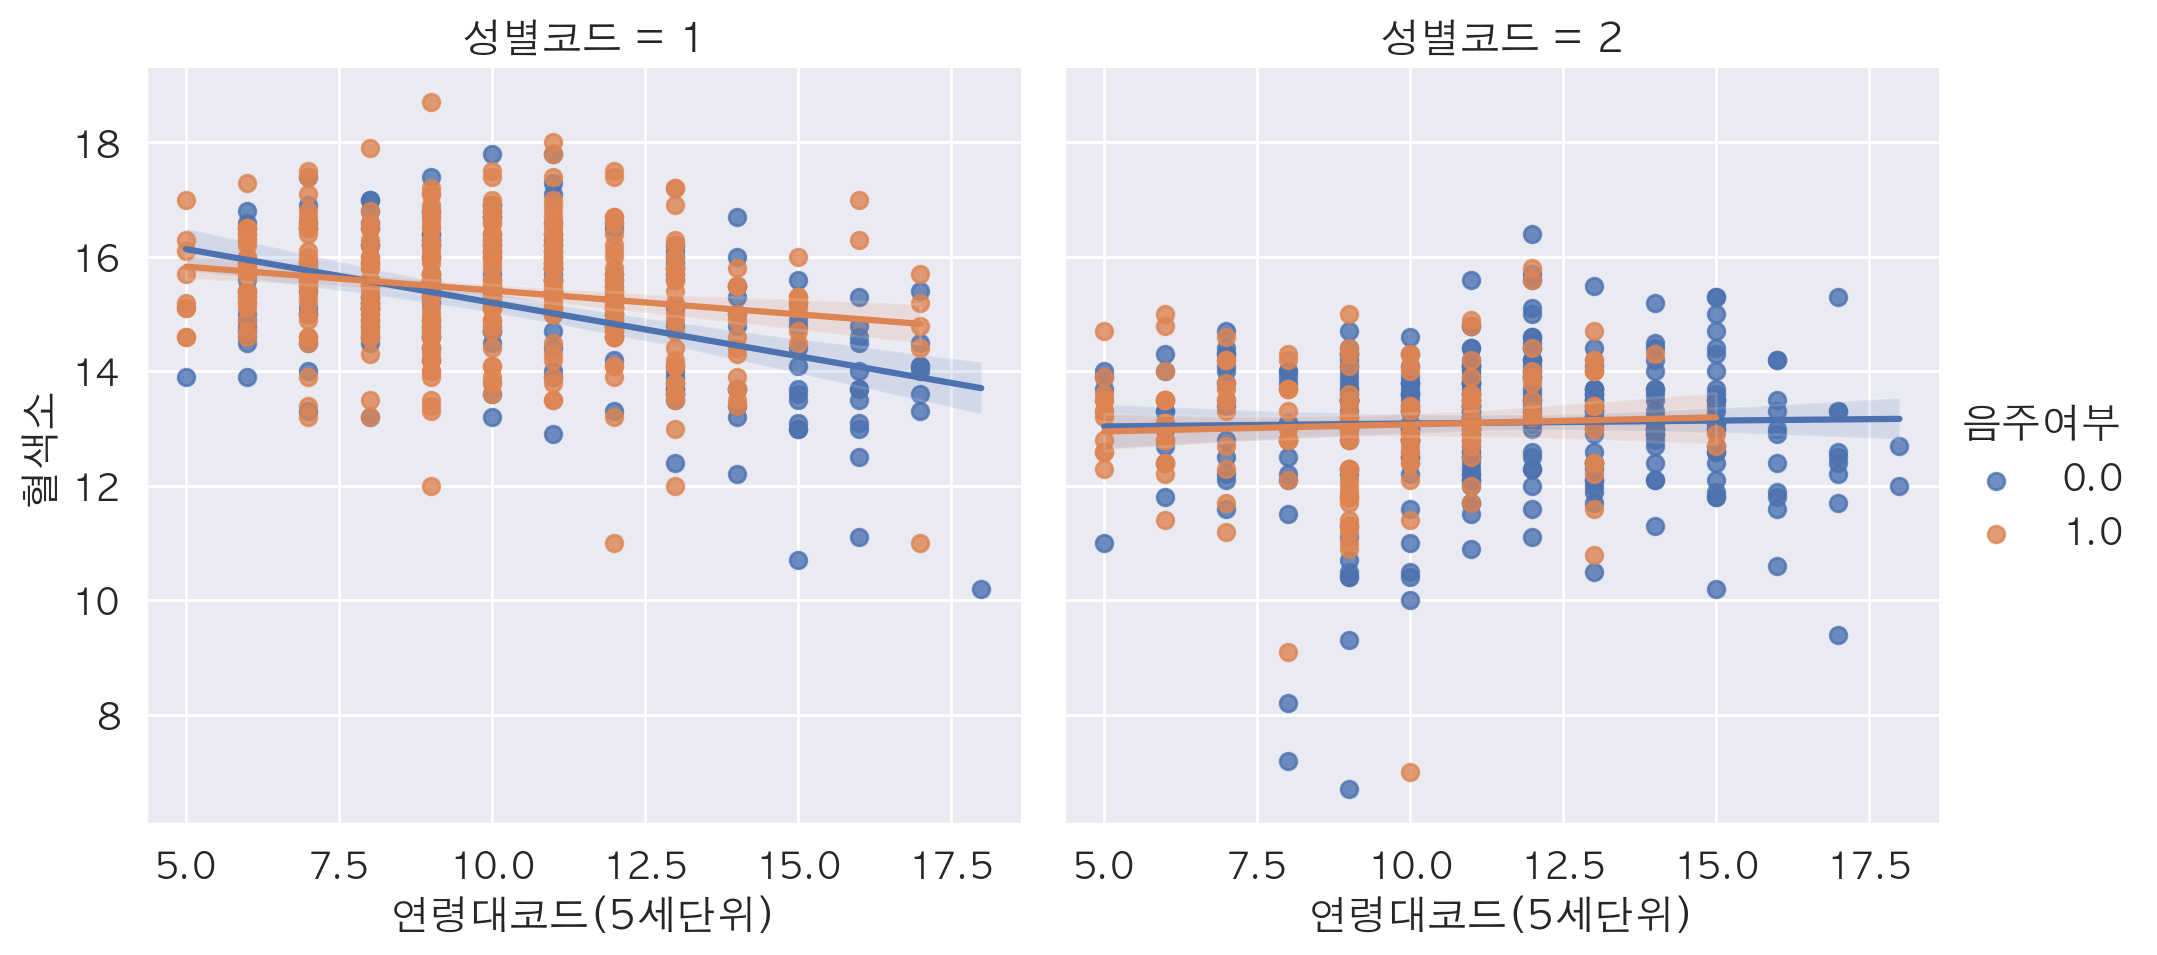

In [196]:
# lmplot 
sns.lmplot(data = df_sample, x = "연령대코드(5세단위)", y = "혈색소", hue = "음주여부", col = "성별코드")

# 수치형 데이터 시각화

## Scatterplot - 산점도

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

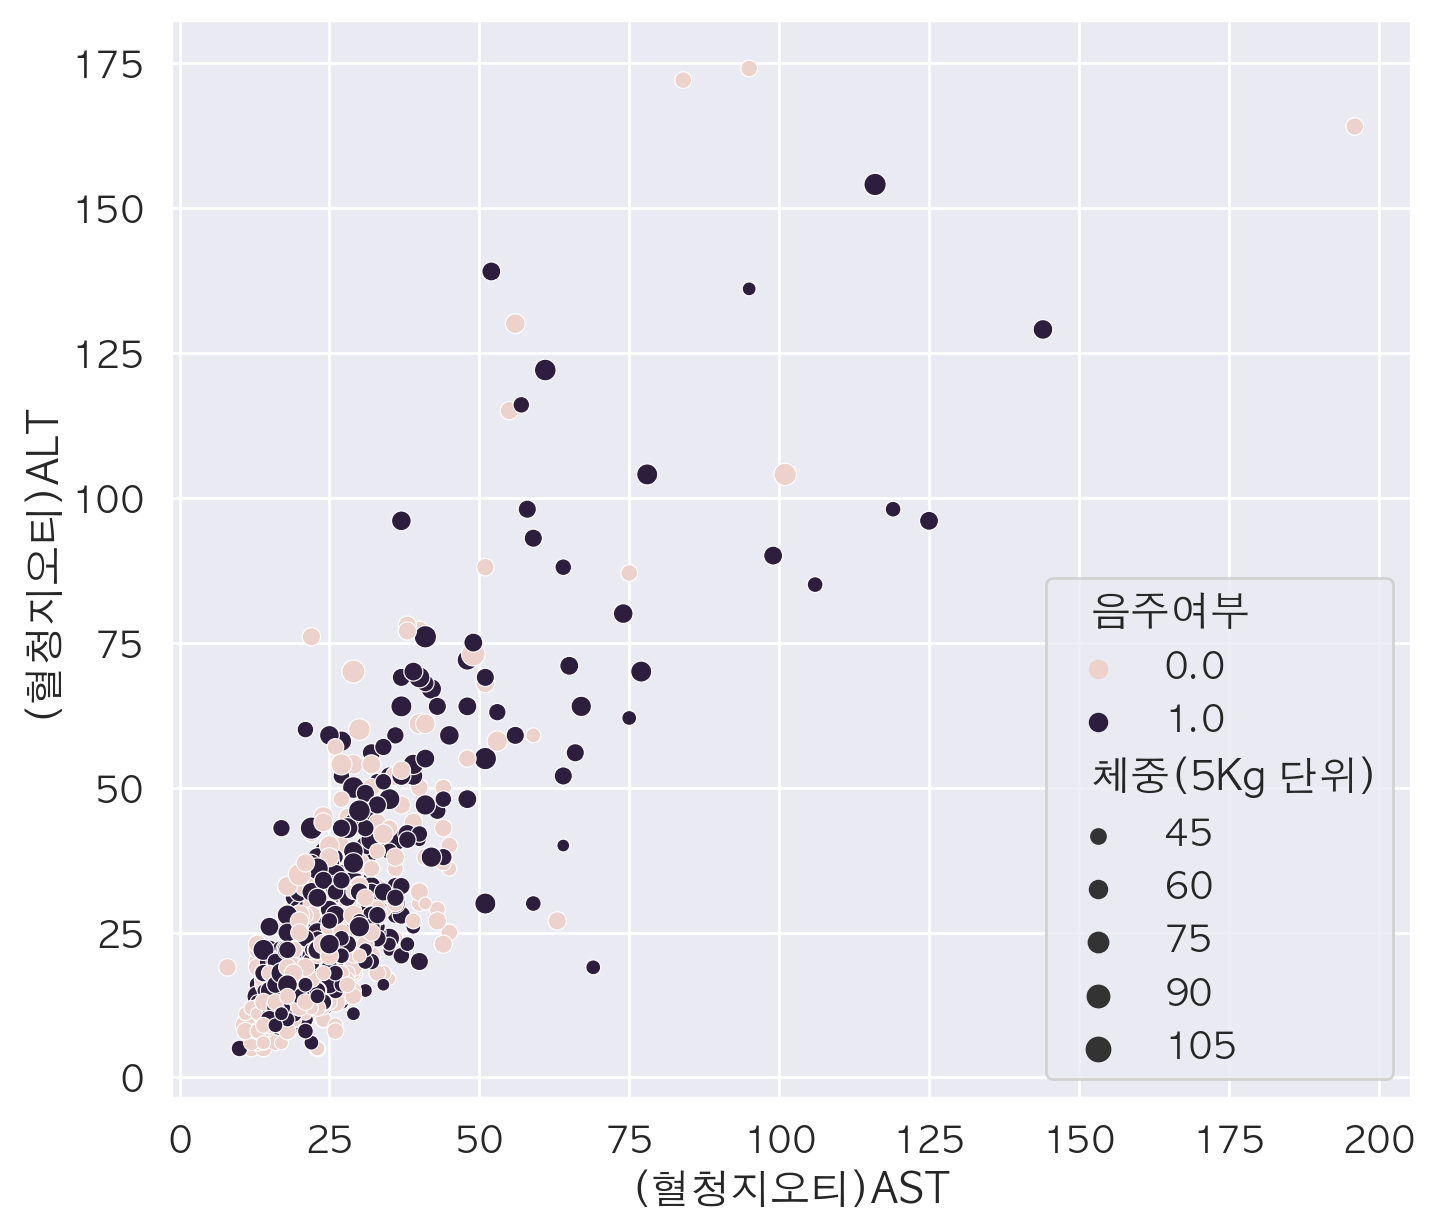

In [202]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample, x = "(혈청지오티)AST", y="(혈청지오티)ALT", hue = "음주여부",
               size = "체중(5Kg 단위)")

## lmplot으로 상관관계 보기

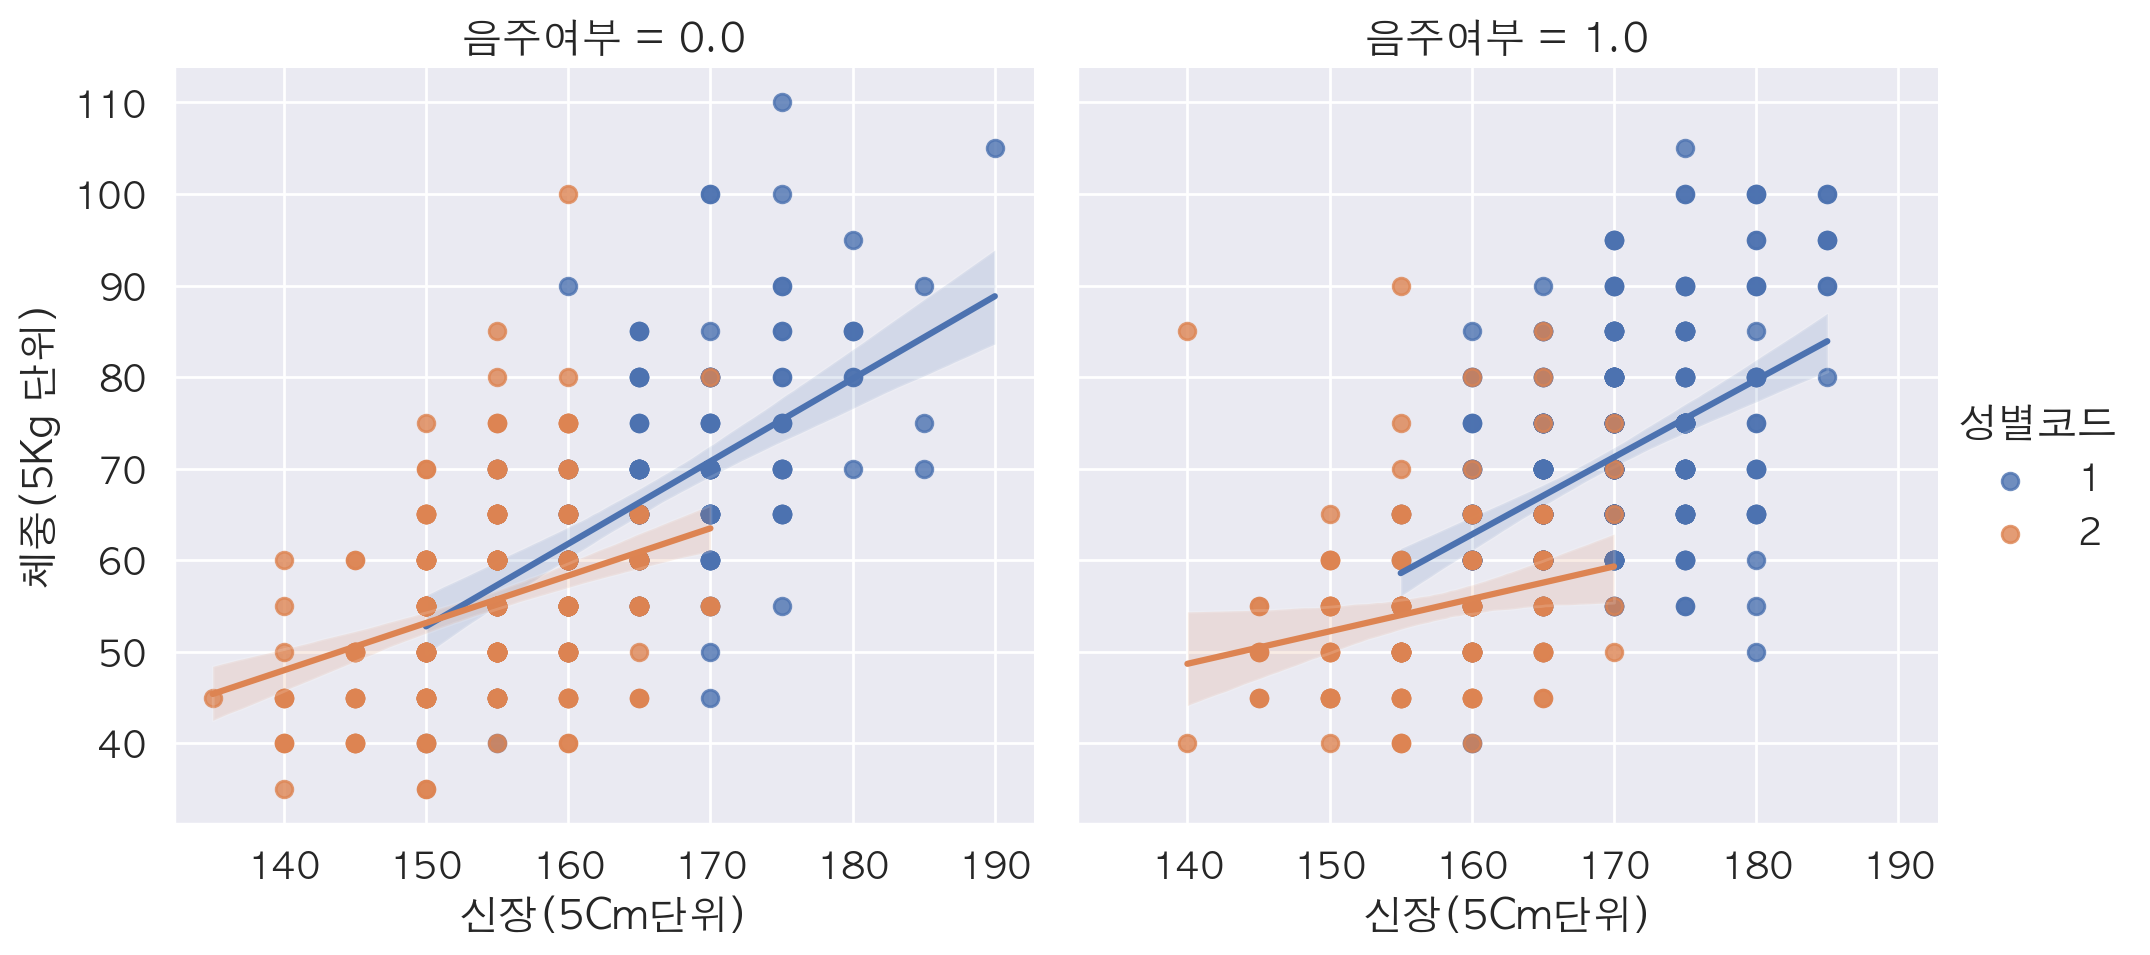

In [209]:
sns.lmplot(data=df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)", hue = "성별코드", col = "음주여부")

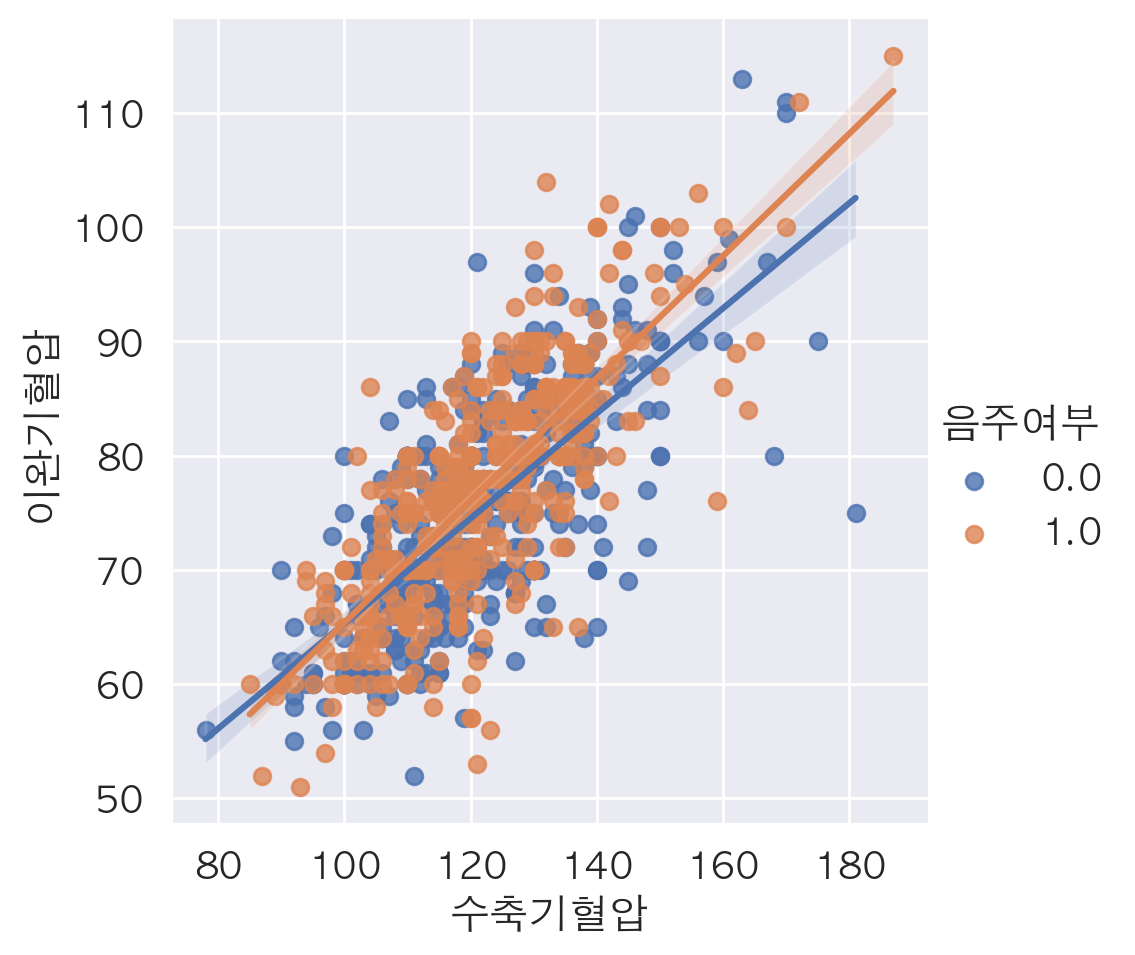

In [210]:
sns.lmplot(data=df_sample, x = "수축기혈압", y = "이완기혈압", hue = "음주여부", col = )

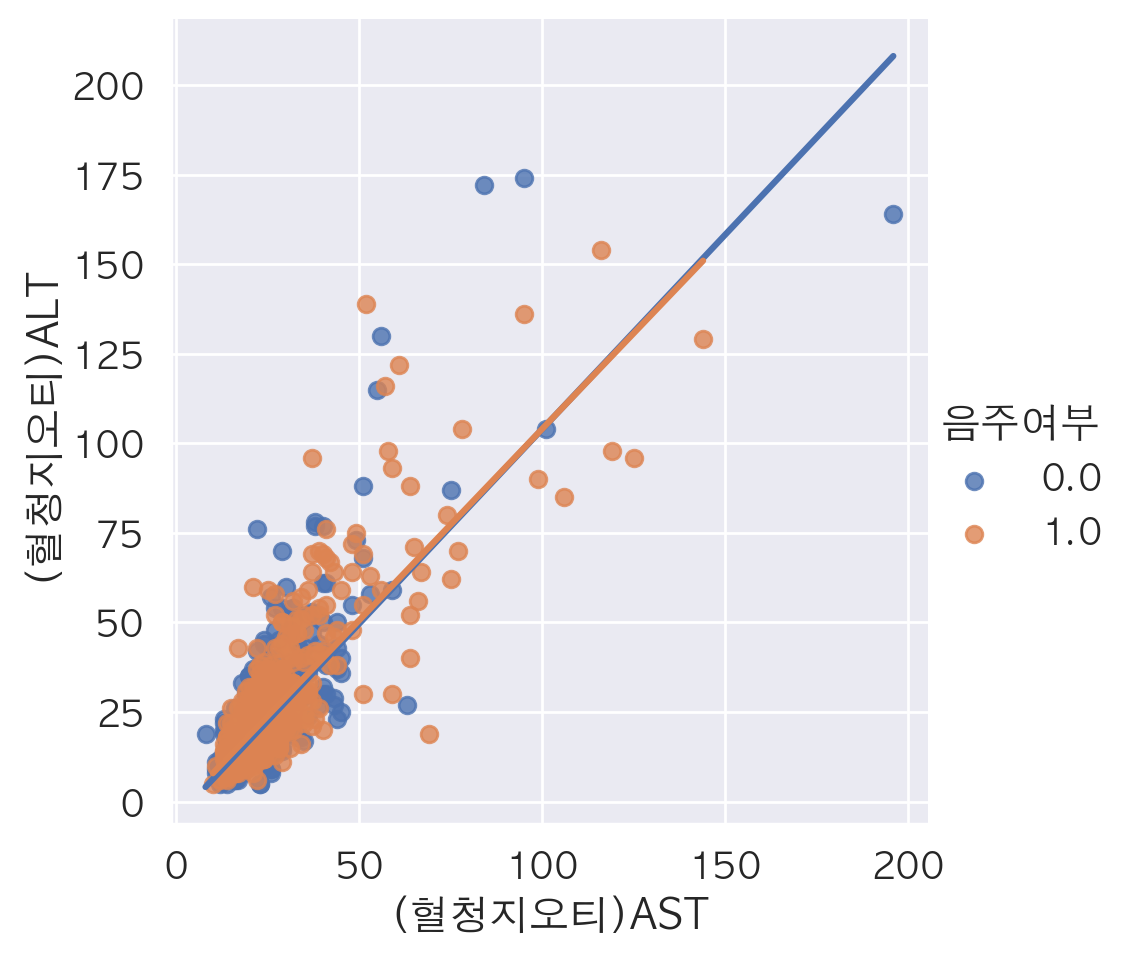

In [216]:
sns.lmplot(data=df_sample, x = "(혈청지오티)AST", y="(혈청지오티)ALT", hue = "음주여부", ci = None, robust = True)

## 이상치 다루기 

In [225]:
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"]< 400) & (df_sample["(혈청지오티)ALT"]< 400)]
df_ASLT

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
276826  2017   276827     2           12    11      155.0        85.0  113.0   
849425  2017   849426     2           15    11      155.0        45.0   73.0   
504499  2017   504500     1           11    47      170.0        45.0   63.0   
601054  2017   601055     2           16    26      150.0        50.0   77.0   
980221  2017   980222     2           13    41      150.0        65.0   95.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
890013  2017   890014     2           11    29      155.0        50.0   65.1   
875389  2017   875390     2            9    11      155.0        45.0   66.5   
358458  2017   358459     2           11    11      160.0        50.0   72.0   
808228  2017   808229     1            9    48      175.0        65.0   75.2   
317698  2017   317699     2           13    42      150.0        55.0   79.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
276826    0.7    1.0  ...   35.0   1.0   0.0          0      NaN    NaN   
849425    0.5    0.4  ...   19.0   1.0   0.0          1      NaN    NaN   
504499    0.7    0.4  ...   15.0   3.0   0.0          0      NaN    NaN   
601054    0.4    0.3  ...   13.0   1.0   0.0          0      NaN    NaN   
980221    1.0    0.8  ...  265.0   1.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
890013    1.0    0.8  ...   22.0   2.0   1.0          1      NaN    NaN   
875389    0.9    0.8  ...   12.0   1.0   1.0          1      NaN    NaN   
358458    0.9    0.8  ...   11.0   1.0   0.0          0      NaN    NaN   
808228    1.2    1.2  ...  122.0   3.0   1.0          1      NaN    NaN   
317698    1.0    1.0  ...   22.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  0.0  20181126  
504499      NaN           NaN  NaN  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
890013      NaN           NaN  1.0  20181126  
875389      NaN           NaN  0.0  20181126  
358458      NaN           NaN  NaN  20181126  
808228      NaN           NaN  0.0  20181126  
317698      NaN           NaN  NaN  20181126  

[1000 rows x 34 columns]

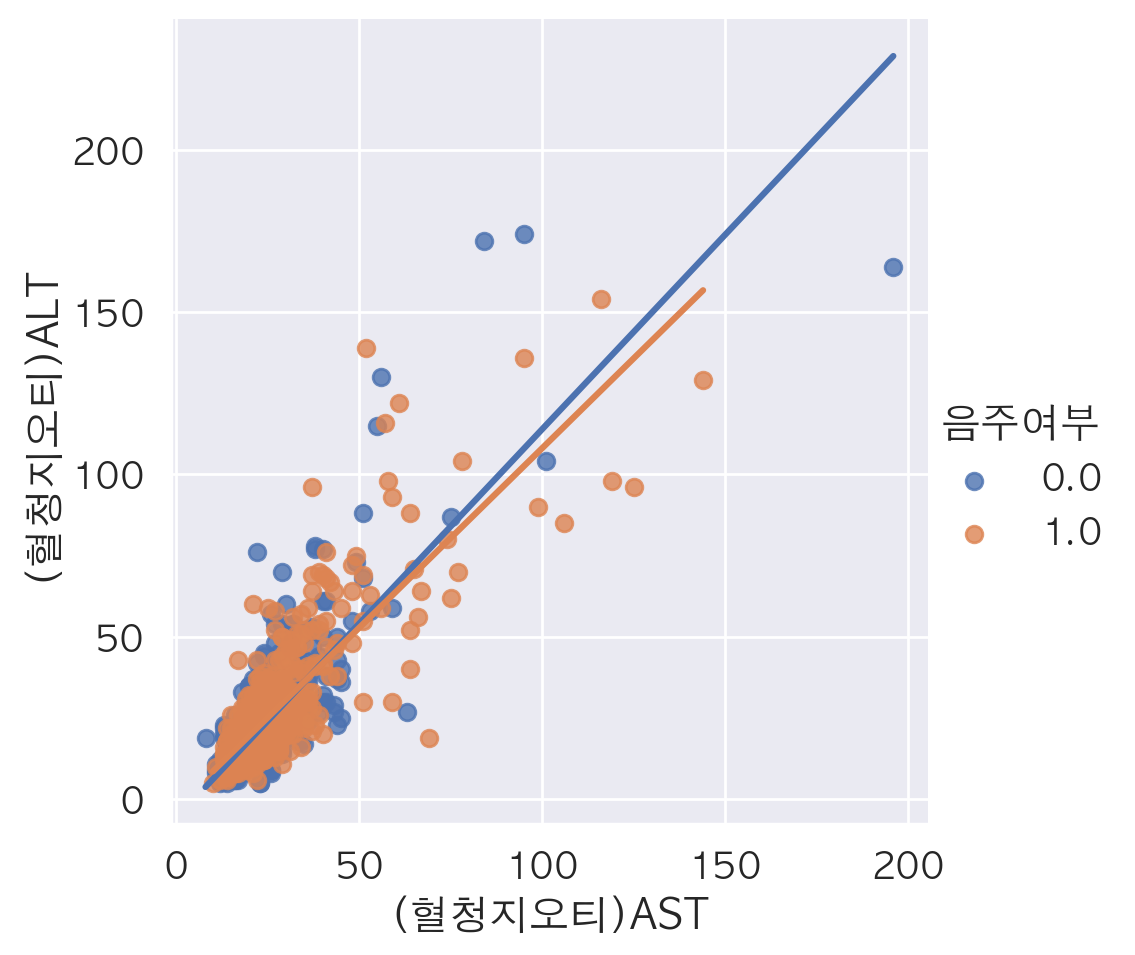

In [226]:
sns.lmplot(data=df_ASLT, x = "(혈청지오티)AST", y="(혈청지오티)ALT", hue = "음주여부", ci = None)

In [230]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
2771    2017     2772     1            8    44      170.0        65.0   82.2   
5047    2017     5048     1            7    31      170.0        60.0   77.0   
10803   2017    10804     1           10    46      170.0        75.0   83.1   
14948   2017    14949     1            5    47      180.0       130.0  110.0   
16433   2017    16434     2           12    44      160.0        65.0   86.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
990160  2017   990161     1           13    11      170.0        70.0   85.0   
990909  2017   990910     1            9    48      165.0        80.0   95.0   
991596  2017   991597     2           16    48      150.0        40.0   67.0   
996864  2017   996865     2            7    44      155.0        45.0   69.0   
997022  2017   997023     1           12    41      180.0        90.0   96.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
2771      1.0    0.9  ...  280.0   3.0   1.0          0      NaN    NaN   
5047      1.5    1.5  ...   33.0   1.0   1.0          1      NaN    NaN   
10803     0.7    1.0  ...  228.0   3.0   1.0          1      NaN    NaN   
14948     1.2    1.5  ...  115.0   1.0   0.0          0      NaN    NaN   
16433     1.0    1.0  ...  672.0   1.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
990160    0.8    0.8  ...  626.0   2.0   0.0          0      NaN    NaN   
990909    1.5    1.5  ...   34.0   3.0   0.0          0      NaN    NaN   
991596    0.7    0.6  ...   39.0   1.0   0.0          0      NaN    NaN   
996864    1.2    1.5  ...  490.0   1.0   0.0          0      NaN    NaN   
997022    1.2    1.0  ...  500.0   3.0   1.0          1      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
2771        NaN           NaN  NaN  20181126  
5047        NaN           NaN  0.0  20181126  
10803       NaN           NaN  0.0  20181126  
14948       NaN           NaN  NaN  20181126  
16433       NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
990160      NaN           NaN  NaN  20181126  
990909      NaN           NaN  NaN  20181126  
991596      NaN           NaN  NaN  20181126  
996864      NaN           NaN  NaN  20181126  
997022      NaN           NaN  1.0  20181126  

[394 rows x 34 columns]

In [234]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:,4:27]

시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  청력(우)  수축기혈압  \
677177    41      155.0        55.0  81.0    0.2    0.9    2.0    2.0  100.0   
887237    41      160.0        55.0  71.0    1.2    1.0    1.0    1.0   97.0   

        이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  \
677177   60.0  ...      30.0      69.0  13.0  1.0      1.2      8200.0   
887237   71.0  ...     100.0      35.0  17.8  3.0      0.8      9999.0   

        (혈청지오티)ALT  감마지티피  흡연상태  음주여부  
677177      6080.0  888.0   1.0   1.0  
887237      6710.0  379.0   3.0   1.0  

[2 rows x 23 columns]

## distplot

In [235]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [243]:
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.head()

0    178.0
1    255.0
2    211.0
3    160.0
4    253.0
Name: 총콜레스테롤, dtype: float64

/Users/kanovatio/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

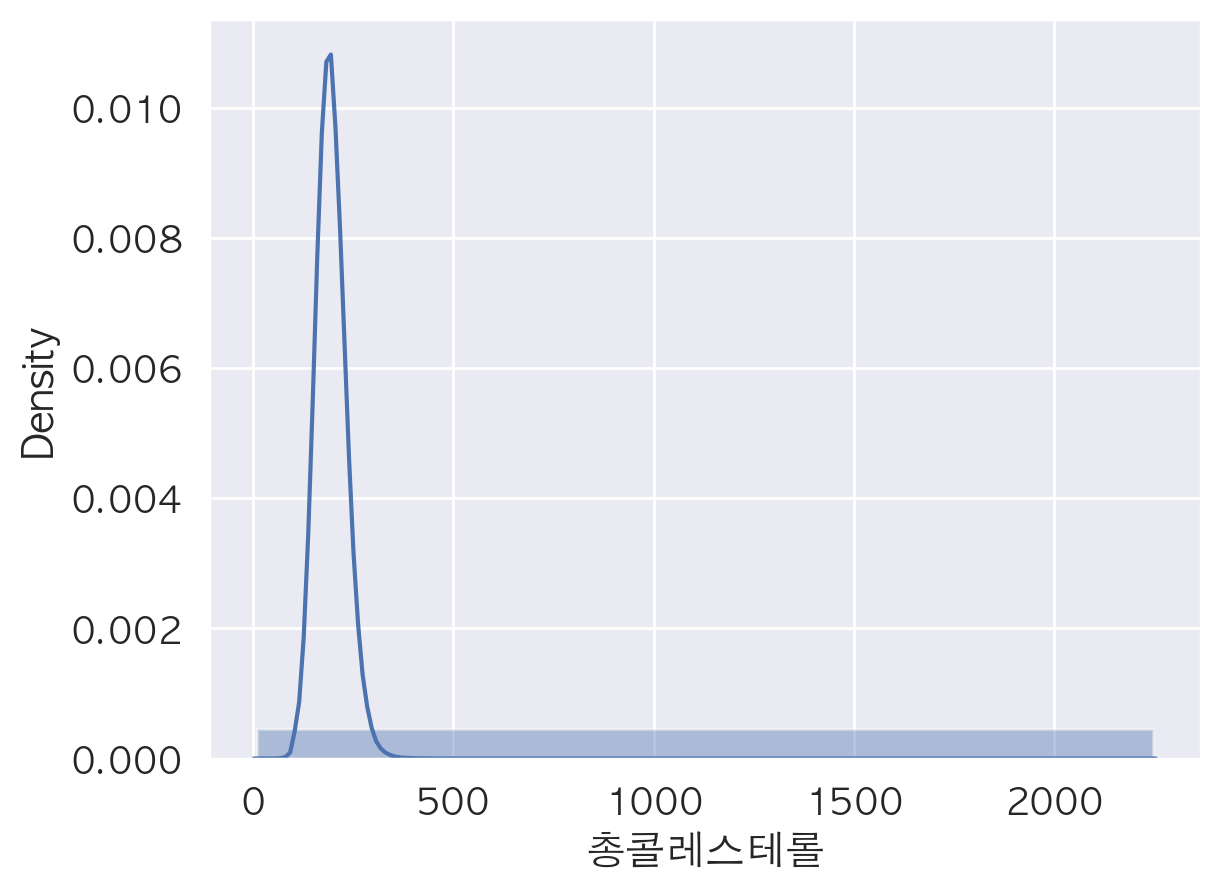

In [246]:
# 결측치 있을 경우 distplot 그릴 수 없음.
sns.distplot(df_chol, bins = 1)

/Users/kanovatio/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

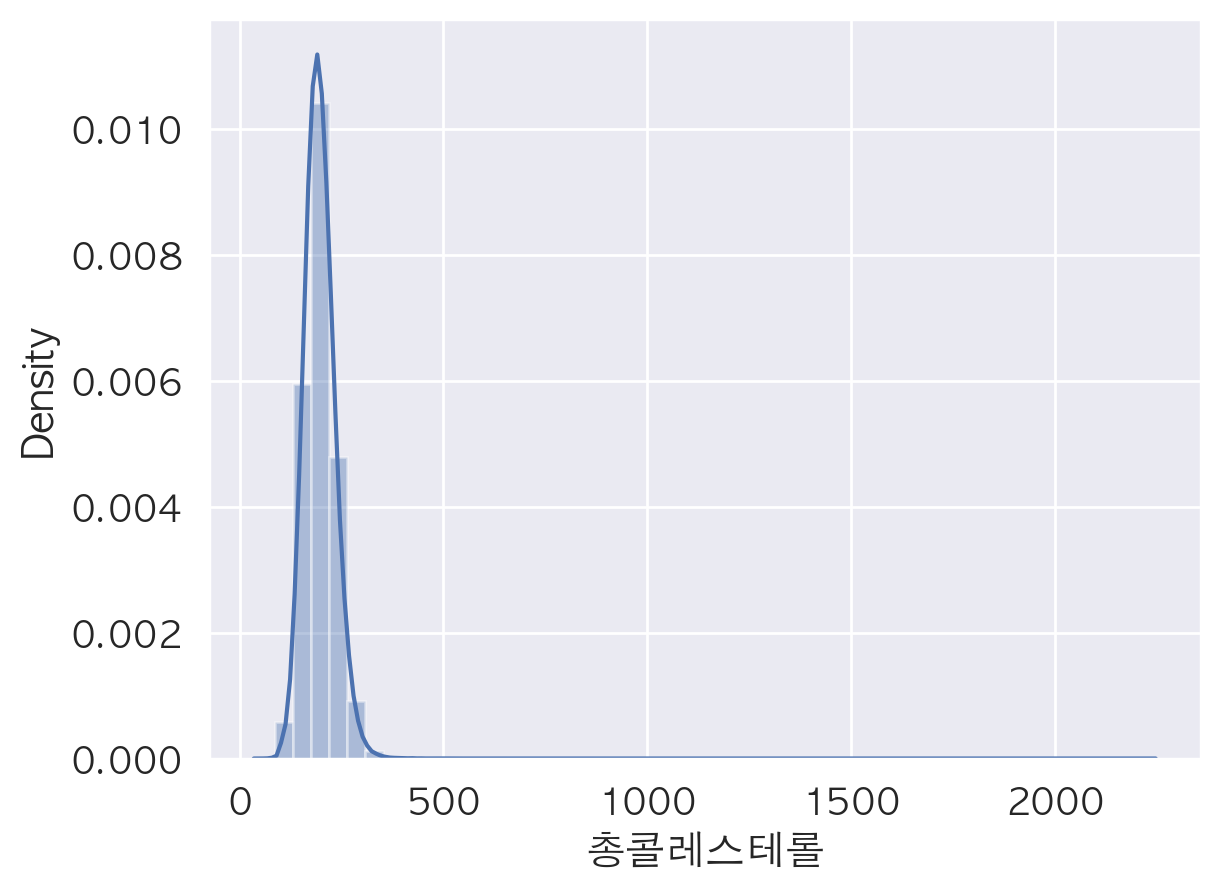

In [250]:
sns.distplot(df.loc[df["총콜레스테롤"].notnull()&(df["음주여부"]==1), "총콜레스테롤"])

# 상관분석

In [267]:
columns = ['연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

['연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [264]:
df_sample.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
276826  2017   276827     2           12    11      155.0        85.0  113.0   
849425  2017   849426     2           15    11      155.0        45.0   73.0   
504499  2017   504500     1           11    47      170.0        45.0   63.0   
601054  2017   601055     2           16    26      150.0        50.0   77.0   
980221  2017   980222     2           13    41      150.0        65.0   95.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
276826    0.7    1.0  ...   35.0   1.0   0.0          0      NaN    NaN   
849425    0.5    0.4  ...   19.0   1.0   0.0          1      NaN    NaN   
504499    0.7    0.4  ...   15.0   3.0   0.0          0      NaN    NaN   
601054    0.4    0.3  ...   13.0   1.0   0.0          0      NaN    NaN   
980221    1.0    0.8  ...  265.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  0.0  20181126  
504499      NaN           NaN  NaN  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  

[5 rows x 34 columns]

In [272]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

연령대코드(5세단위)      시도코드  신장(5Cm단위)  체중(5Kg 단위)      허리둘레     시력(좌)  \
연령대코드(5세단위)     1.000000  0.004419  -0.397412   -0.210610  0.134720 -0.201947   
시도코드            0.004419  1.000000   0.032370    0.059043  0.052206  0.026075   
신장(5Cm단위)      -0.397412  0.032370   1.000000    0.648489  0.293774  0.141800   
체중(5Kg 단위)     -0.210610  0.059043   0.648489    1.000000  0.790520  0.076534   
허리둘레            0.134720  0.052206   0.293774    0.790520  1.000000 -0.033007   
시력(좌)          -0.201947  0.026075   0.141800    0.076534 -0.033007  1.000000   
시력(우)          -0.203802  0.078865   0.156605    0.133502  0.034518  0.462877   
청력(좌)           0.193769 -0.007548  -0.100178   -0.038100  0.048379 -0.049368   
청력(우)           0.253585 -0.010557  -0.121083   -0.070590  0.052245 -0.084603   
수축기혈압           0.296807  0.041995   0.030012    0.244673  0.333025 -0.010112   
이완기혈압           0.149758  0.004400   0.118103    0.287084  0.302398 -0.001695   
식전혈당(공복혈당)      0.166079  0.032880   0.059881    0.155556  0.219585 -0.075272   
총콜레스테롤          0.005873 -0.030092  -0.013813    0.082305  0.081332  0.005267   
트리글리세라이드        0.033434  0.033299   0.113687    0.238945  0.288572  0.029648   
HDL콜레스테롤       -0.121635 -0.078665  -0.152505   -0.357603 -0.409940  0.021295   
LDL콜레스테롤        0.023206 -0.016847  -0.003485    0.106049  0.098301 -0.015221   
혈색소            -0.165788  0.080580   0.529475    0.508366  0.377023  0.073866   
요단백            -0.022885 -0.020662   0.014089    0.028840 -0.002252  0.010995   
혈청크레아티닌         0.020587  0.058069   0.243101    0.190769  0.149351  0.018104   
(혈청지오티)AST      0.106376  0.011761   0.035321    0.196722  0.229202  0.003379   
(혈청지오티)ALT     -0.014101  0.049382   0.187945    0.372930  0.357288  0.029429   
감마지티피           0.052946  0.016472   0.171372    0.254150  0.271566  0.011519   
흡연상태           -0.136350  0.068355   0.505945    0.397230  0.268685  0.063964   
음주여부           -0.277149 -0.006645   0.362905    0.235974  0.084514  0.073696   

                시력(우)     청력(좌)     청력(우)     수축기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위) -0.203802  0.193769  0.253585  0.296807  ... -0.121635  0.023206   
시도코드         0.078865 -0.007548 -0.010557  0.041995  ... -0.078665 -0.016847   
신장(5Cm단위)    0.156605 -0.100178 -0.121083  0.030012  ... -0.152505 -0.003485   
체중(5Kg 단위)   0.133502 -0.038100 -0.070590  0.244673  ... -0.357603  0.106049   
허리둘레         0.034518  0.048379  0.052245  0.333025  ... -0.409940  0.098301   
시력(좌)        0.462877 -0.049368 -0.084603 -0.010112  ...  0.021295 -0.015221   
시력(우)        1.000000 -0.041439 -0.096255 -0.020638  ... -0.030666  0.044949   
청력(좌)       -0.041439  1.000000  0.512849  0.105602  ... -0.015340 -0.018551   
청력(우)       -0.096255  0.512849  1.000000  0.127883  ... -0.078820 -0.059298   
수축기혈압       -0.020638  0.105602  0.127883  1.000000  ... -0.138843  0.003982   
이완기혈압        0.012802  0.034535  0.041907  0.744132  ... -0.090783  0.045014   
식전혈당(공복혈당)   0.006790 -0.000567  0.035457  0.168399  ... -0.136568 -0.038186   
총콜레스테롤       0.038706 -0.034960 -0.095937  0.047920  ...  0.137891  0.880425   
트리글리세라이드     0.018477 -0.029229 -0.027957  0.187875  ... -0.383788  0.011516   
HDL콜레스테롤    -0.030666 -0.015340 -0.078820 -0.138843  ...  1.000000 -0.062431   
LDL콜레스테롤     0.044949 -0.018551 -0.059298  0.003982  ... -0.062431  1.000000   
혈색소          0.056753 -0.015990 -0.031084  0.143038  ... -0.208488  0.112034   
요단백          0.009548 -0.026771 -0.013656  0.016896  ... -0.005009 -0.004715   
혈청크레아티닌      0.031835 -0.026352 -0.030057  0.090268  ... -0.142140  0.037578   
(혈청지오티)AST   0.024706  0.014587  0.002233  0.143089  ... -0.031833  0.011017   
(혈청지오티)ALT   0.083163  0.003031 -0.023672  0.118240  ... -0.179211  0.075795   
감마지티피        0.045560 -0.006351  0.005842  0.176208  ... -0.121648  0.046815   
흡연상태         0.054681 -0.034204 -0.040937  0.108511  ... -0.188906 -0.011593   
음주여부         0.063220 -0.037669 -0.032475  0.032543  ...  0.052452 

In [274]:
df_corr["신장(5Cm단위)"].sort_values()

연령대코드(5세단위)   -0.397412
HDL콜레스테롤      -0.152505
청력(우)         -0.121083
청력(좌)         -0.100178
총콜레스테롤        -0.013813
LDL콜레스테롤      -0.003485
요단백            0.014089
수축기혈압          0.030012
시도코드           0.032370
(혈청지오티)AST     0.035321
식전혈당(공복혈당)     0.059881
트리글리세라이드       0.113687
이완기혈압          0.118103
시력(좌)          0.141800
시력(우)          0.156605
감마지티피          0.171372
(혈청지오티)ALT     0.187945
혈청크레아티닌        0.243101
허리둘레           0.293774
음주여부           0.362905
흡연상태           0.505945
혈색소            0.529475
체중(5Kg 단위)     0.648489
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [282]:
df_corr.loc[df_corr["흡연상태"] > 0.3, "신장(5Cm단위)"].sort_values(ascending=False)

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.648489
혈색소           0.529475
흡연상태          0.505945
음주여부          0.362905
감마지티피         0.171372
Name: 신장(5Cm단위), dtype: float64

In [285]:
df_corr.loc[df_corr["음주여부"] > 0.1, "음주여부"].sort_values(ascending=False)

음주여부          1.000000
흡연상태          0.365642
신장(5Cm단위)     0.362905
혈색소           0.291863
감마지티피         0.250011
체중(5Kg 단위)    0.235974
이완기혈압         0.110143
트리글리세라이드      0.103018
Name: 음주여부, dtype: float64

In [286]:
df_corr["감마지티피"].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.525509
(혈청지오티)ALT    0.514197
트리글리세라이드      0.335514
흡연상태          0.305811
식전혈당(공복혈당)    0.292087
허리둘레          0.271566
Name: 감마지티피, dtype: float64

<AxesSubplot:>

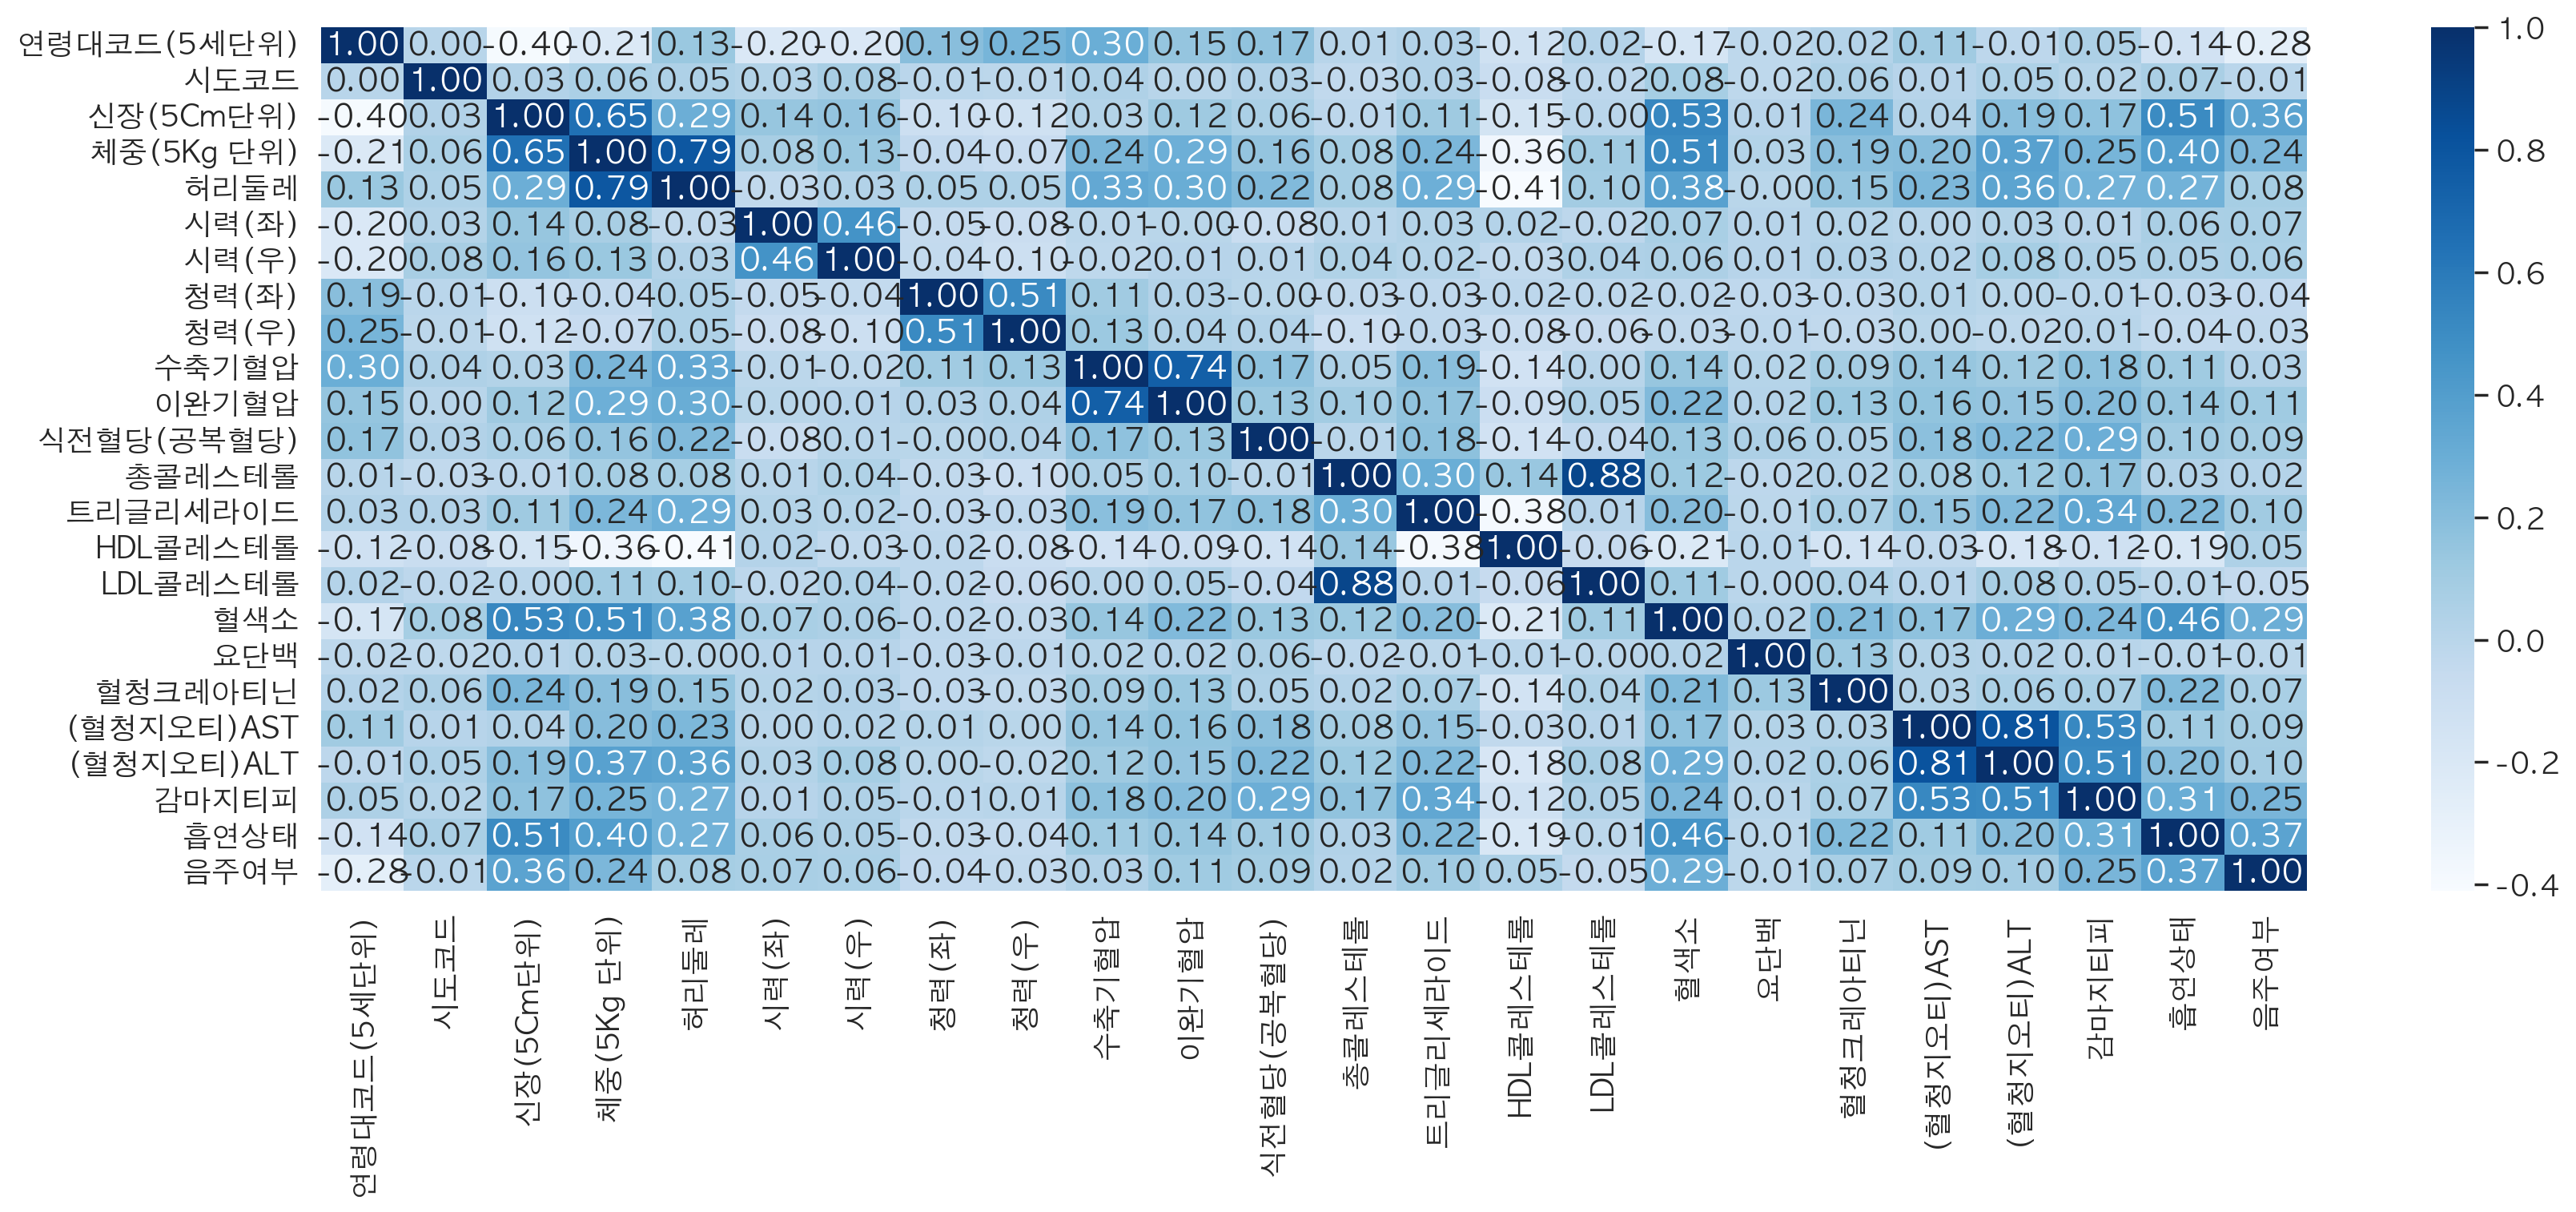

In [295]:
plt.figure(figsize = (20,7))
sns.heatmap(df_corr, annot = True, fmt = ".2f", cmap = "Blues")

In [302]:
mask = np.triu(np.ones_like(df_corr, dtype = np.bool))
mask

/var/folders/9t/s4kfwbj54wj1sw01v7vtb68h0000gn/T/ipykernel_12687/1274925916.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype = np.bool))


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,

/var/folders/9t/s4kfwbj54wj1sw01v7vtb68h0000gn/T/ipykernel_12687/2774273589.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype = np.bool))


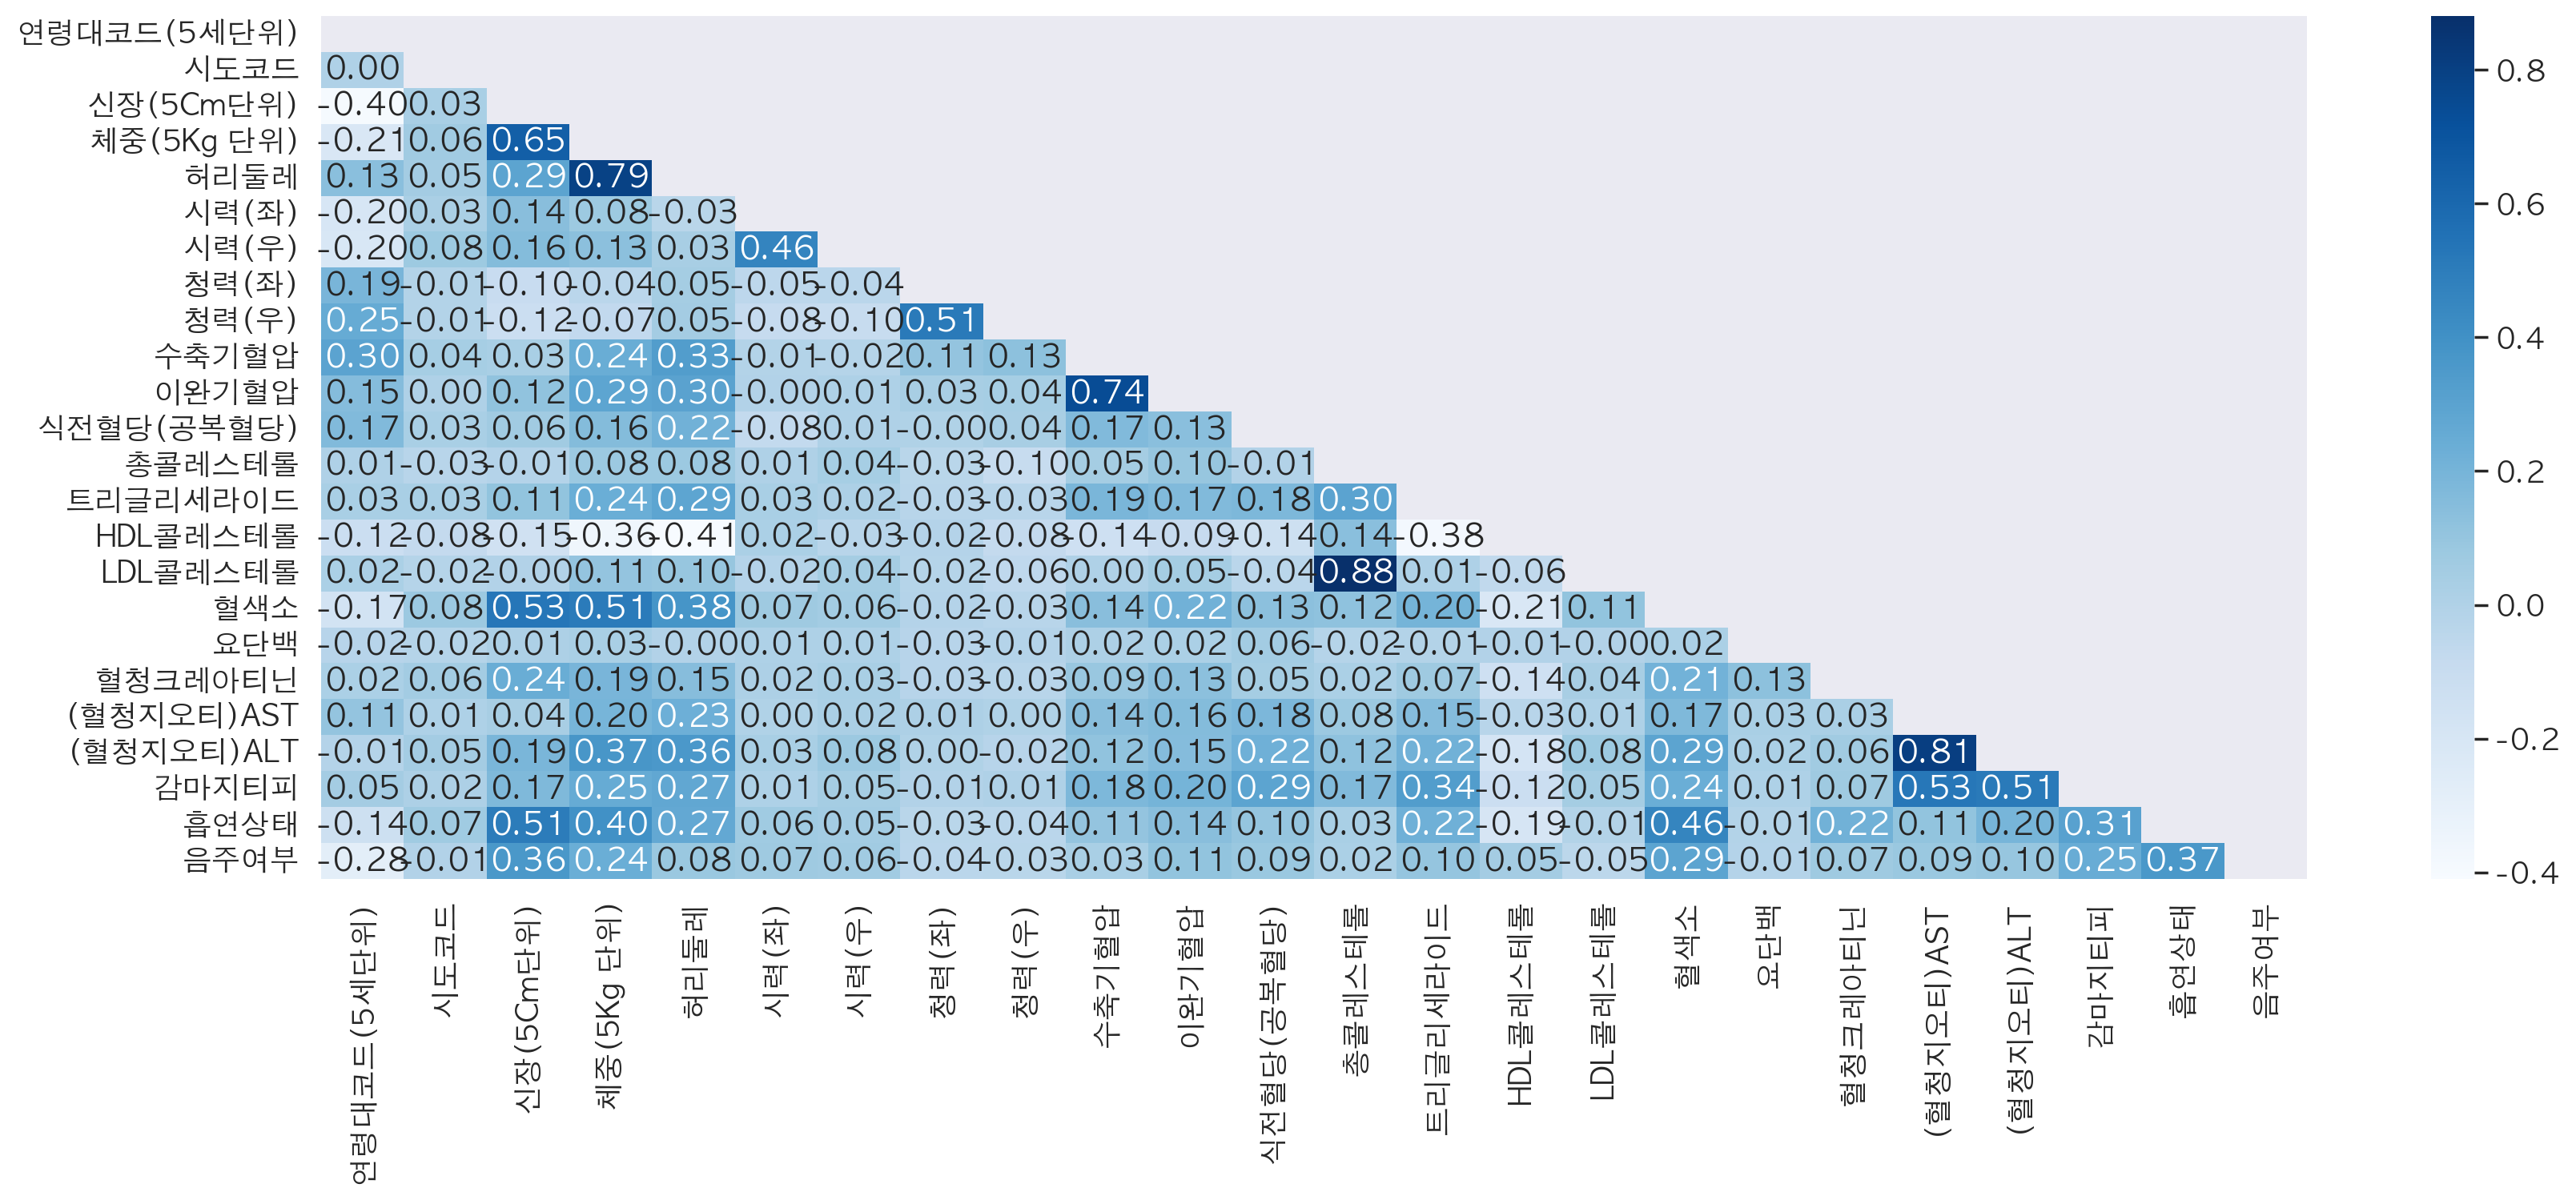

In [305]:
mask = np.triu(np.ones_like(df_corr, dtype = np.bool))

plt.figure(figsize = (20,7))
a = sns.heatmap(df_corr, annot = True, fmt = ".2f", cmap = "Blues", mask = mask)